In [ ]:
#                                                                            MOL

In [1]:
#Importowano biblioteki robocze
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import datetime

In [2]:
#Ładuje dane finansowe
data = pd.read_excel("C:/Users/kmate/Desktop/Praca licencjacka/dane/Europa/MOL_dataset.xlsx")


#Stworozno zmienne opisujące Rok oraz Kwartał ze zmiennej, którą nie da się manipulować w oryginalnym formacie
data['Rok'] = data['Kwartał'].str[-4:].astype(int)  # Extract last 4 characters as year
data['Q'] = data['Kwartał'].str[1:2].astype(int)  # Extract 2nd character as quarter


#Zmieniono zmienną opisującą kwartał na datę
def quarter_end_date(row):
    year = row['Rok']
    quarter = row['Q']
    month = 3 * quarter
    
    if month == 12:
        quarter_end = datetime.date(year, month, 31)
    else:
        next_month = month + 1
        next_month_start = datetime.date(year, next_month, 1)
        quarter_end = next_month_start - datetime.timedelta(days=1)
    
    return quarter_end
    
data["Date"] = data[["Rok", "Q"]].apply(quarter_end_date, axis=1) 
data = data.set_index('Date')

#Następnie sprawdzono informacje o typie danych
#Jeżeli typ danych okaże sie sprzeczny co do tego jaki jest pożądany należy zastosować transformacje
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 2000-06-30 to 2023-12-31
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Indeks                             95 non-null     int64  
 1   Kwartał                            95 non-null     object 
 2   Przychody ogółem                   95 non-null     float64
 3   Zysk brutto ze sprzedaży           95 non-null     object 
 4   Zysk z działalności operacyjnej    95 non-null     float64
 5   EBITDA                             95 non-null     float64
 6   Przychody finansowe                95 non-null     float64
 7   Wydatki finansowe                  95 non-null     float64
 8   Zysk brutto                        95 non-null     float64
 9   Aktywa trwałe                      95 non-null     float64
 10  Aktywa obrotowe                    95 non-null     float64
 11  Kapitał własny ogółem              95 non-null  

In [3]:
#Statystyki opisowe
describe = data.describe()
describe

Indeks  Przychody ogółem  Zysk z działalności operacyjnej  \
count  95.000000      9.500000e+01                     9.500000e+01   
mean   48.000000      4.872287e+08                     3.961537e+07   
std    27.568098      1.251863e+09                     1.125658e+08   
min     1.000000     -6.628585e+09                    -4.186380e+08   
25%    24.500000      2.494600e+08                    -1.041150e+07   
50%    48.000000      7.557770e+08                     5.729000e+07   
75%    71.500000      1.186502e+09                     9.225500e+07   
max    95.000000      2.891567e+09                     4.450060e+08   

             EBITDA  Przychody finansowe  Wydatki finansowe   Zysk brutto  \
count  9.500000e+01         9.500000e+01       9.500000e+01  9.500000e+01   
mean   7.060038e+07         1.048151e+07      -1.316692e+07  3.923303e+07   
std    1.668177e+08         1.226628e+08       3.783486e+07  2.036677e+08   
min   -5.383820e+08        -6.617613e+08      -1.496520e+08 -1.065618e+09   
25%   -5.573667e+06        -2.006333e+06      -3.125650e+07 -2.049417e+07   
50%    1.110860e+08         4.097000e+06      -1.220100e+07  3.883900e+07   
75%    1.622715e+08         1.639100e+07       5.285333e+06  9.138050e+07   
max    5.710120e+08         9.674020e+08       1.009200e+08  1.425304e+09   

       Aktywa trwałe  Aktywa obrotowe  Kapitał własny ogółem  \
count   9.500000e+01     9.500000e+01           9.500000e+01   
mean    6.329348e+08     3.286013e+08           4.424511e+08   
std     1.245932e+09     6.779730e+08           8.931164e+08   
min    -2.958260e+08    -5.624270e+08          -4.924423e+08   
25%    -1.423875e+07    -4.061400e+07          -2.987650e+07   
50%     3.110100e+07     5.220600e+07           4.485300e+07   
75%     5.786170e+08     3.153935e+08           3.945415e+08   
max     4.939837e+09     2.862182e+09           4.030138e+09   

       Kapitał własny spółki dominującej  Zobowiązania długoterminowe  \
count                       9.500000e+01                 9.500000e+01   
mean                        3.728995e+08                 2.346784e+08   
std                         7.607879e+08                 4.917604e+08   
min                        -4.472350e+08                -3.627480e+08   
25%                        -3.130633e+07                -2.226750e+07   
50%                         4.487500e+07                 3.175800e+07   
75%                         3.616405e+08                 2.212490e+08   
max                         3.678061e+09                 1.902113e+09   

       Zobowiązania krótkoterminowe  Pożyczki krótkoterminowe          Rok  \
count                  9.500000e+01              9.500000e+01    95.000000   
mean                   2.793867e+08              4.682261e+07  2011.621053   
std                    5.616940e+08              1.238568e+08     6.893072   
min                   -2.539880e+08             -2.370820e+08  2000.000000   
25%                   -2.470800e+07             -1.252200e+07  2006.000000   
50%                    4.129000e+07              5.855000e+06  2012.000000   
75%                    2.825635e+08              7.472700e+07  2017.500000   
max                    2.198912e+09              4.766450e+08  2023.000000   

               Q  
count  95.000000  
mean    2.515789  
std     1.119110  
min     1.000000  
25%     2.000000  
50%     3.000000  
75%     3.500000  
max     4.000000

<Figure size 700x1200 with 0 Axes>

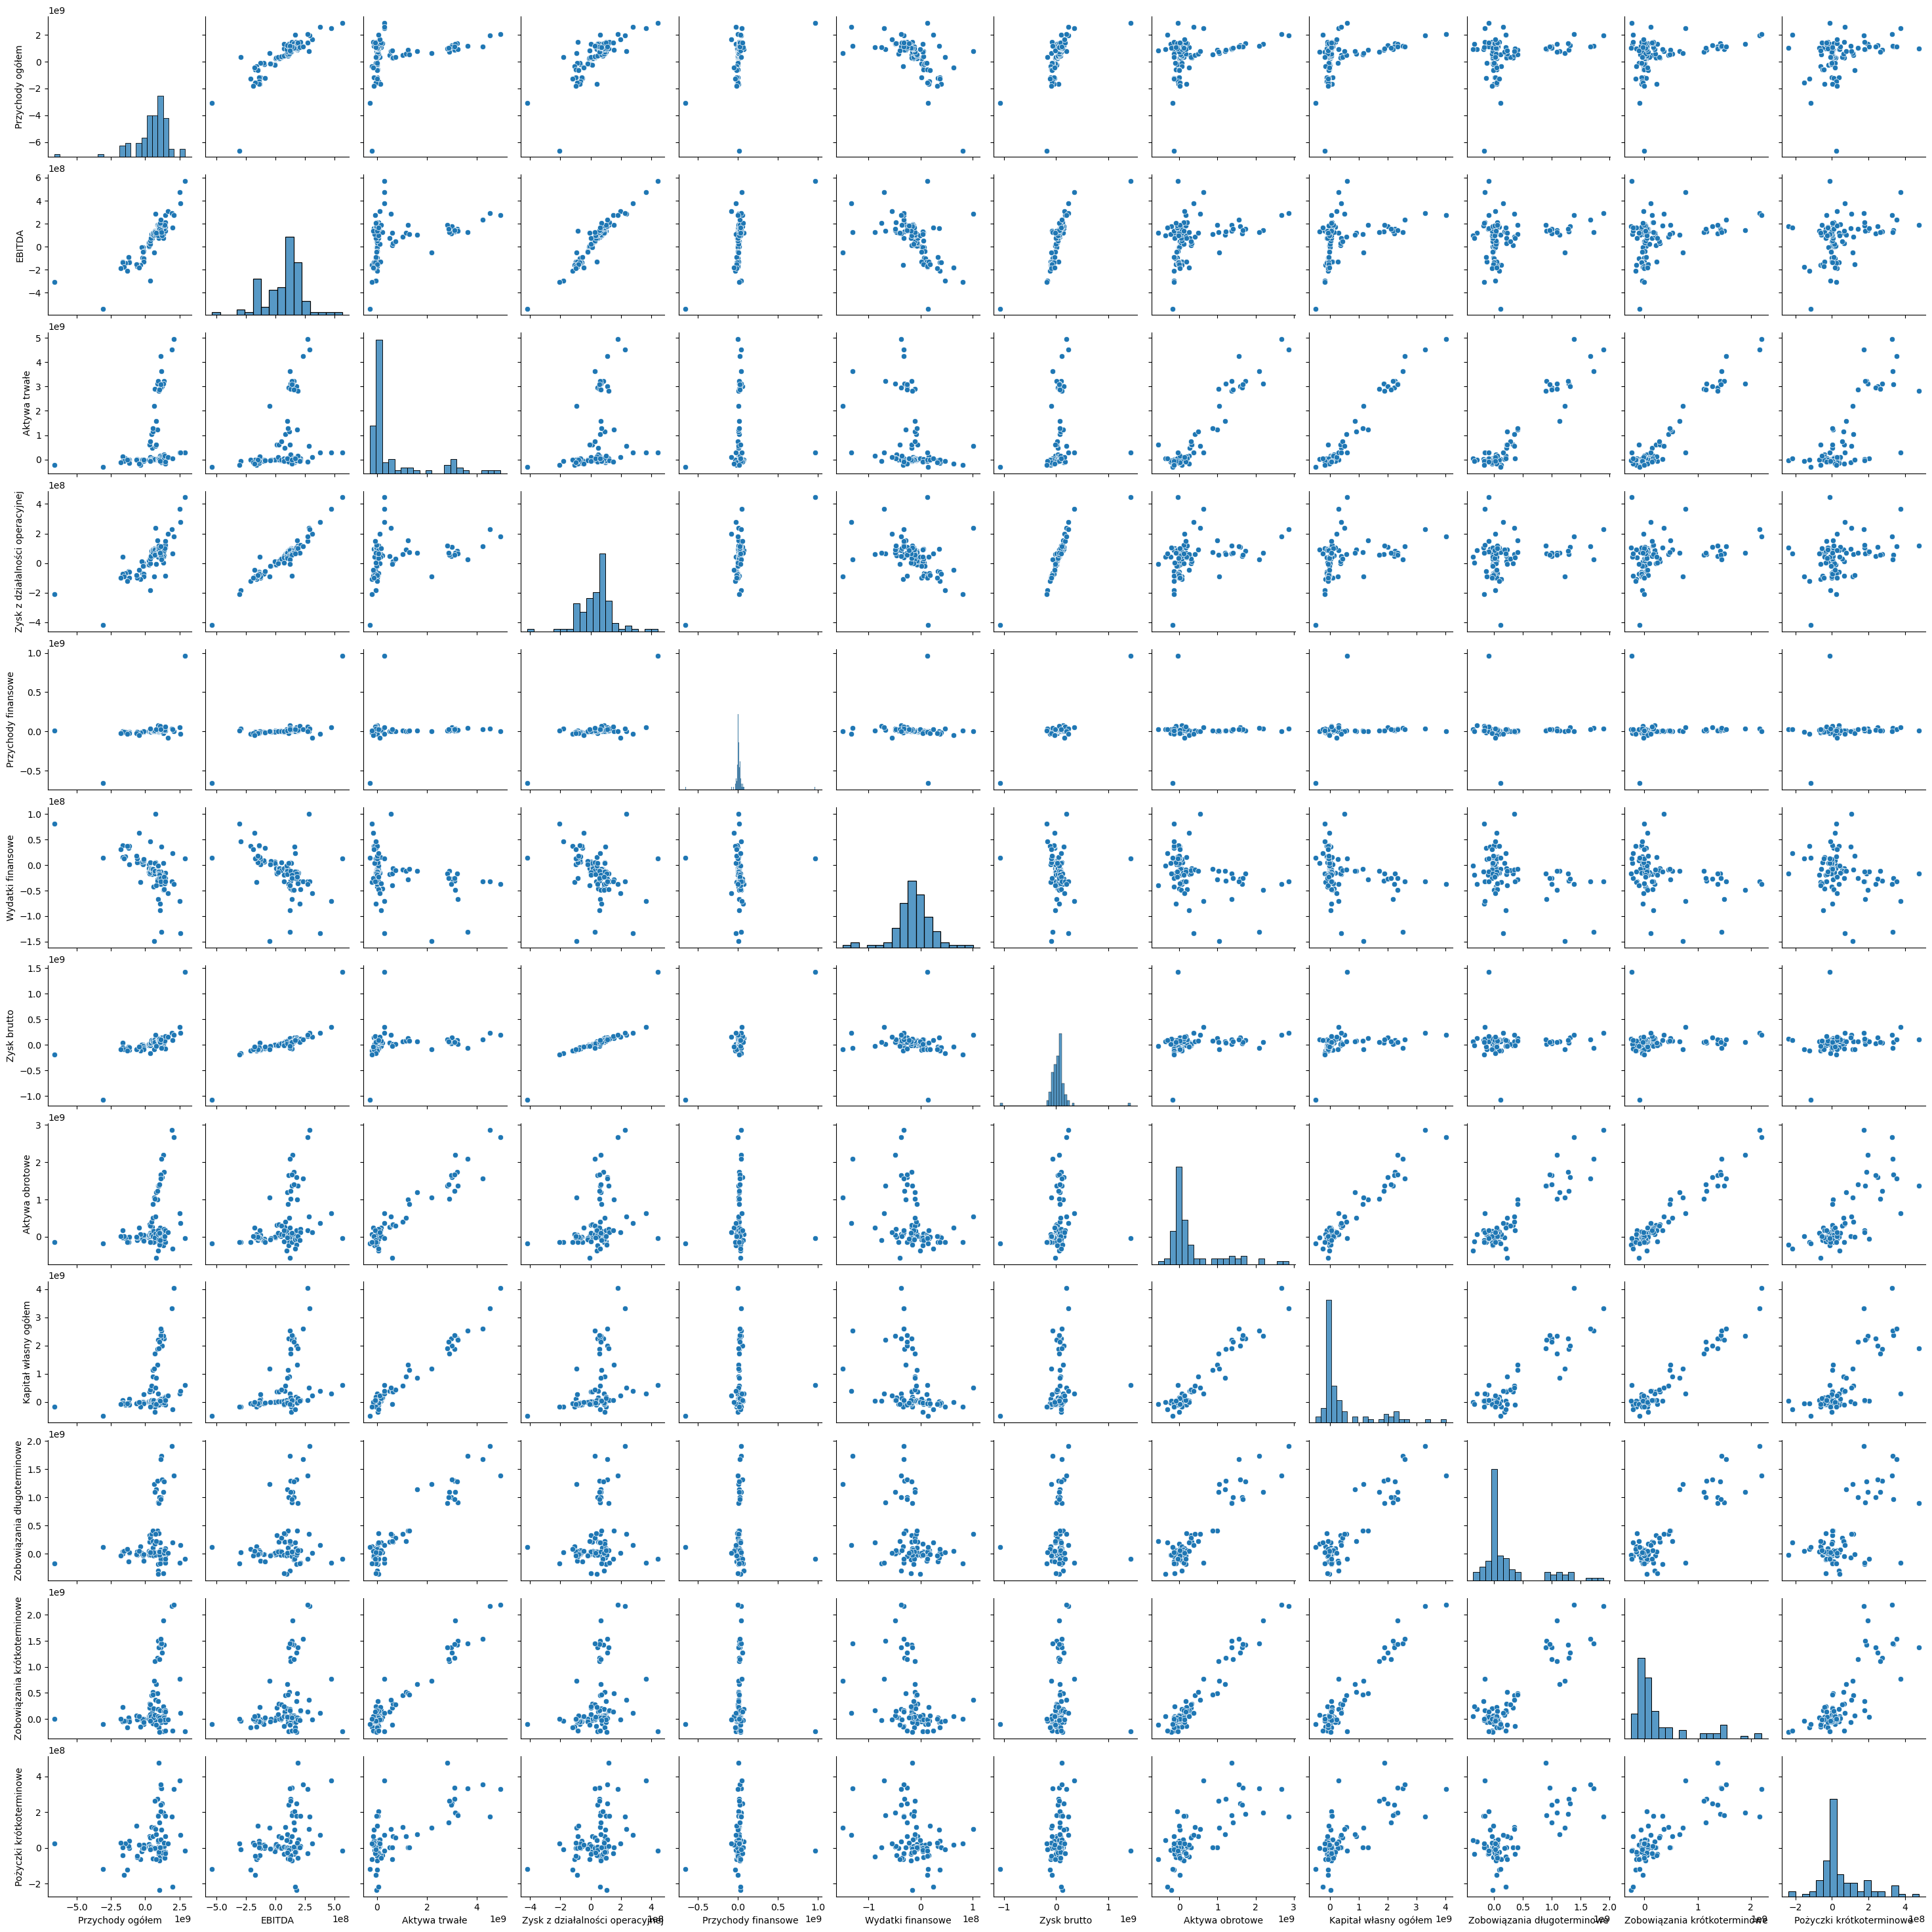

In [4]:
#Żadna ze zmiennych nie posiada wartości pustych. Jest to spowodowane tym, że jeżeli były jakieś braki danych w zbiorze
#zdecydowano je zastąpić średnią dla danego okresu, lub zostawić 0 jeżeli żaden z kwartałów nie miał danych
import warnings
warnings.filterwarnings("ignore")

#Sprawdzono wykresy zmiennych. Sprawdzoono również czy ich histogramy 
#przypominają rozkład normalny.

fig = plt.figure(figsize=(7,12))
sns.pairplot(data[["Przychody ogółem", "EBITDA", "Aktywa trwałe", "Zysk z działalności operacyjnej", "Przychody finansowe", "Wydatki finansowe",
                  "Zysk brutto", "Aktywa obrotowe", "Kapitał własny ogółem", "Zobowiązania długoterminowe", "Zobowiązania krótkoterminowe", "Pożyczki krótkoterminowe"]])


In [5]:
#Można zauważyć, że rozkłady badanych zmiennych nie przypominają rozkładu Gaussowskiego. Upewniono sie jeszcze wykonując test na tych zbiorach
#W celu sprawdzenia pochodzenia próby skorzystano z testu Shapiro-Wilka z biblioteki scipy


def ShaprioWilk(column):
    import scipy.stats as stats
    
    statistic, p_value = stats.shapiro(data[column].to_numpy())
    
    print("Statistic: ", statistic)
    print("P value: ", p_value)
    
    alpha = 0.05
    if p_value > alpha:
        return print(f"The data follow a normal distribution (p-value = {p_value:.4f})")
    else:
        return print(f"The data does not follows a normal distribution (p-value = {p_value:.4f})")




columns = list(data.columns)
columns.remove("Kwartał") #Dane jakosciowe
columns.remove("Indeks") #Nieistotne
columns.remove("Zysk brutto ze sprzedaży")
columns.remove("Wynik finansowy (zysk / strata)")
columns.remove("Długoterminowe kredyty i pożyczki")
columns.remove("Rok")
columns.remove("Q")
for i in list(columns):
    print()
    print(i)
    print("-------------")
    ShaprioWilk(i)


#Zgodnie z wynikiem testu próby nie pochodzą z rozkładu normalnego (Gaussa)


Przychody ogółem
-------------
Statistic:  0.8252461552619934
P value:  3.121944258666076e-09
The data does not follows a normal distribution (p-value = 0.0000)

Zysk z działalności operacyjnej
-------------
Statistic:  0.9227985143661499
P value:  3.128958633169532e-05
The data does not follows a normal distribution (p-value = 0.0000)

EBITDA
-------------
Statistic:  0.9453533291816711
P value:  0.0006007807678543031
The data does not follows a normal distribution (p-value = 0.0006)

Przychody finansowe
-------------
Statistic:  0.2896690368652344
P value:  2.4997041389713333e-19
The data does not follows a normal distribution (p-value = 0.0000)

Wydatki finansowe
-------------
Statistic:  0.9237962365150452
P value:  3.5323984775459394e-05
The data does not follows a normal distribution (p-value = 0.0000)

Zysk brutto
-------------
Statistic:  0.5623843669891357
P value:  2.2393977761704176e-15
The data does not follows a normal distribution (p-value = 0.0000)

Aktywa trwałe
------

<Figure size 700x1200 with 0 Axes>

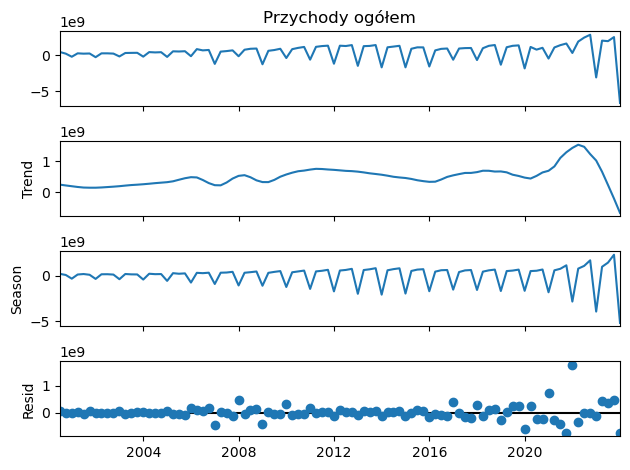

<Figure size 700x1200 with 0 Axes>

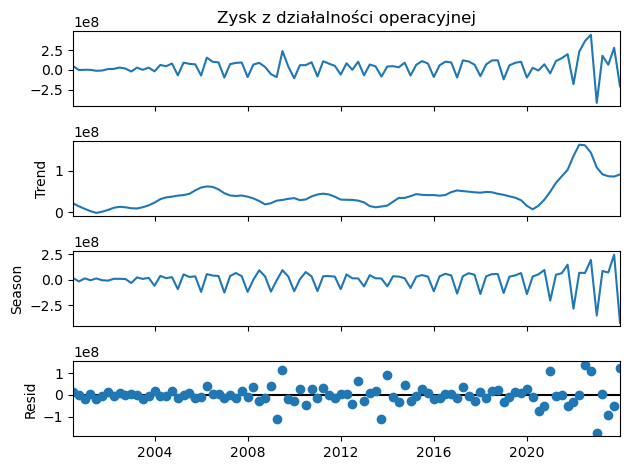

<Figure size 700x1200 with 0 Axes>

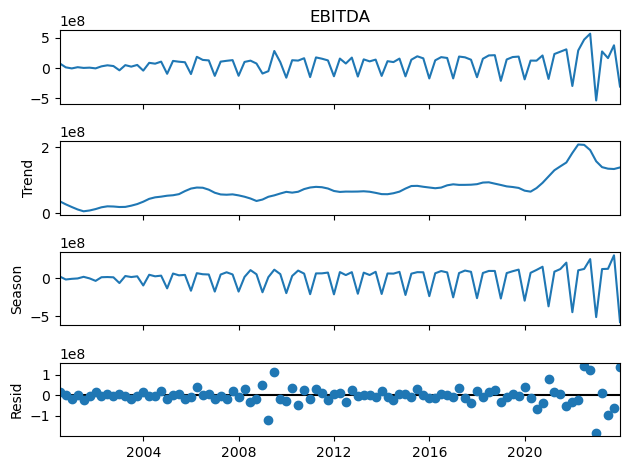

<Figure size 700x1200 with 0 Axes>

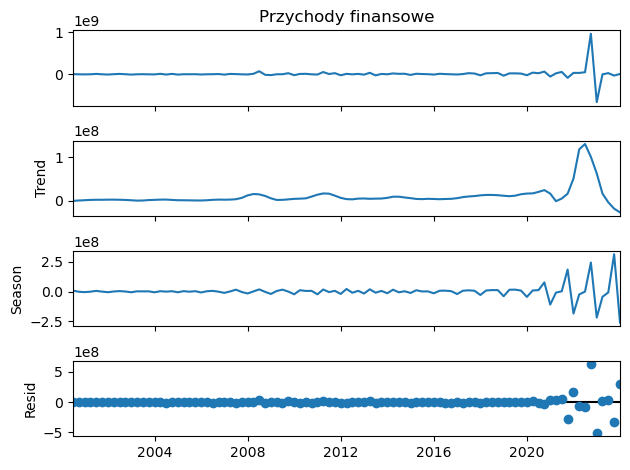

<Figure size 700x1200 with 0 Axes>

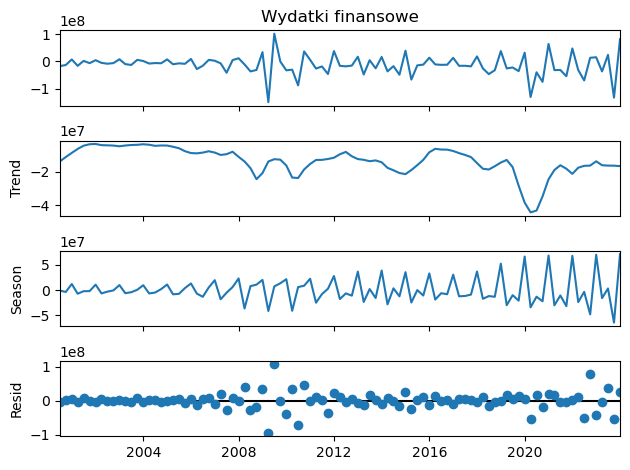

<Figure size 700x1200 with 0 Axes>

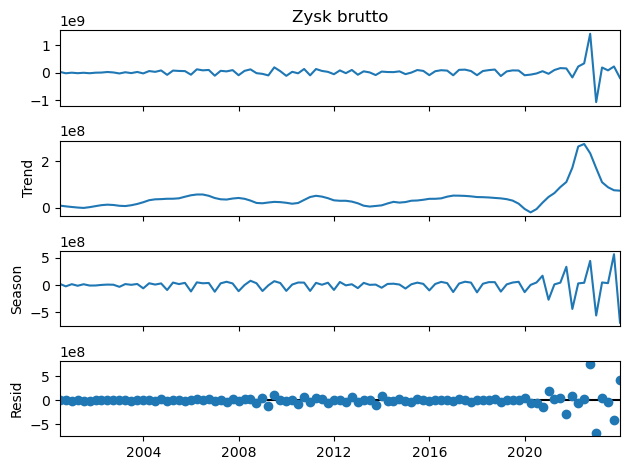

<Figure size 700x1200 with 0 Axes>

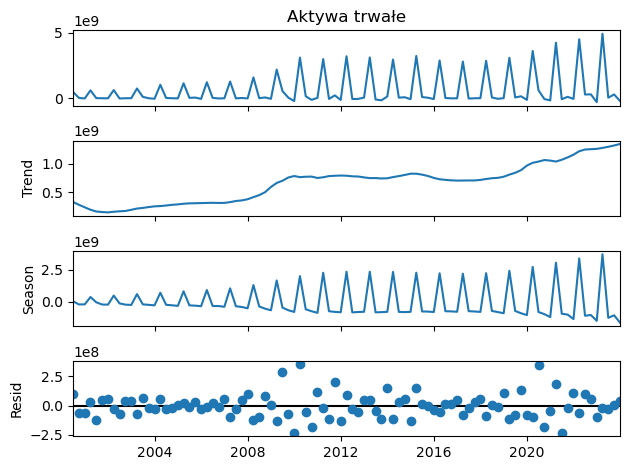

<Figure size 700x1200 with 0 Axes>

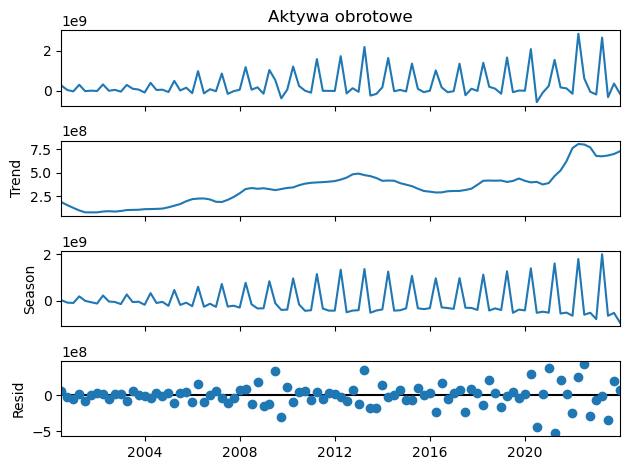

<Figure size 700x1200 with 0 Axes>

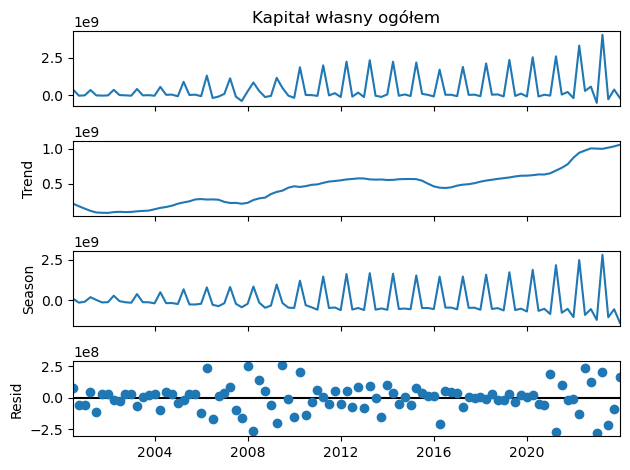

<Figure size 700x1200 with 0 Axes>

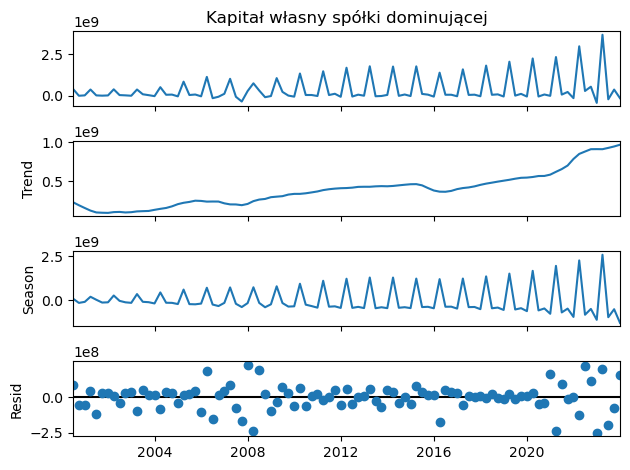

<Figure size 700x1200 with 0 Axes>

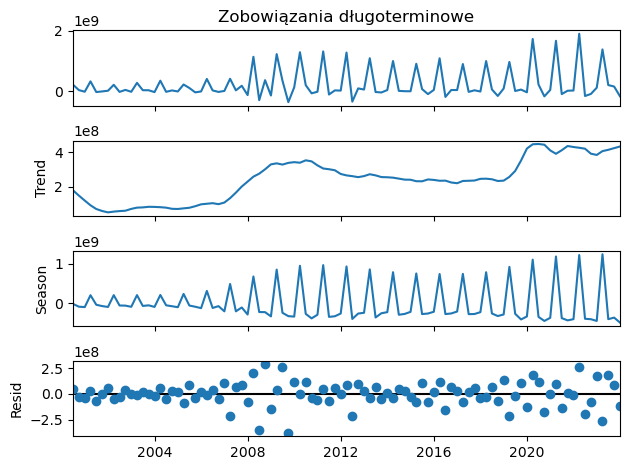

<Figure size 700x1200 with 0 Axes>

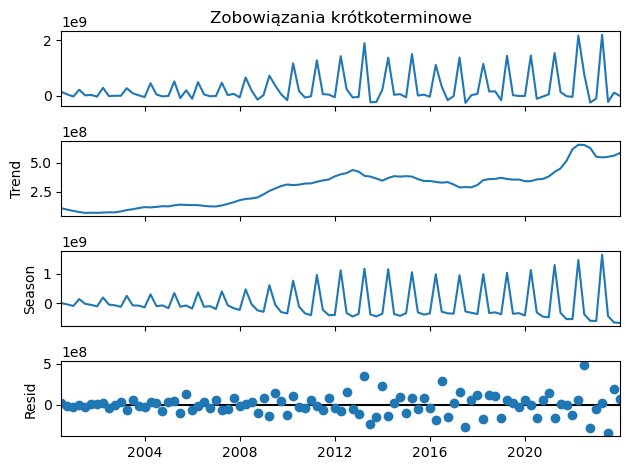

<Figure size 700x1200 with 0 Axes>

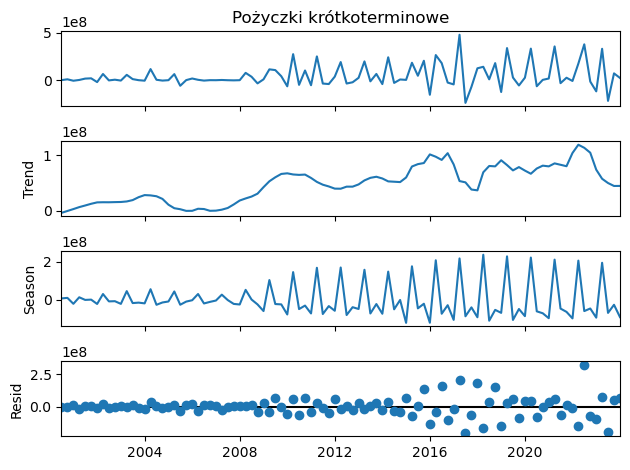

In [10]:
#Przeprowadzono dekompozycje szeregów na części pierwsze w celu sprawdzenia czy wystepuje sezonowość
temporary_ = data.copy()
temporary_ = data.drop(columns=["Indeks","Kwartał","Rok","Q","Zysk brutto ze sprzedaży", "Wynik finansowy (zysk / strata)",
                                "Długoterminowe kredyty i pożyczki"])

for i in list(temporary_.columns):
    
    from statsmodels.tsa.seasonal import STL
    
    season = data[f"{i}"]
    res = STL(endog=season, period=4).fit()
    fig = plt.figure(figsize=(7,12))
    res.plot()
    #fig.savefig(f"{i}.png")
    
plt.show()

In [19]:
#Sprwadzono teraz założenia szeregów, zbadano czy są stacjonarne, oraz czy wystepuje autokorelacja.
#W pierwszym kroku sprawdzono działanie modelu wekotorwej autoregresji. Następnie zostanie zbadany model SARIMAX.
#Po dopasowaniu klasycznych metod ekonometrycznych zostanie sprawdzona efektywność modeli uczenia maszynowego (Random Forest, XGB),
#a juz na sam koniec zostanie przeprowadzona analiza jak z prognozami radzą sobie sieci neuronowe.


In [6]:
#Sprawdzono stacjonarnosć każdej ze zmiennych

import pandas as pd
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] > 0.05:
        print("Time series is not stationary")
    else:
        print("Time series is stationary")


for i in list(columns):
    print()
    print(i)
    print("-------------")
    adf_test(data[i])



#Żaden z badanych szeregów nie jest stacjonarny według testu ADF, w kolejnym kroku przetestowano stacjonarność z wykorzystaniem testu KPSS


Przychody ogółem
-------------
ADF Statistic: -1.772814481966361
p-value: 0.3940396057198849
Critical Values:
	1%: -3.5117123057187376
	5%: -2.8970475206326833
	10%: -2.5857126912469153
Time series is not stationary

Zysk z działalności operacyjnej
-------------
ADF Statistic: -1.9439891842516384
p-value: 0.3116583884885661
Critical Values:
	1%: -3.512738056978279
	5%: -2.8974898650628984
	10%: -2.585948732897085
Time series is not stationary

EBITDA
-------------
ADF Statistic: -0.8132612789050871
p-value: 0.8151955971291419
Critical Values:
	1%: -3.512738056978279
	5%: -2.8974898650628984
	10%: -2.585948732897085
Time series is not stationary

Przychody finansowe
-------------
ADF Statistic: 0.992428367115529
p-value: 0.9941854131223997
Critical Values:
	1%: -3.5097356063504983
	5%: -2.8961947486260944
	10%: -2.5852576124567475
Time series is not stationary

Wydatki finansowe
-------------
ADF Statistic: -1.9542248791640455
p-value: 0.30699726181068043
Critical Values:
	1%: -3.51171

In [7]:
import pandas as pd
from statsmodels.tsa.stattools import kpss
import warnings
warnings.filterwarnings("ignore")

def kpss_test(timeseries):
    # Perform KPSS test
    result = kpss(timeseries)
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[3].items():
        print(f'\t{key}: {value}')
    if result[1] > 0.05:
        print("Time series is stationary")
    else:
        print("Time series is not stationary")


for i in list(columns):
    print()
    print(i)
    print("-------------")
    kpss_test(data[i])


#Zarówno testy ADF jak i KPSS wykazały brak stacjoanrności zmiennych, w nastepnym kroku zostaną one zróżnicowane


Przychody ogółem
-------------
KPSS Statistic: 0.3173450108108273
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Time series is stationary

Zysk z działalności operacyjnej
-------------
KPSS Statistic: 0.3761266675346775
p-value: 0.08744540192470798
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Time series is stationary

EBITDA
-------------
KPSS Statistic: 0.39496133208076883
p-value: 0.07932701203415136
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Time series is stationary

Przychody finansowe
-------------
KPSS Statistic: 0.31415848450357425
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Time series is stationary

Wydatki finansowe
-------------
KPSS Statistic: 0.41470038712366797
p-value: 0.07081879865359139
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Time series is stationary

Zysk brutto
-------------
KPSS Statistic: 0.28314230875671437
p-value: 0.1
Critical Value

In [9]:
#Zróżnicowany dataframe
import warnings
warnings.filterwarnings("ignore")

mol = data.drop(columns=["Kwartał", "Indeks", "Zysk brutto ze sprzedaży", "Długoterminowe kredyty i pożyczki", "Wynik finansowy (zysk / strata)", "Rok", "Q"])
mol_diff = mol.diff()
mol_diff = mol_diff.dropna()

#Jeszcze raz sprawdzono stacjonarnosc z użyciem dwóch testów

#ADF i KPSS
for i in list(columns):
    print()
    print(i)
    print("-------------")
    adf_test(mol_diff[i])
    kpss_test(mol_diff[i])



#Po róznicowaniu wszystkie szeregi wykazują stacjoanrnosć będąc badanym zarówno testem ADF jak i KPSS,
#W kolejnym kroku zbadano stopień autokorelacji


Przychody ogółem
-------------
ADF Statistic: -4.519608086379335
p-value: 0.00018120543183296358
Critical Values:
	1%: -3.5117123057187376
	5%: -2.8970475206326833
	10%: -2.5857126912469153
Time series is stationary
KPSS Statistic: 0.22541157456713326
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Time series is stationary

Zysk z działalności operacyjnej
-------------
ADF Statistic: -5.350109320348455
p-value: 4.307965035236042e-06
Critical Values:
	1%: -3.512738056978279
	5%: -2.8974898650628984
	10%: -2.585948732897085
Time series is stationary
KPSS Statistic: 0.17966257660777257
p-value: 0.1
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Time series is stationary

EBITDA
-------------
ADF Statistic: -4.927665182229192
p-value: 3.079853070506865e-05
Critical Values:
	1%: -3.512738056978279
	5%: -2.8974898650628984
	10%: -2.585948732897085
Time series is stationary
KPSS Statistic: 0.21781111243281354
p-value: 0.1
Critical Values:
	10%: 

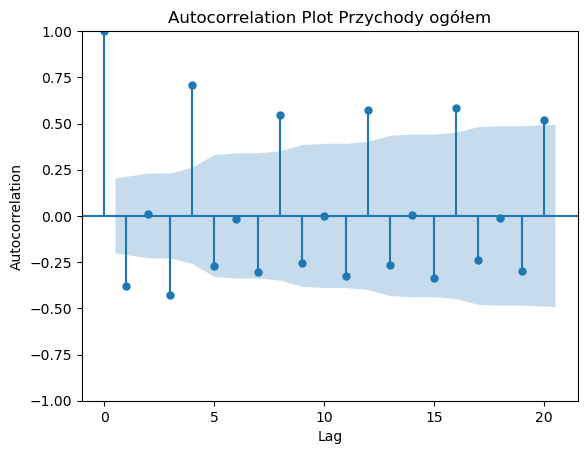

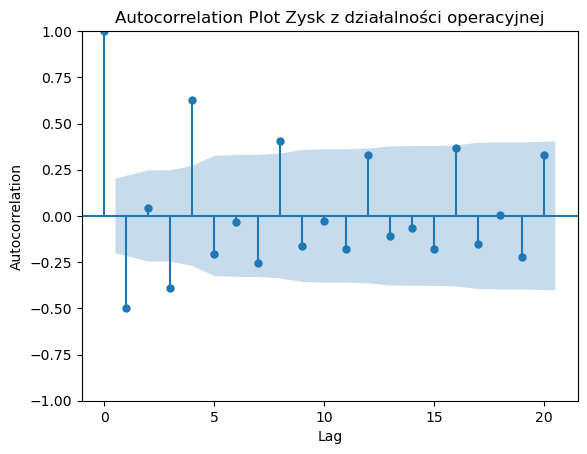

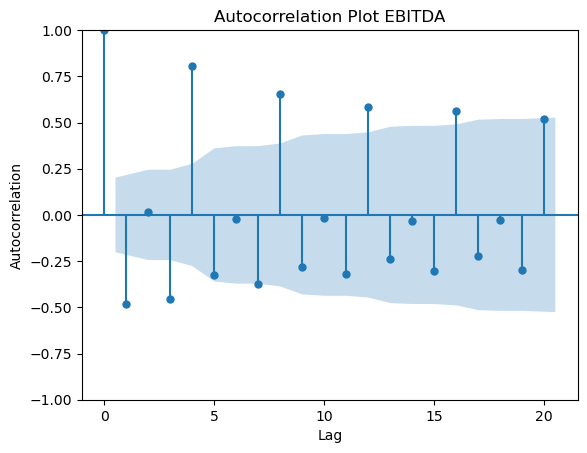

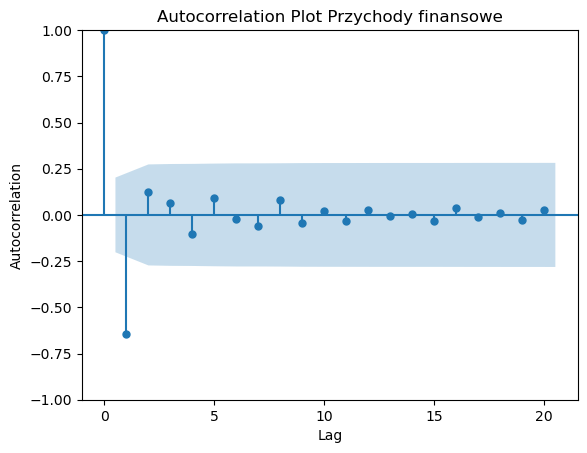

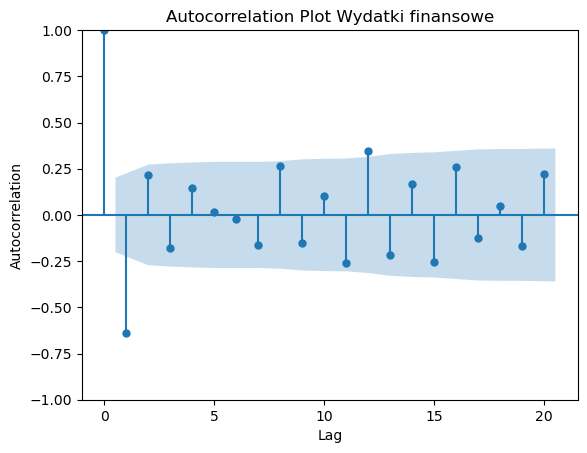

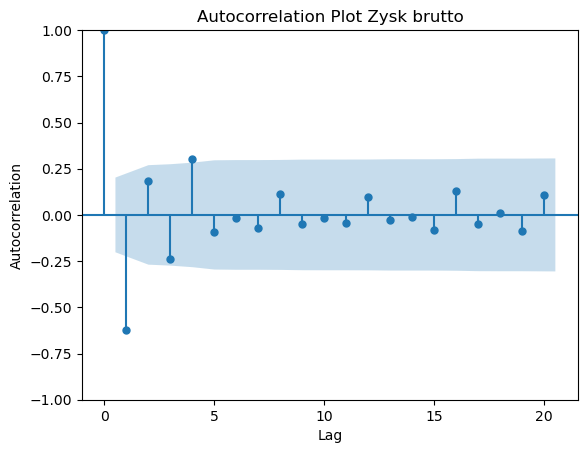

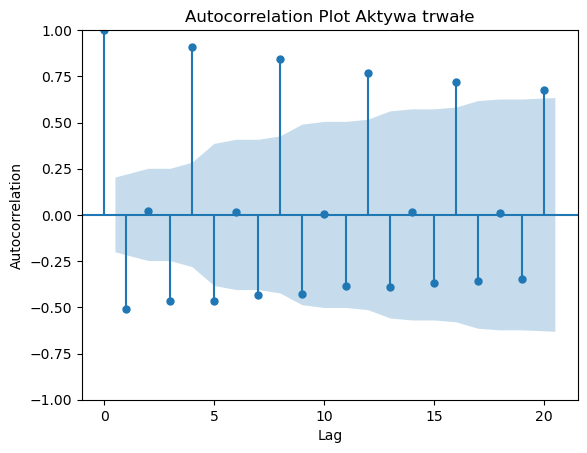

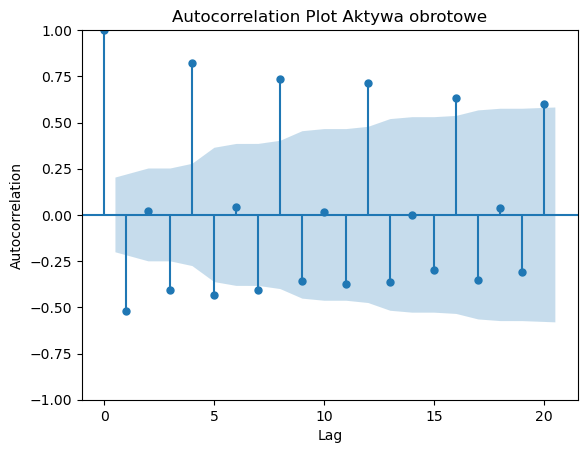

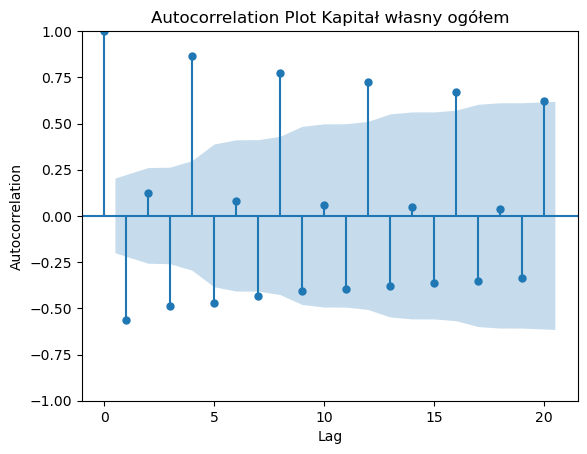

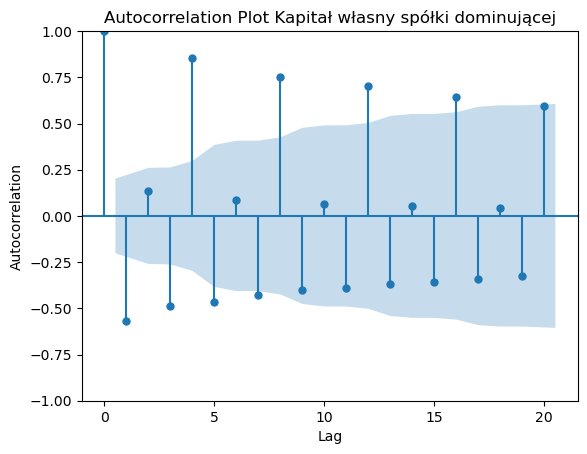

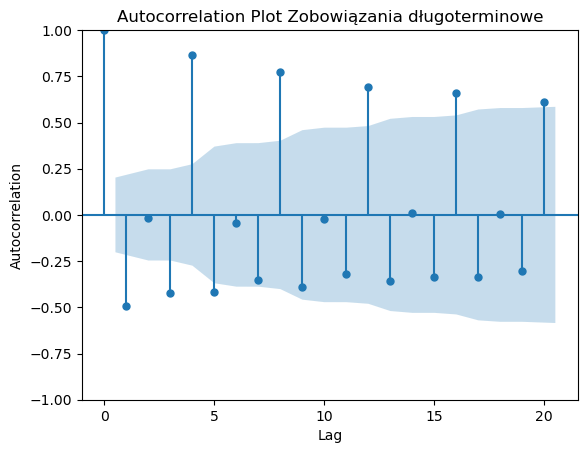

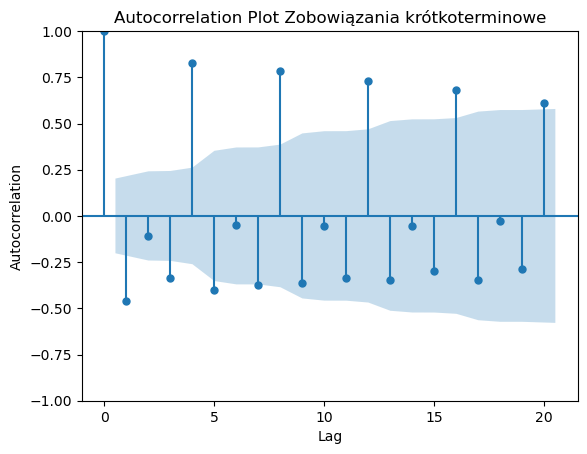

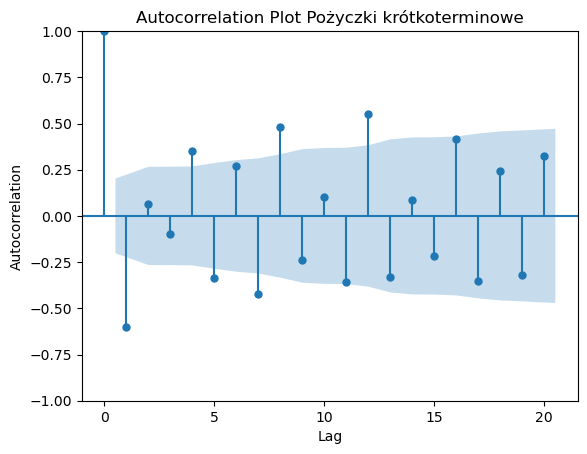

In [10]:
#Iteracyjnie sprawdzono autokorelacje każdej ze zmiennych



#ACF
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf


for i in list(columns):
    acf = plot_acf(mol_diff[i])
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title(f'Autocorrelation Plot {i}')
    acf.savefig(f"{i}_acf_Mol.png")


    
plt.show()



#Wykresy ACF wykazują istnienie istotnej autokorelacji w szeregach

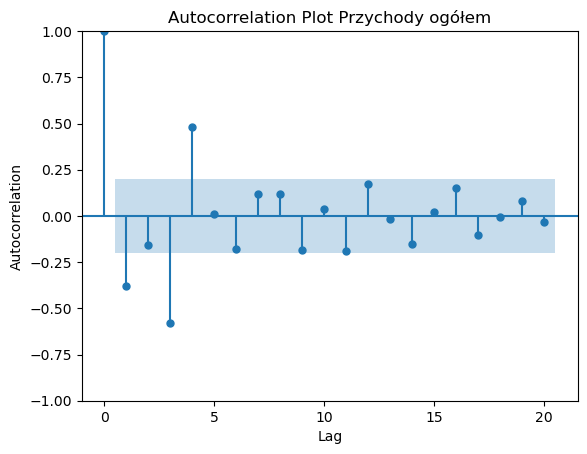

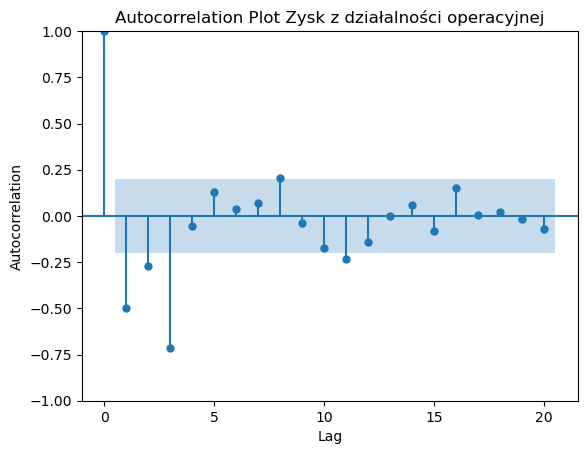

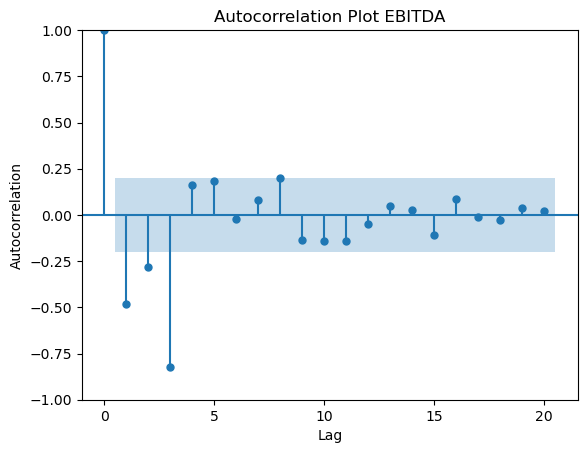

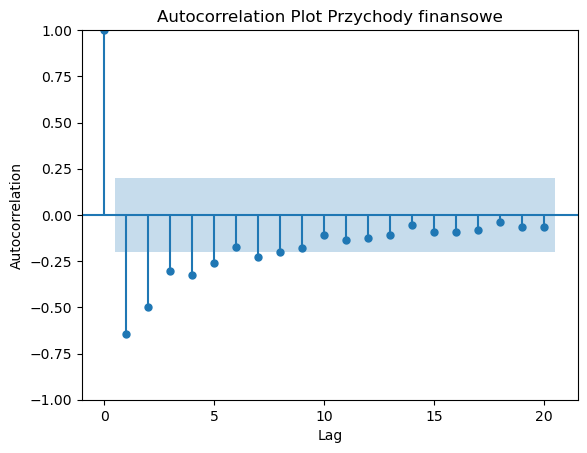

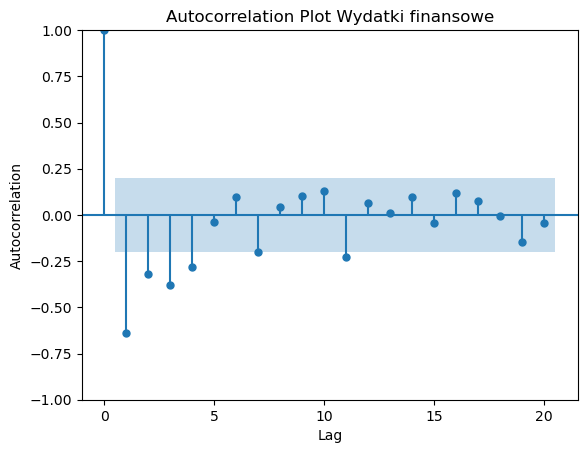

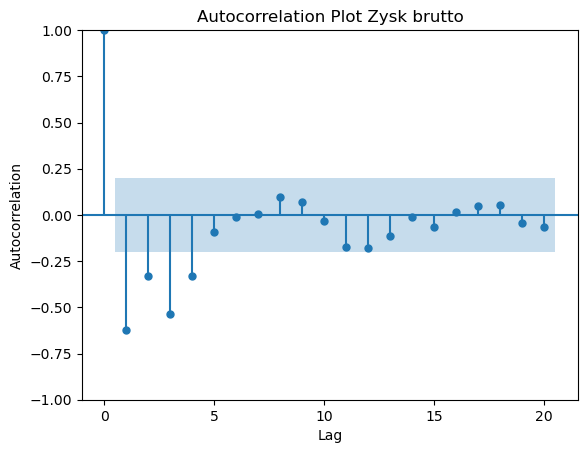

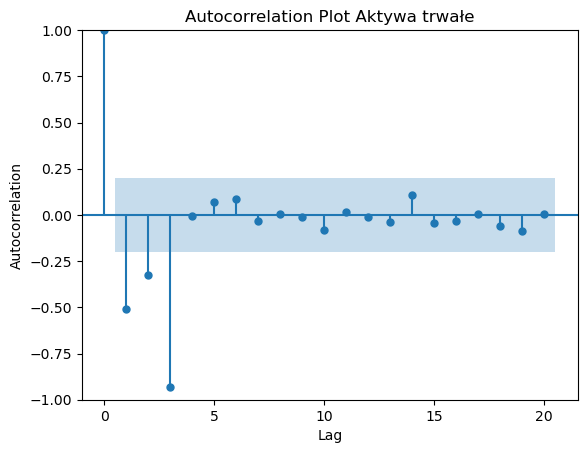

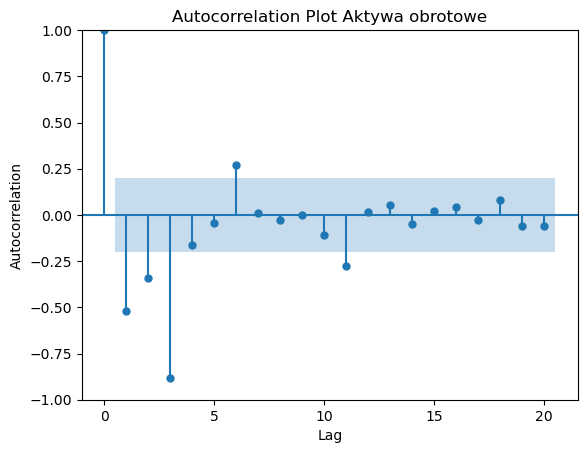

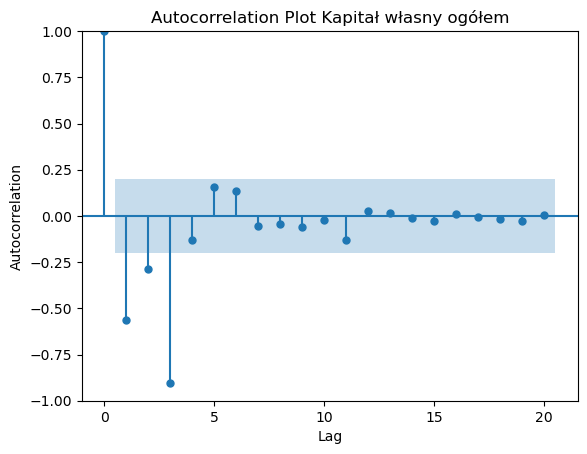

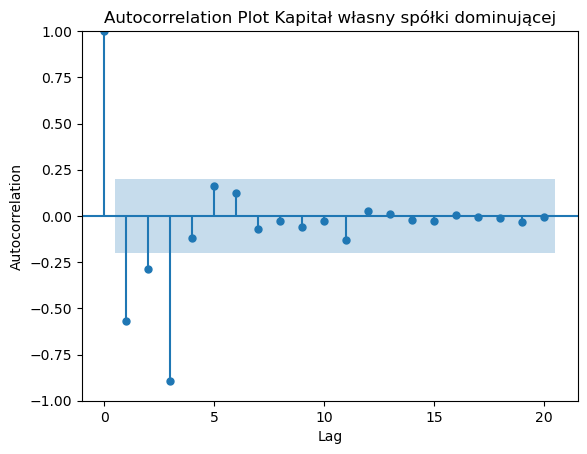

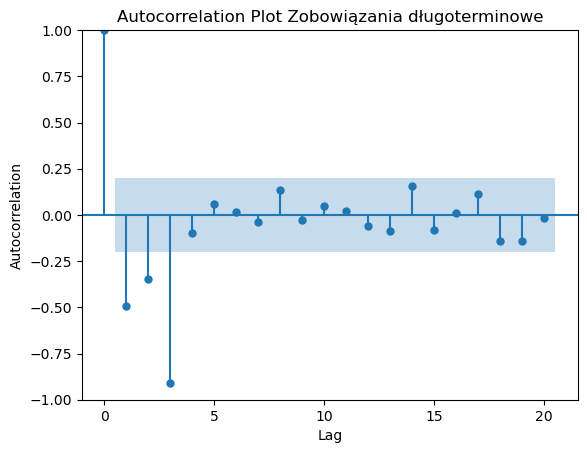

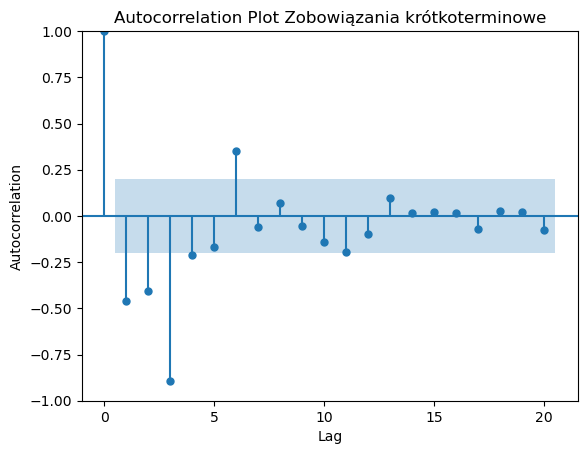

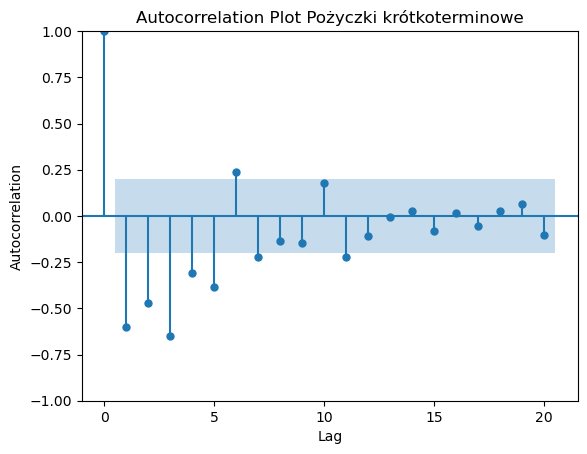

In [11]:



#PACF
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf


for i in list(columns):
    pacf = plot_pacf(mol_diff[i])
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title(f'Autocorrelation Plot {i}')
    pacf.savefig(f"{i}_pacf_Mol.png")

    
plt.show()

#Wykresy PACF potwierdziły istnienie autokorelacji

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 27, May, 2024
Time:                     20:47:01
--------------------------------------------------------------------
No. of Equations:         13.0000    BIC:                    461.205
Nobs:                     57.0000    HQIC:                   449.810
Log likelihood:          -13144.6    FPE:               1.29593e+194
AIC:                      442.567    Det(Omega_mle):    1.29099e+191
--------------------------------------------------------------------
Results for equation Przychody ogółem
                                          coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------------
const                                 -2505510.672434  22975474.754717           -0.109           0.913
L1.Przychody ogółem                         -0.046025        

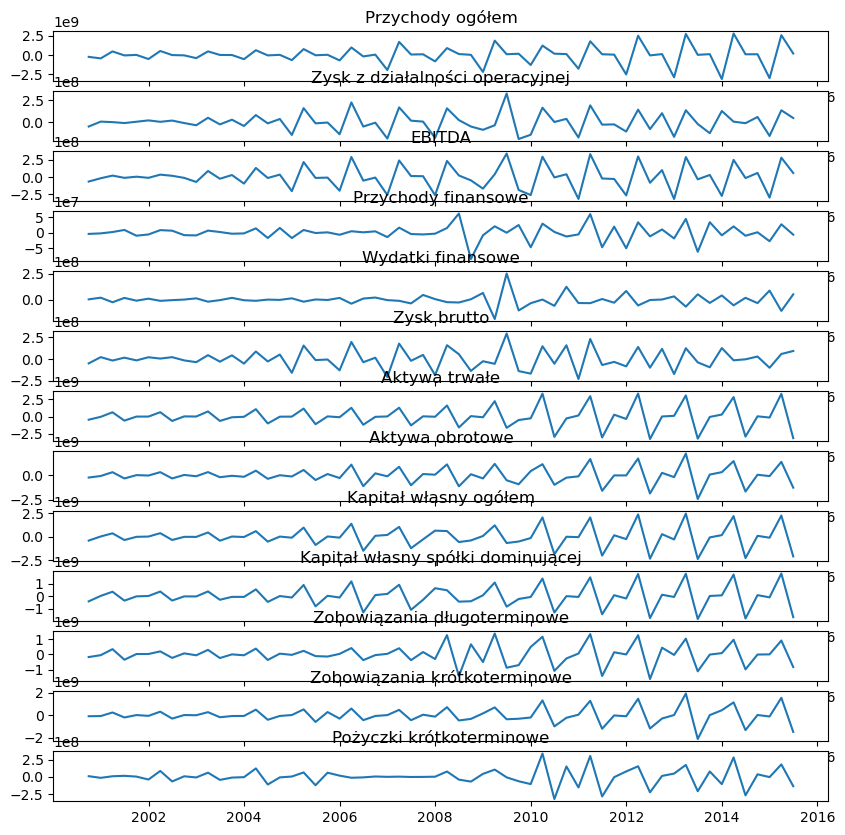

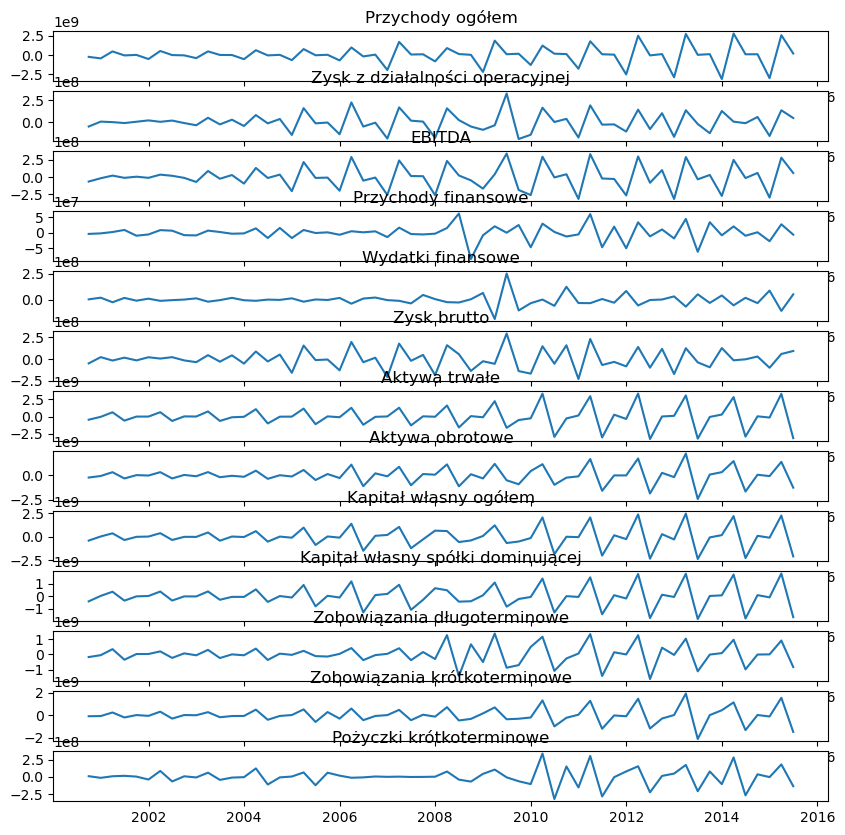

In [12]:
#VAR
#W tym kroku przeprowadzono transformacje danych, a następnie dopasowano do nich model VAR

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tools.eval_measures import rmse


#Podzielono zbiór danych na część treningową i testową w stosunku 60:40
train = mol_diff[:60]
test = mol_diff[61:]

#Dopasowano model VAR do danych treningowych 

model = VAR(train)
results = model.fit(maxlags=3)

#Sprawdzam podsumowanie
print(results.summary())

results.plot()

Przychody ogółem


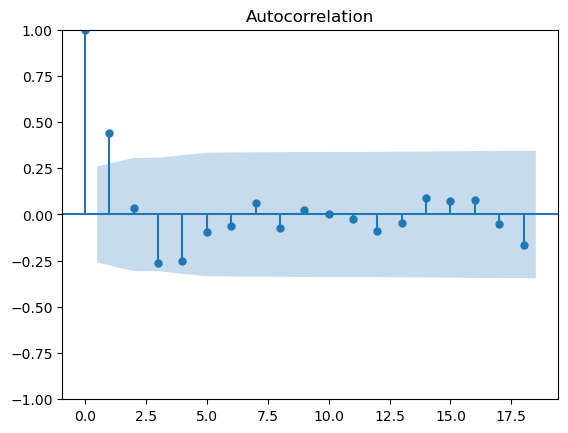

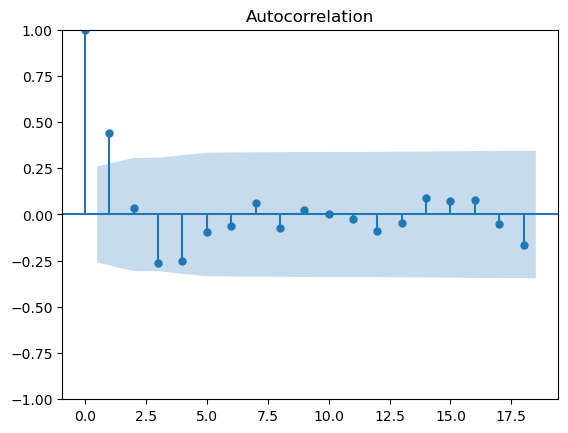

Zysk z działalności operacyjnej


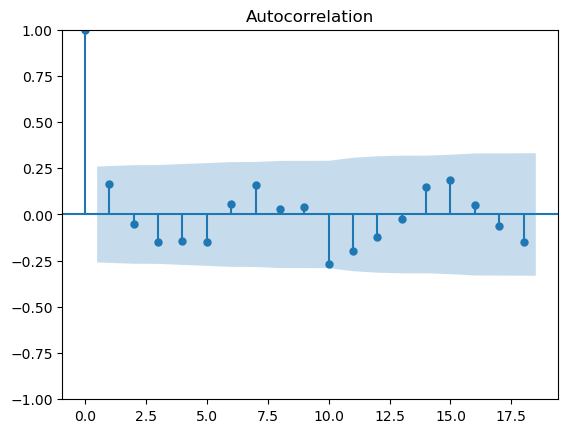

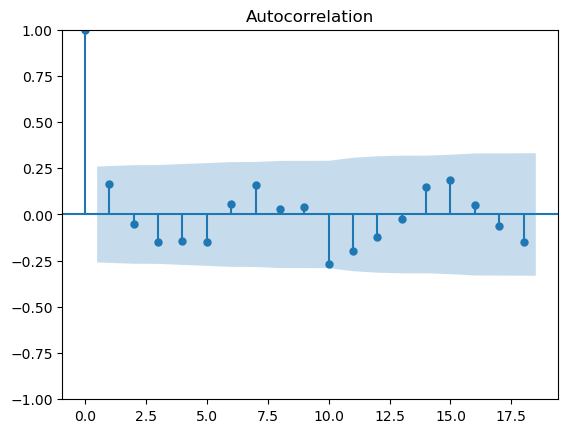

EBITDA


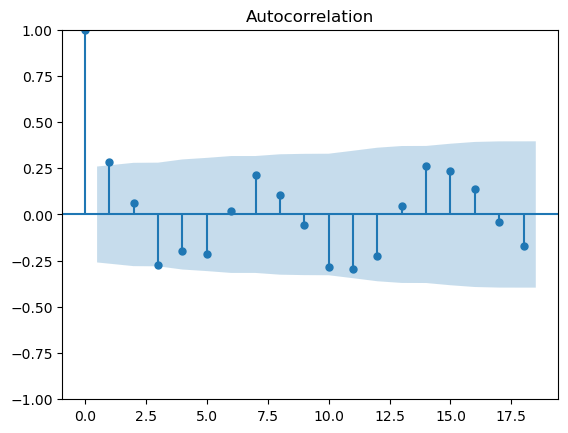

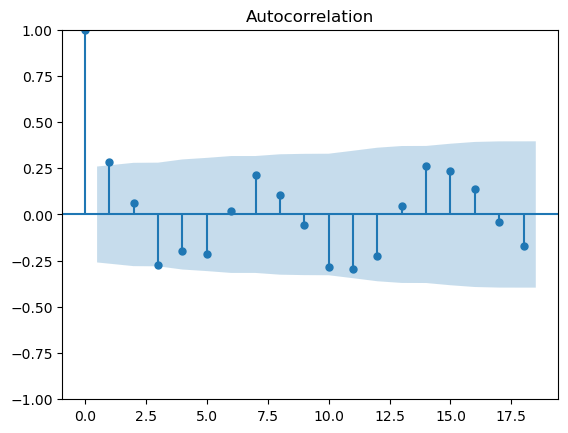

Przychody finansowe


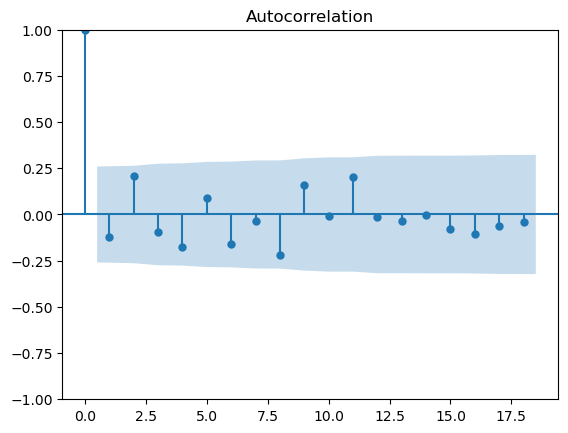

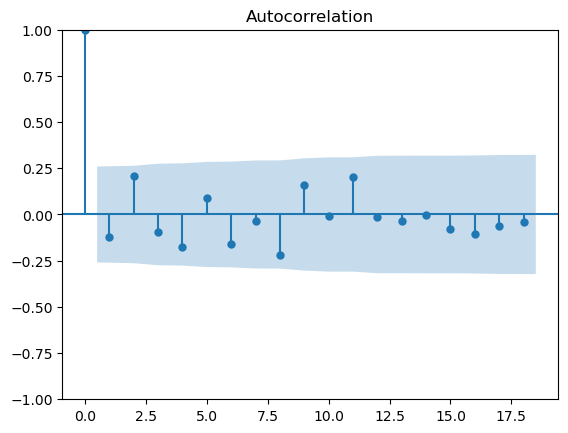

Wydatki finansowe


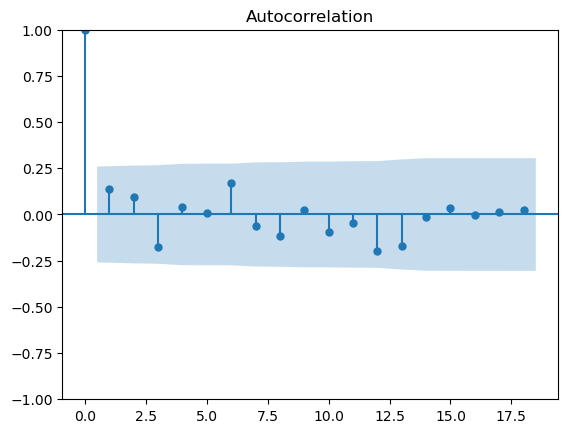

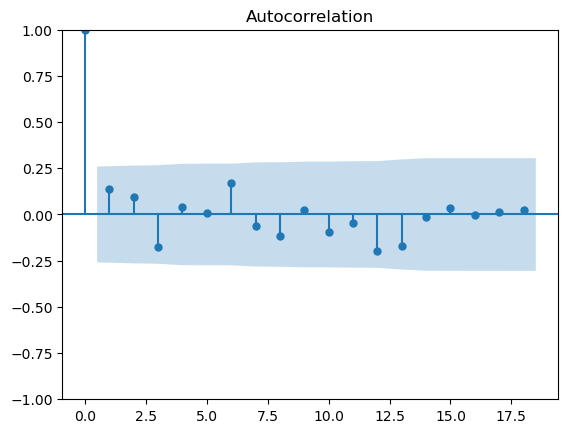

Zysk brutto


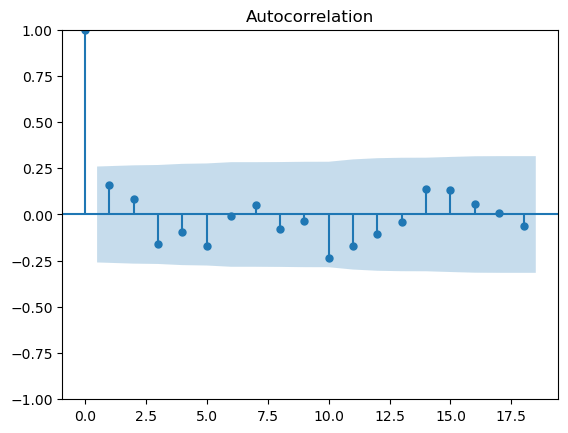

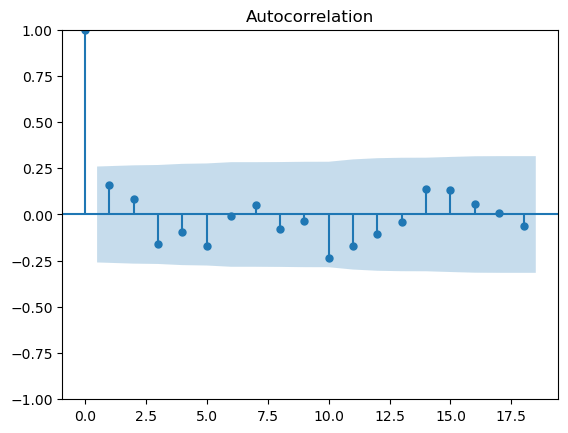

Aktywa trwałe


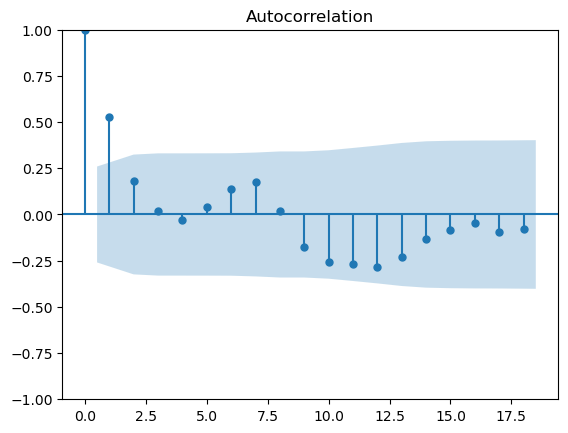

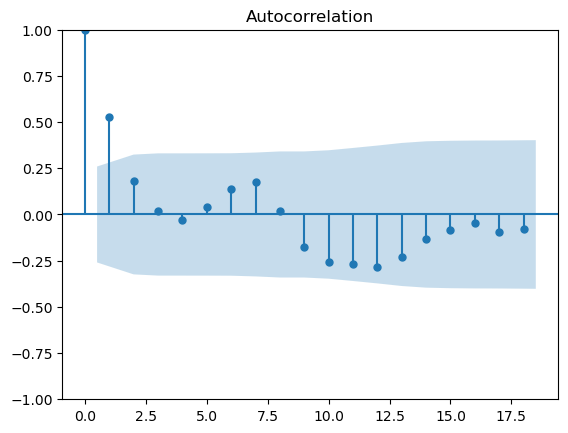

Aktywa obrotowe


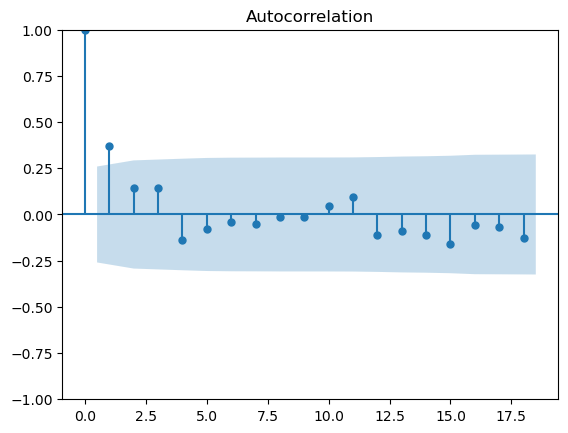

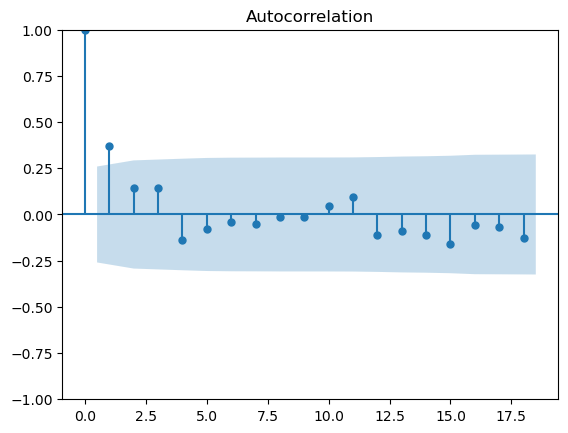

Kapitał własny ogółem


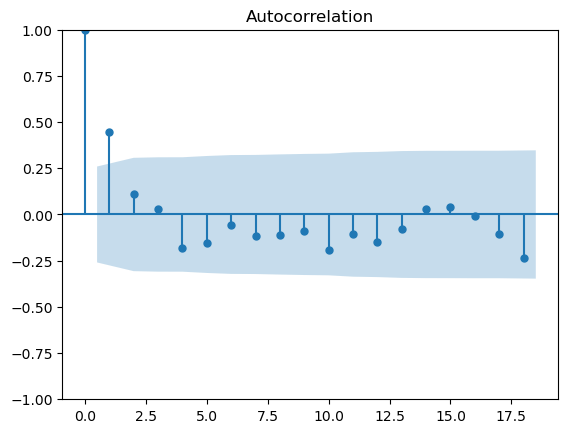

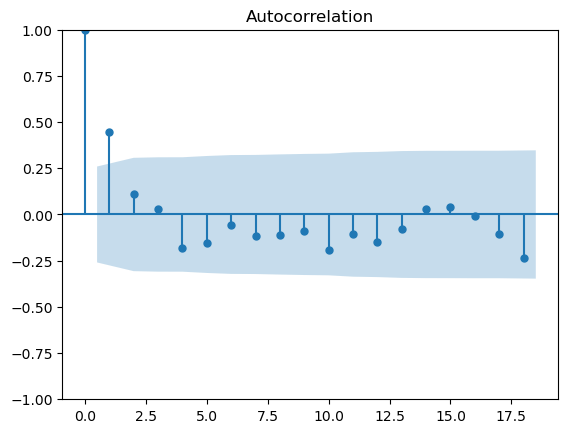

Kapitał własny spółki dominującej


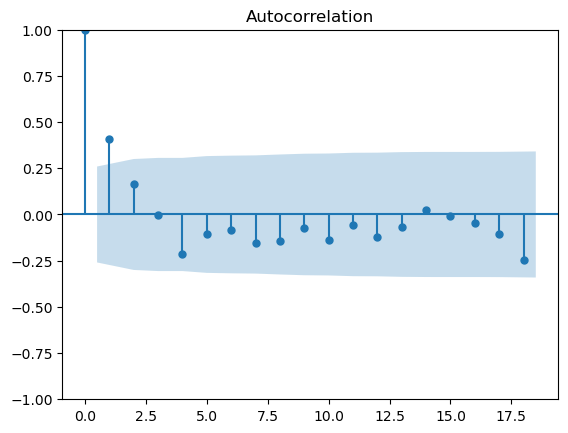

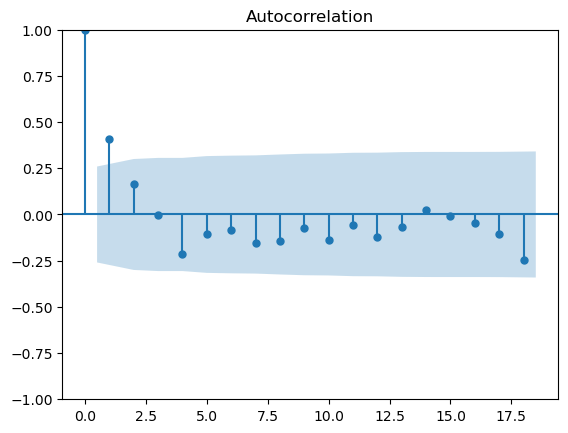

Zobowiązania długoterminowe


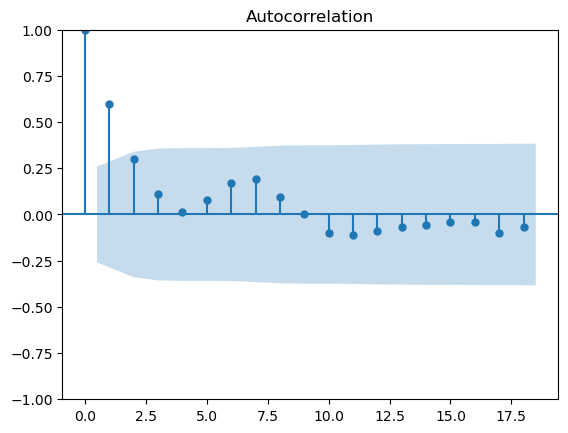

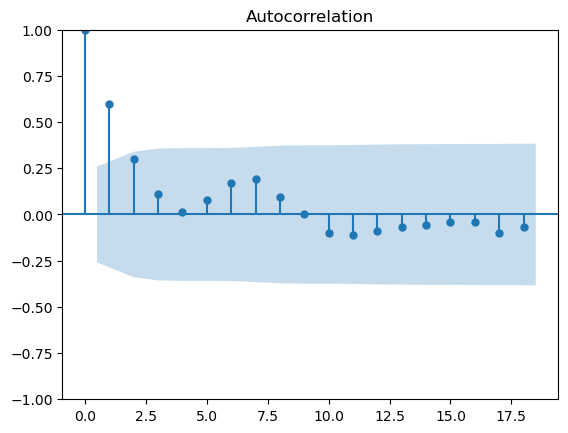

Zobowiązania krótkoterminowe


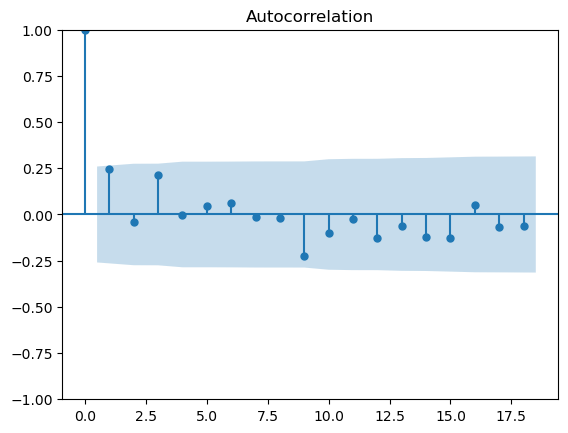

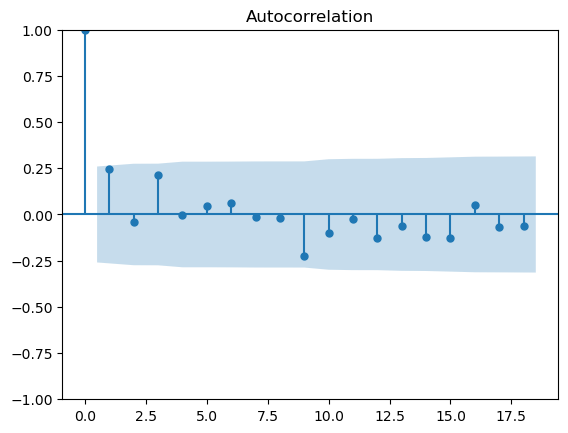

Pożyczki krótkoterminowe


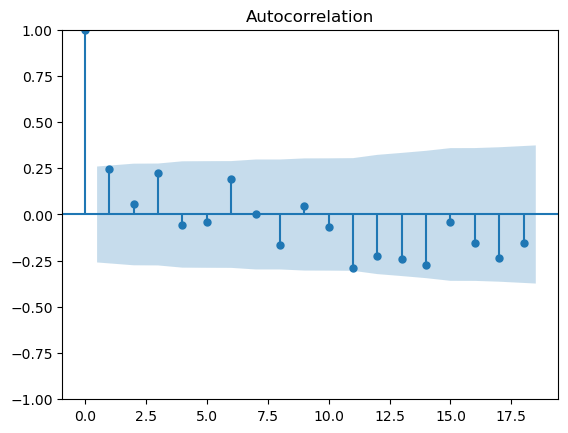

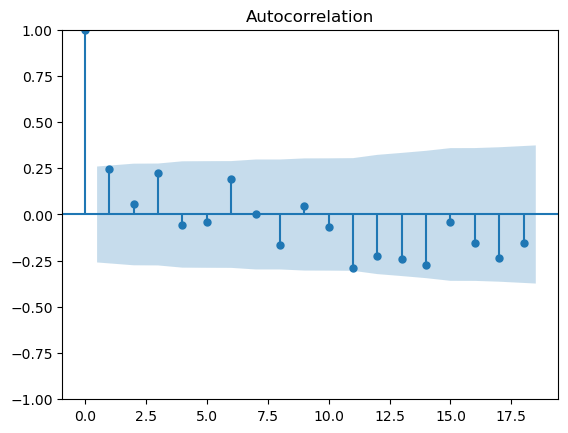

In [13]:
#Po dopasowaniu modelu sprawdzono czy reszty wykazują autokroelacje, jeżeli taka sytuacja ma miejsce to znaczy to, że nie wszystkie zależności liniowe zostały wyjaśnione

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


for i in list(results.resid.columns):
# Plot ACF and PACF of residuals
    print(f"{i}")
    plot_acf(results.resid[f"{i}"])
    plot_acf(results.resid[f"{i}"])
    plt.show()


#Na podstawie poniższych wykresów mozna stwierdzić, że nie występuje autokorelacja reszt, a zatem wszystkie zleżności liniowe zostały wyjąsnione

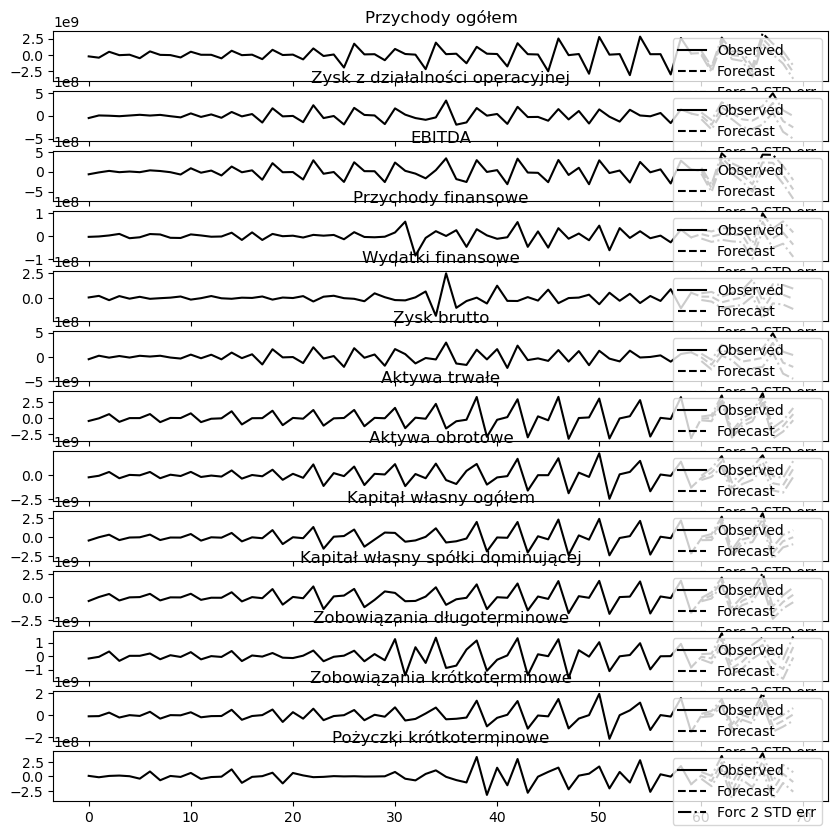

In [17]:
#W kolejnym kroku postawiono prognozy w próbie, aby zobaczyć dopasowanie

lag_order = results.k_ar
forc = results.forecast(train.values[-lag_order:], 5)
results.plot_forecast(10)

columns = list(train.columns)
index = [62,63,64,65,66]

forecast = pd.DataFrame(data = forc)
forecast.columns = train.columns
forecast.index = index
test_5 = test[:5]


In [14]:
# Make predictions on the test data
forecast = results.forecast(results.endog, steps=len(test))

# Convert the forecast array to a DataFrame for easier manipulation
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

# Calculate residuals
residuals = test - forecast_df

# Calculate RMSE for each variable
rmse_values = rmse(test, residuals, axis=0)

# Calculate PMSE for each variable
pmse_values = (residuals ** 2).mean()

# Print RMSE and PMSE for each variable
print("RMSE:")
print(rmse_values)
print("\nPMSE:")
print(pmse_values)



def mean_absolute_percentage_error(y_true, y_pred):
    """
    Oblicza średnią bezwzględną błędu procentowego (MAPE).

    Parametry:
    y_true : array-like
        Rzeczywiste wartości.
    y_pred : array-like
        Prognozowane wartości.

    Zwraca:
    mape : float
        Wartość MAPE.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


for i in list(test.columns):
    print(f"{i} ", round(mean_absolute_percentage_error(test[f"{i}"],forecast_df[f"{i}"]),2),"%")

#Oceniając model na podstawie błędów prognoz można stwierdzić, że model słabo stawia prognozy,
#ponieważ odchylenia wartości rzeczywistych od modelowych są bardzo duże
#Procentowe błędy prognoz znacznie przekraczają dopuszczalny obszar wystepowania


RMSE:
[2.31130441e+09 1.89310672e+08 3.28150748e+08 3.29357257e+07
 5.69314736e+07 2.06483763e+08 3.00612365e+09 1.66403519e+09
 2.00507276e+09 1.59882114e+09 1.43358318e+09 1.24716550e+09
 1.90000960e+08]

PMSE:
Przychody ogółem                     9.278182e+18
Zysk z działalności operacyjnej      6.640517e+16
EBITDA                               2.080981e+17
Przychody finansowe                  1.169302e+17
Wydatki finansowe                    5.329730e+15
Zysk brutto                          2.276530e+17
Aktywa trwałe                        1.408005e+19
Aktywa obrotowe                      4.009131e+18
Kapitał własny ogółem                7.820375e+18
Kapitał własny spółki dominującej    5.261507e+18
Zobowiązania długoterminowe          2.332987e+18
Zobowiązania krótkoterminowe         3.090644e+18
Pożyczki krótkoterminowe             1.368100e+17
dtype: float64
Przychody ogółem  723.4 %
Zysk z działalności operacyjnej  387.27 %
EBITDA  1098.02 %
Przychody finansowe  363.98 %
Wydatk

In [15]:
#Random Forest
#W następnym kroku dopasowano model Random Forest, jednak zanim to zrobiono zastosowano model SARIMAX jako benchmark

random_forest_mol = data


#Dostosowanie danych
random_forest_mol['Rok'] = random_forest_mol['Kwartał'].str[-4:]  # Extract last 4 characters as year
random_forest_mol['Q'] = random_forest_mol['Kwartał'].str[1:2]  # Extract 2nd character as quarter
random_forest_mol['Q'] = pd.to_numeric(random_forest_mol['Kwartał'], errors='coerce').fillna(0).astype(int)
#random_forest_mol = random_forest_mol["Rok"].astype(int)


#Wyrzucono wadliwe zmienne
random_forest_mol = random_forest_mol.drop(columns=["Zysk brutto ze sprzedaży", "Wynik finansowy (zysk / strata)", "Indeks", "Kwartał", "Długoterminowe kredyty i pożyczki", "Rok"])


random_forest_mol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 2000-06-30 to 2023-12-31
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Przychody ogółem                   95 non-null     float64
 1   Zysk z działalności operacyjnej    95 non-null     float64
 2   EBITDA                             95 non-null     float64
 3   Przychody finansowe                95 non-null     float64
 4   Wydatki finansowe                  95 non-null     float64
 5   Zysk brutto                        95 non-null     float64
 6   Aktywa trwałe                      95 non-null     float64
 7   Aktywa obrotowe                    95 non-null     float64
 8   Kapitał własny ogółem              95 non-null     float64
 9   Kapitał własny spółki dominującej  95 non-null     float64
 10  Zobowiązania długoterminowe        95 non-null     float64
 11  Zobowiązania krótkoterminowe       95 non-null  

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")



#W tej części iteracyjnie dopasowano model SARIMAX do każej ze zmiennych.
#Nastepnie policzono błędy prognoz oraz pokazano wykres wartości rzeczywistych do modelowych
for i in list(train.columns):
    train_t = train[f"{i}"]
    model = SARIMAX(train_t, order=(3, 0, 3), seasonal_order=(1, 0, 0, 4))
    results = model.fit()
    
    # Wyświetlenie podsumowania modelu
    print(results.summary())
    
    forecast_results = results.forecast(steps=5)
    test_t = test[:5]
    
    fig = plt.figure(figsize=(7,12))
    plt.plot(forecast_results, label="Modelowe")
    plt.plot(test_t[f"{i}"], c='r', label="Rzeczywiste")
    plt.title("Modelowe vs Rzeczywiste")
    plt.legend()
    plt.show()
    
    from sklearn.metrics import mean_squared_error
    
    mse = mean_squared_error(test_t[f"{i}"], forecast_results)
    print("Błąd średniokwadratowy (MSE): ", mse)
    
    
    import numpy as np
    
    def mean_absolute_percentage_error(y_true, y_pred):
        """
        Oblicza średnią bezwzględną błędu procentowego (MAPE).
    
        Parametry:
        y_true : array-like
            Rzeczywiste wartości.
        y_pred : array-like
            Prognozowane wartości.
    
        Zwraca:
        mape : float
            Wartość MAPE.
        """
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    
    
    
    mape = mean_absolute_percentage_error(test_t[f"{i}"], forecast_results)
    print("MAPE: ", round(mape,2),"%")



#Model doapsowuje się znacznie lepiej niż jego poprzednik (VAR), głównie przez uwzględnienie sezonowości
#Odchylenia od wartości rzeczwistych nie są duże, co znaczy, że model możę być dobrym wyborem do prognozowania tych danych.
#Przed ostatecznym dopasowaniem należałoby jeszcze sprawdzić optymalny wybór parametrów

NameError: name 'train' is not defined

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

#Po zbadaniu działania modelu SARIMAX dane wytrenowano na modelu Lasów Losowych.
#Wydzielono zbiory etykiet oraz cech, podzielono je na testowe oraz treningowe, a natępnie zdefiniowano Las Losowy
#Wykorzystano model Lasu stosowany do problemów regresji
#Optymalną wielkość lasu wybrano korzystając z walidacji krzyżowej
#Po wytrenowaniu modelu wyświetlono informacje o wynikach błędów prognoz oraz jego dokładności dla każdej ze zmiennych


def RandomForest(i):
    # Extracting labels
    labels = np.array(random_forest_mol[f"{i}"])
    
    # Extracting features
    features = random_forest_mol.drop(f"{i}", axis=1)
    features_np = np.array(features)
    
    # Splitting data into training and testing sets
    train_l = labels[:60]
    test_l = labels[61:]
    
    train_f = features_np[:60]
    test_f = features_np[61:]
    
    # List of feature names
    f_list = list(features.columns)
    
    # Initialize RandomForestRegressor
    rf = RandomForestRegressor(n_estimators=1000, random_state=42)
    
    # Perform cross-validation
    scores = cross_val_score(rf, train_f, train_l, cv=5)
    
    # Fit the model
    rf.fit(train_f, train_l)
    
    # Print average accuracy obtained from cross-validation
    print("----------------------------------------")
    print(f'Random Forest for {i}')
    print("Cross-validation scores:", scores)
    print("Mean accuracy:", scores.mean())
    print("Standard deviation of accuracy:", scores.std())

vars = list(mol_diff.columns)

for i in vars:
    RandomForest(i)

----------------------------------------
Random Forest for Przychody ogółem
Cross-validation scores: [-0.82567359 -0.08007538  0.65528155  0.83640881  0.68514483]
Mean accuracy: 0.254217246502526
Standard deviation of accuracy: 0.6266440698210937
----------------------------------------
Random Forest for Zysk z działalności operacyjnej
Cross-validation scores: [0.07198356 0.91511712 0.8875001  0.79933026 0.48886935]
Mean accuracy: 0.632560078282266
Standard deviation of accuracy: 0.31860265201279087
----------------------------------------
Random Forest for EBITDA
Cross-validation scores: [-1.68046316  0.96751694  0.71298237  0.81931357  0.42561925]
Mean accuracy: 0.24899379441085073
Standard deviation of accuracy: 0.9809002219568389
----------------------------------------
Random Forest for Przychody finansowe
Cross-validation scores: [-0.26639435 -2.20744183  0.29472141  0.55402036  0.18837388]
Mean accuracy: -0.2873441056747702
Standard deviation of accuracy: 0.9960136735108215
----

MAPE Przychody ogółem:  58.92 %


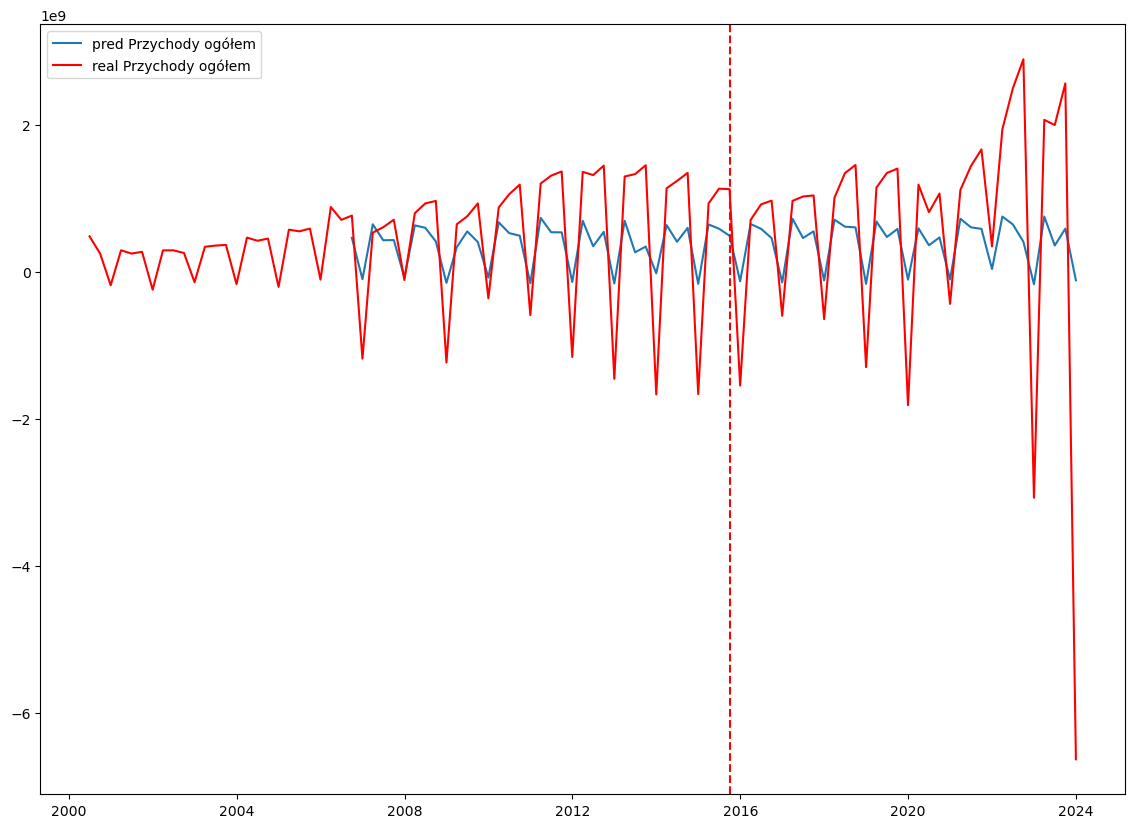

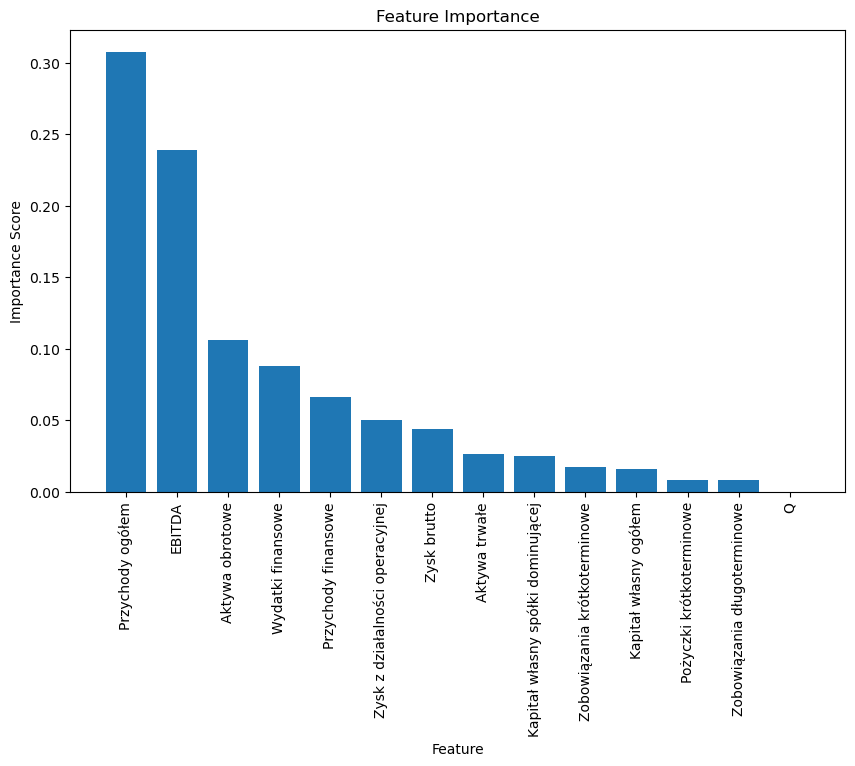

MAPE Zysk z działalności operacyjnej:  54.18 %


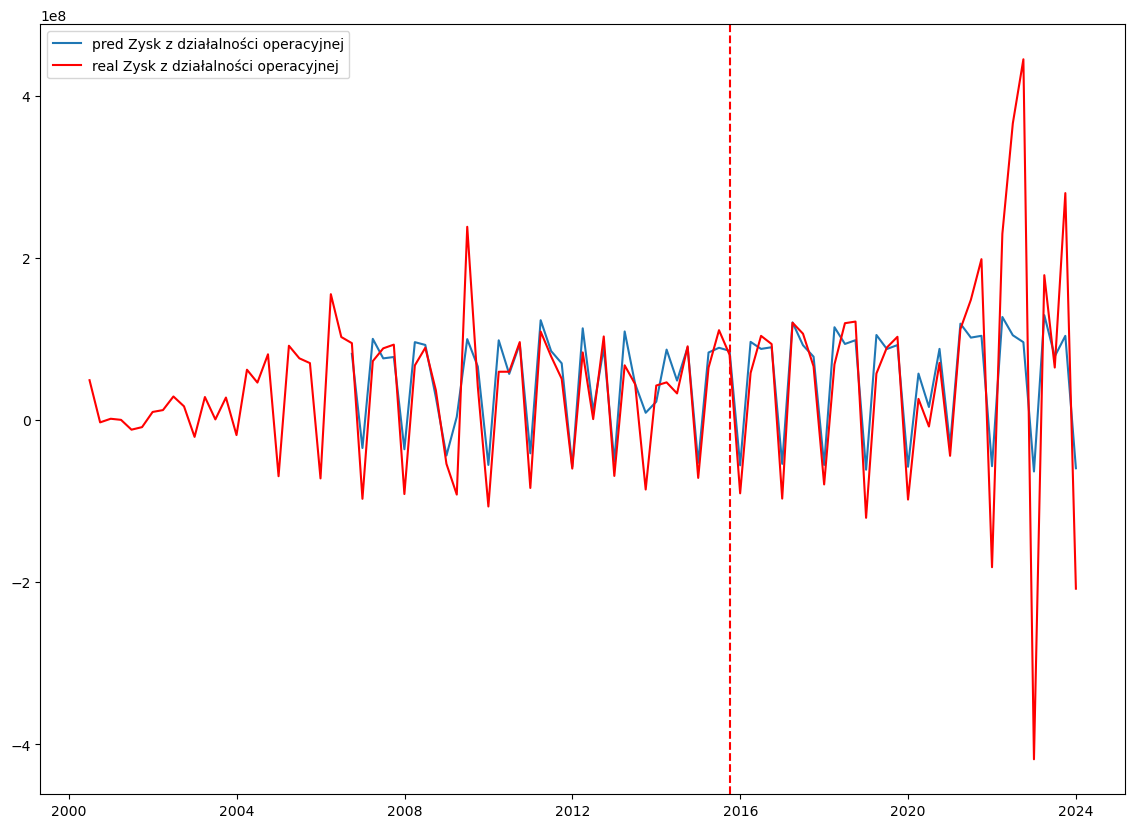

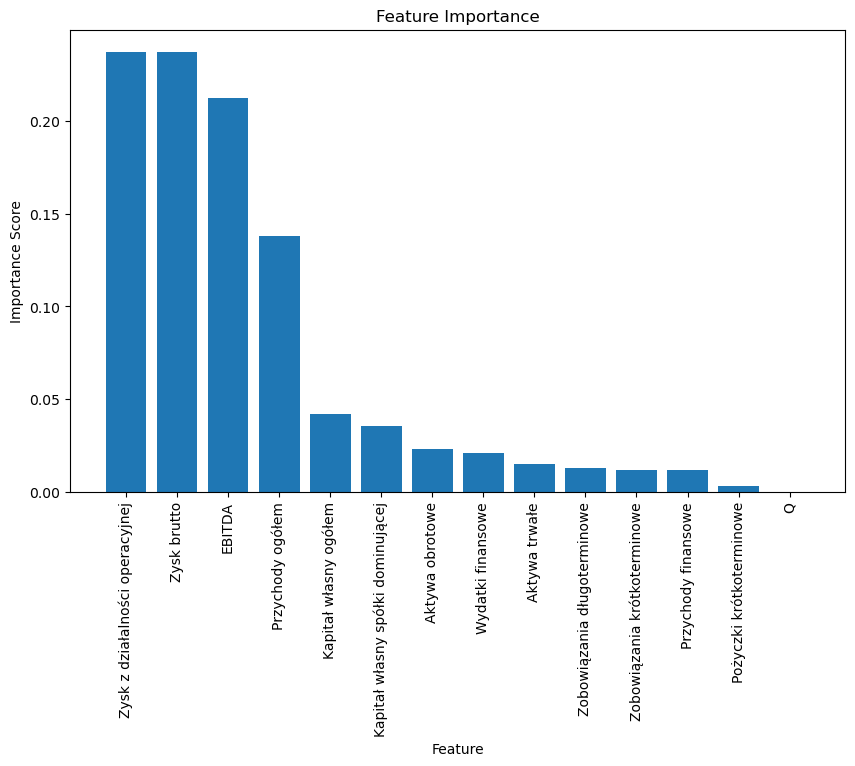

MAPE EBITDA:  43.09 %


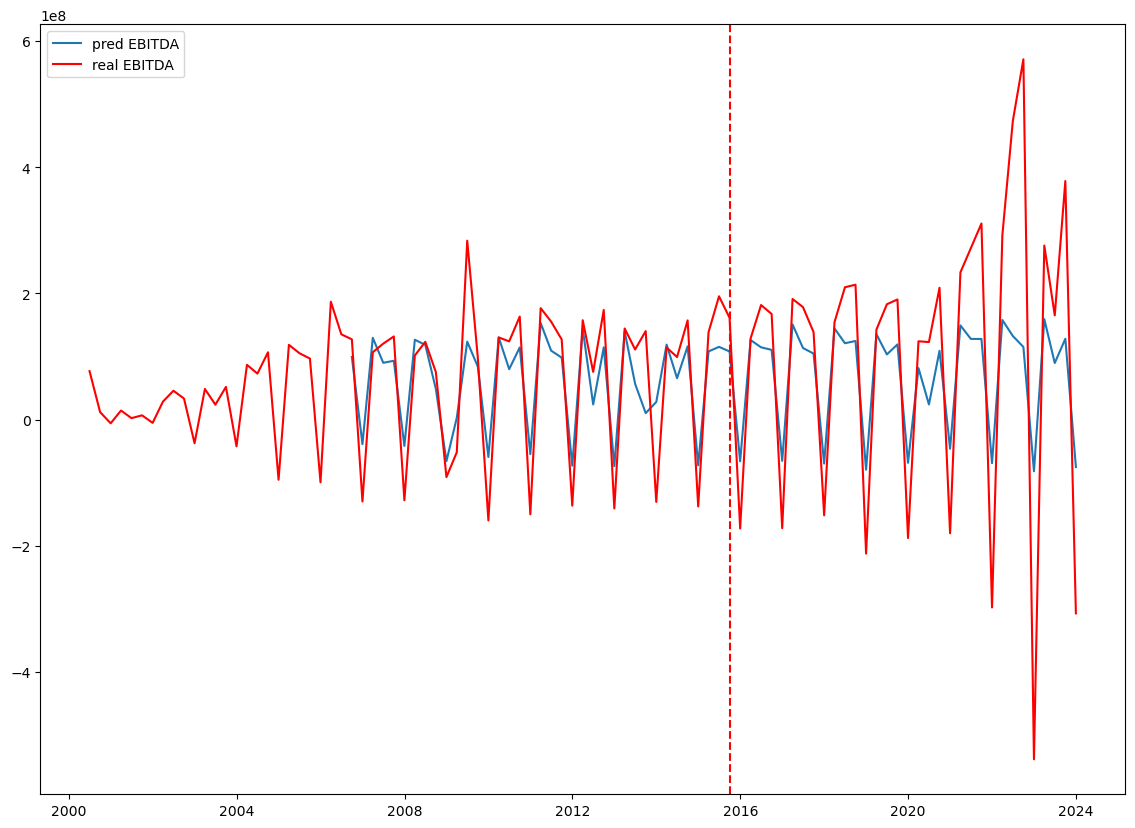

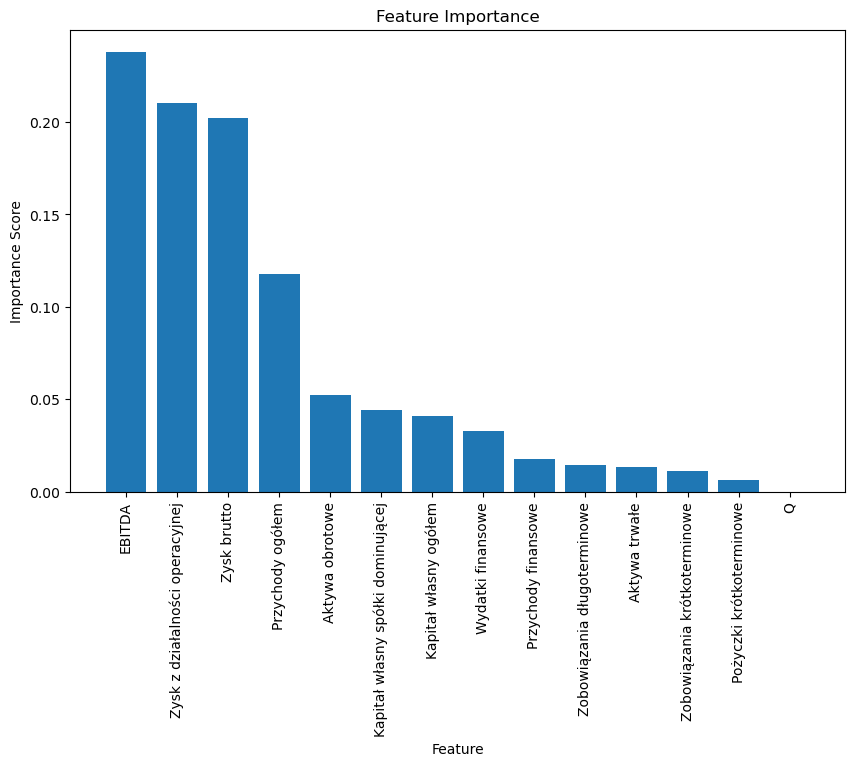

MAPE Przychody finansowe:  52.79 %


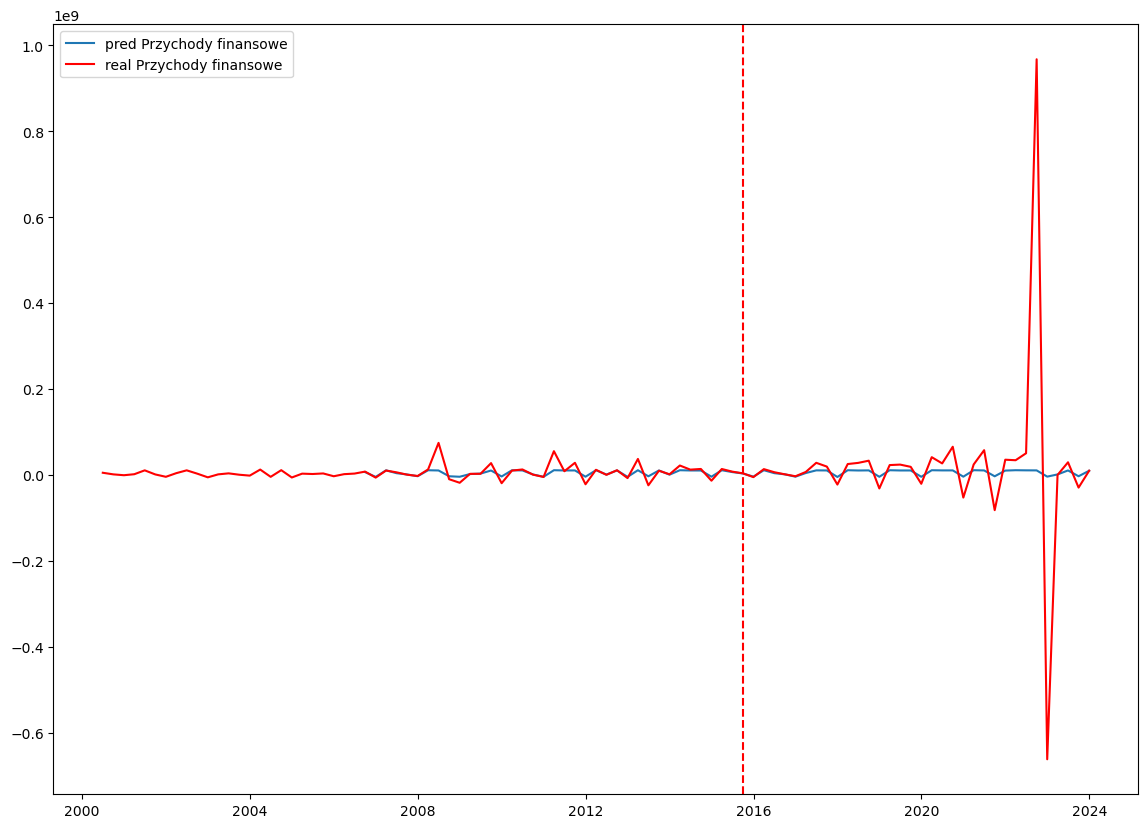

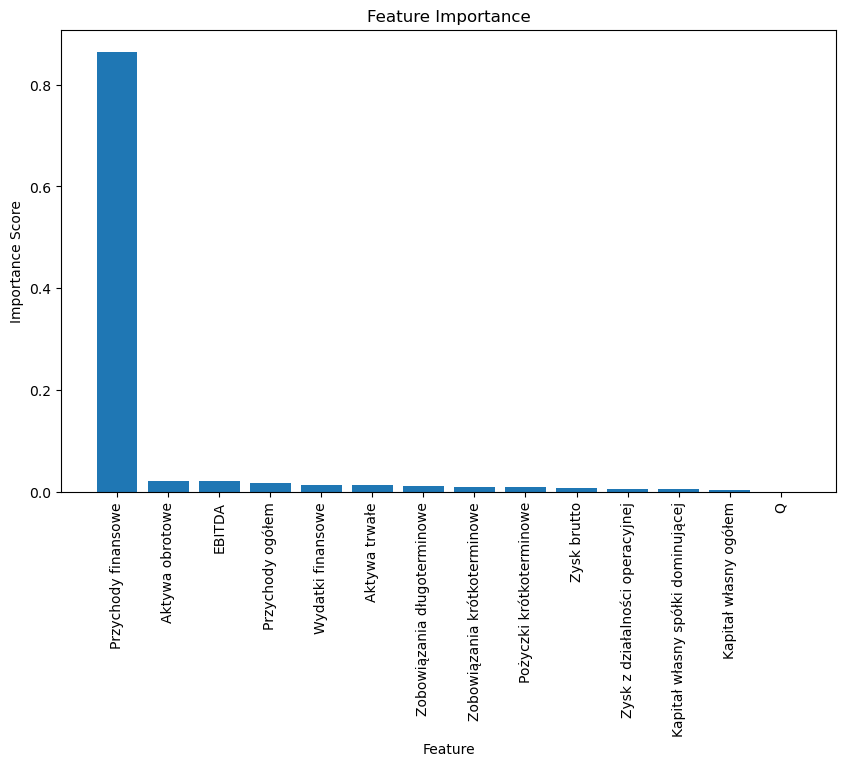

MAPE Wydatki finansowe:  51.78 %


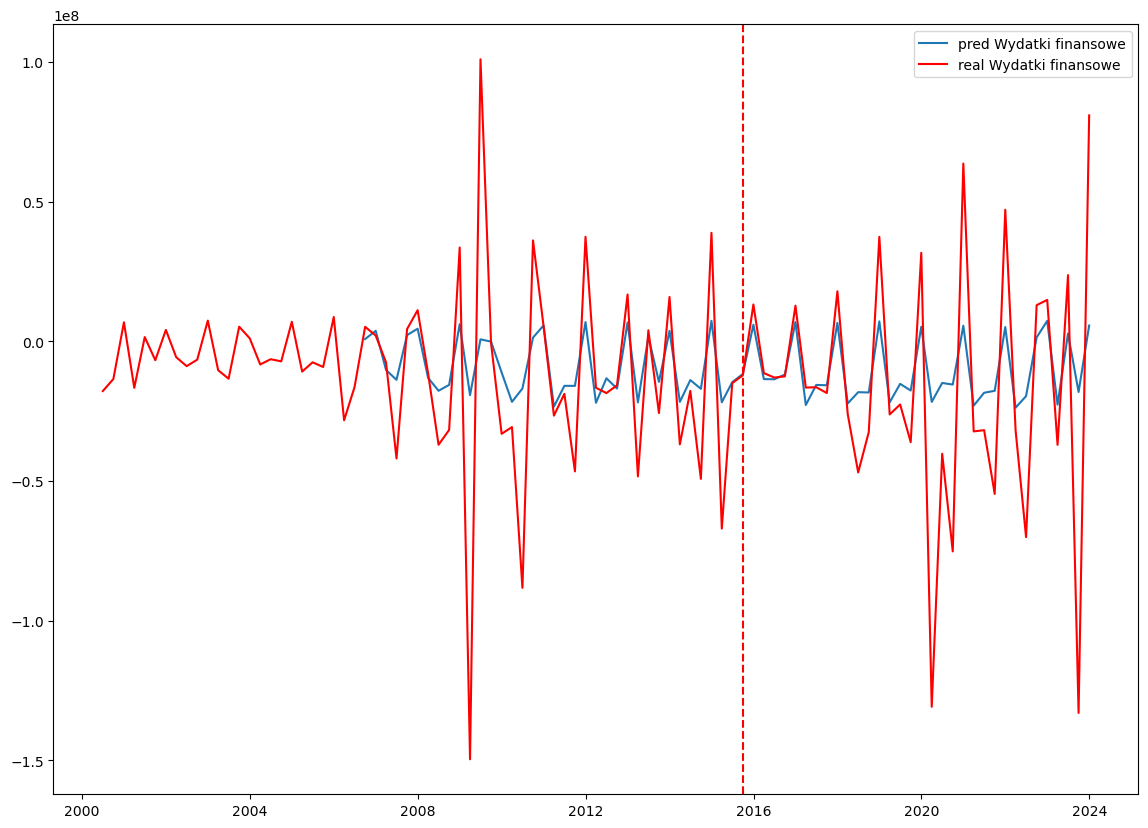

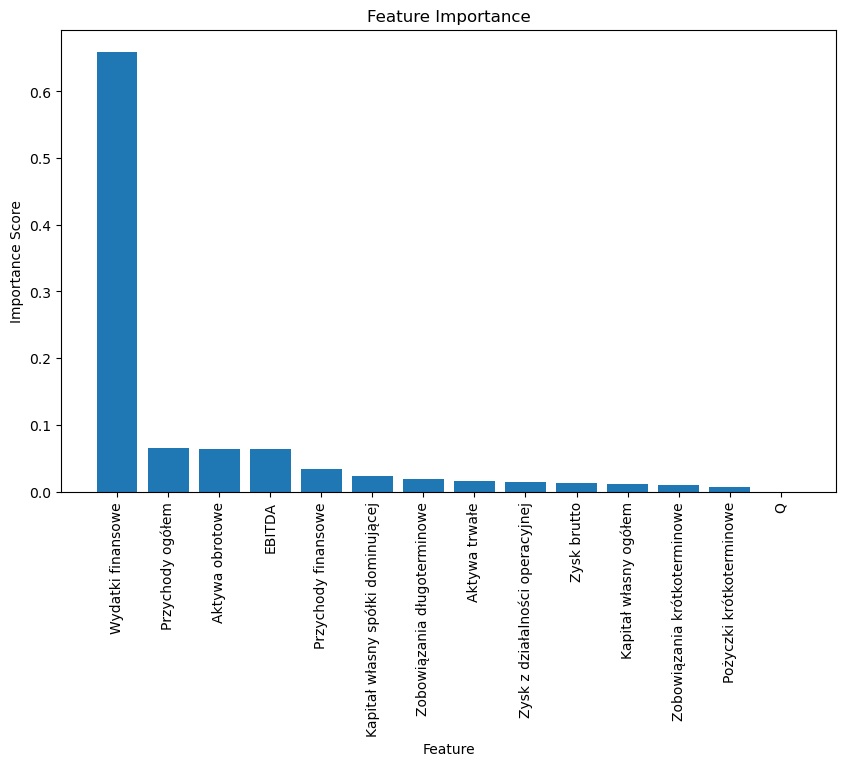

MAPE Zysk brutto:  54.71 %


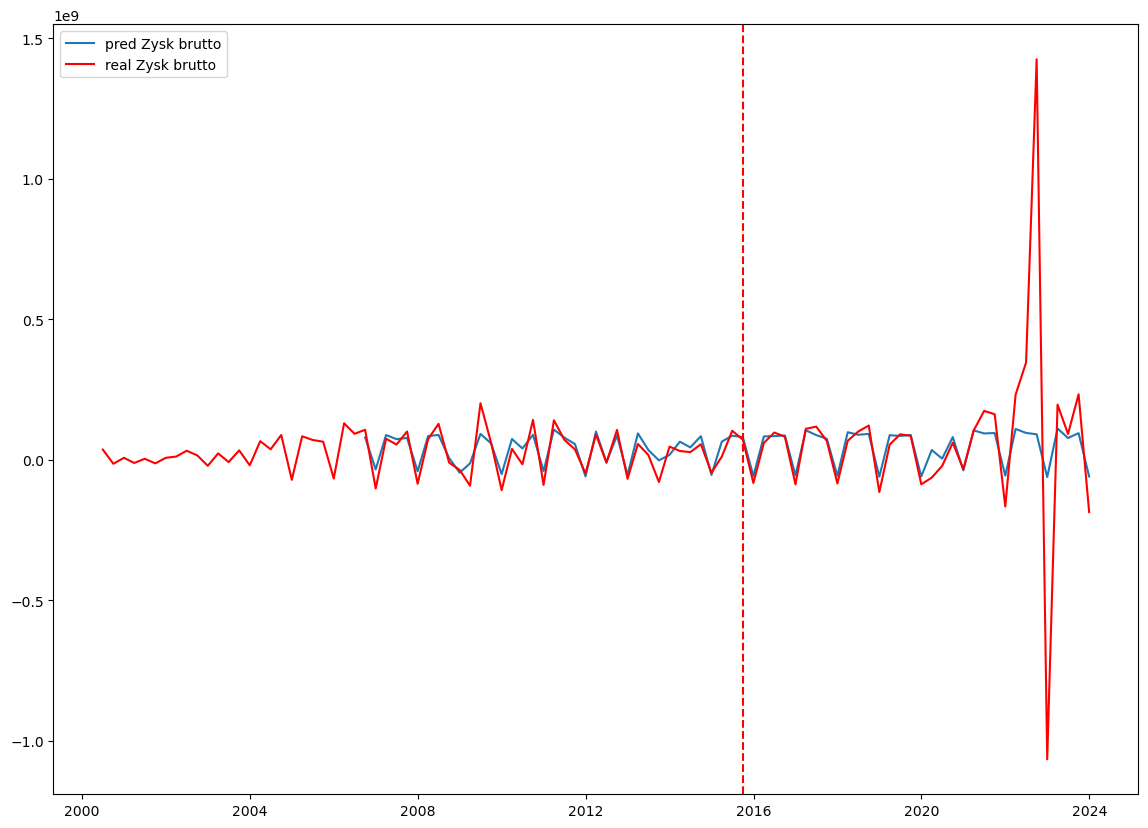

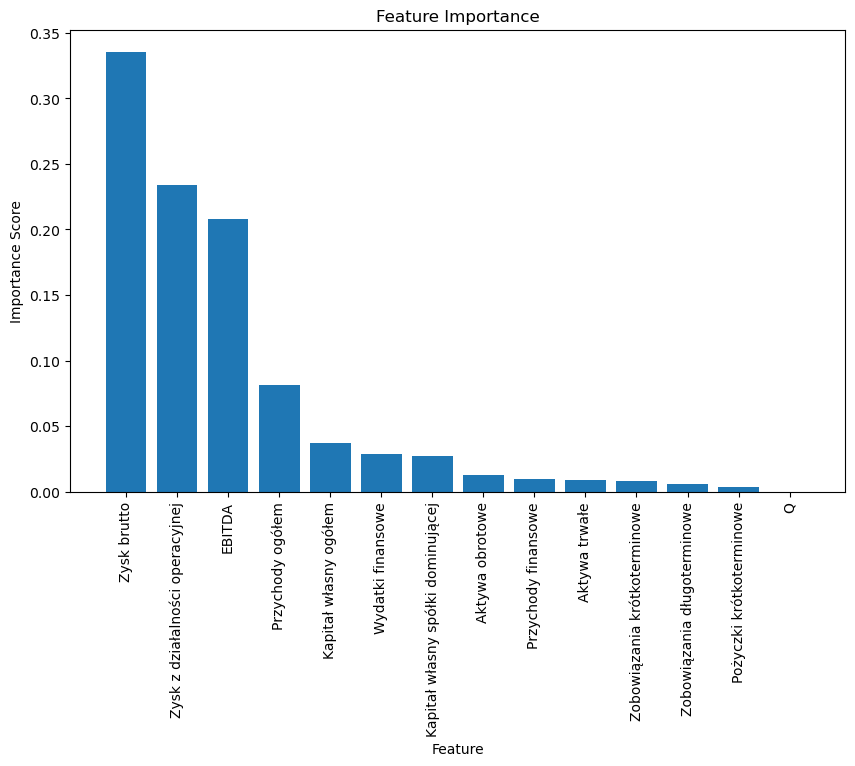

MAPE Aktywa trwałe:  859.52 %


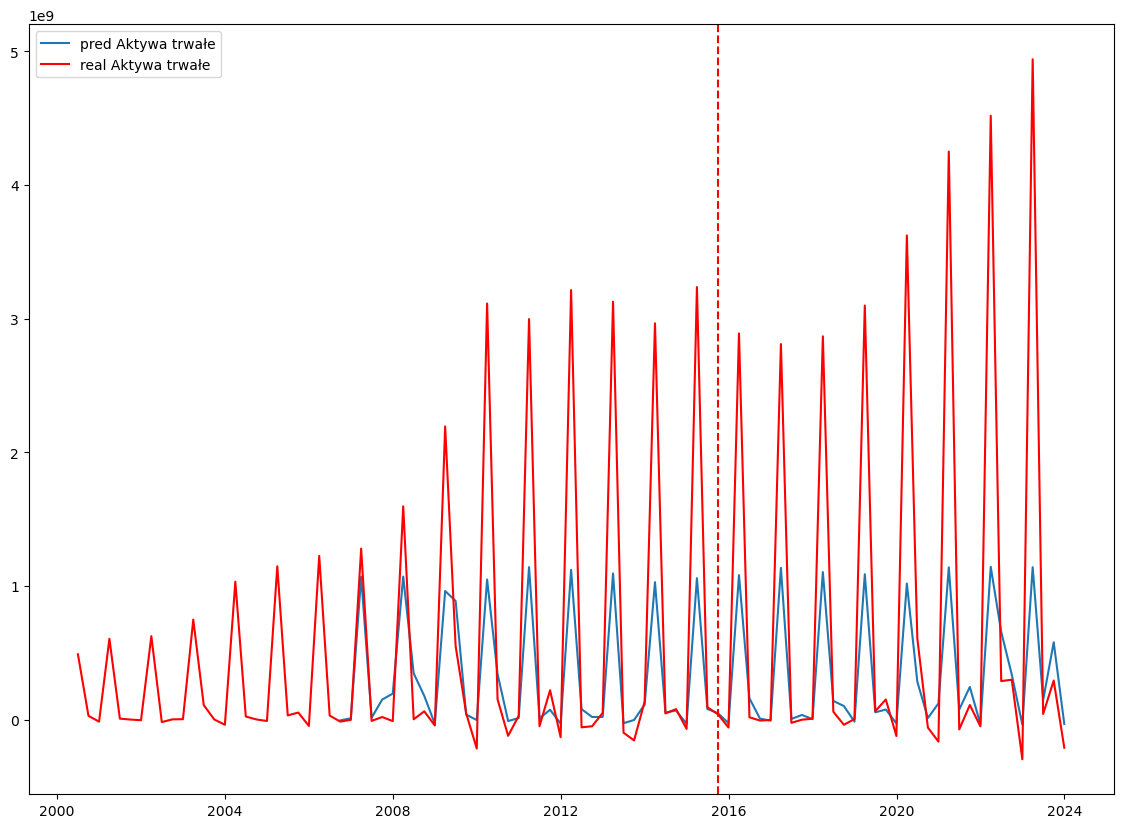

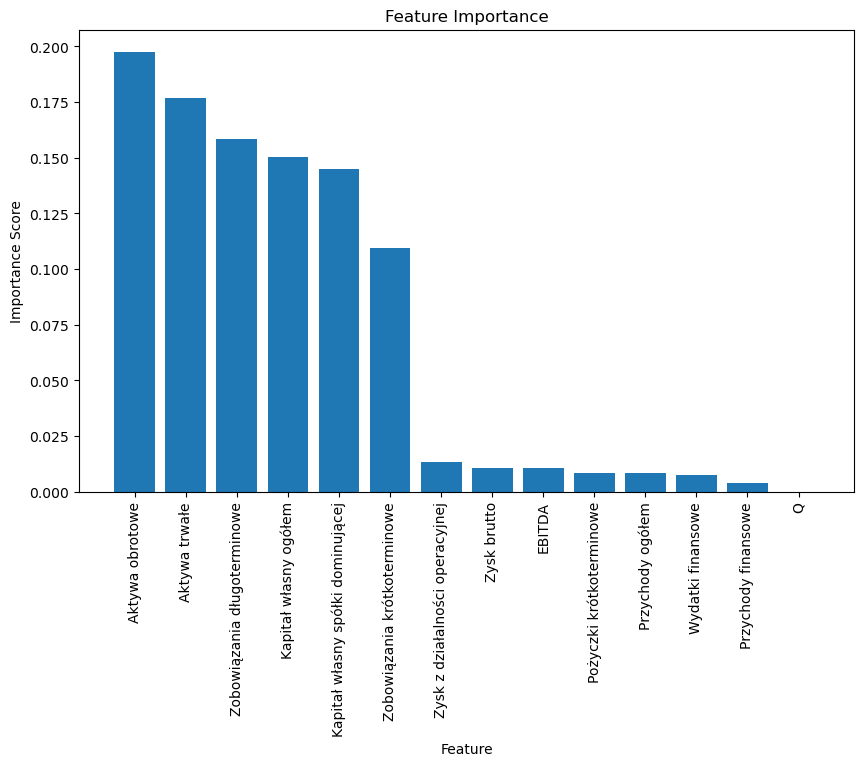

MAPE Aktywa obrotowe:  392.12 %


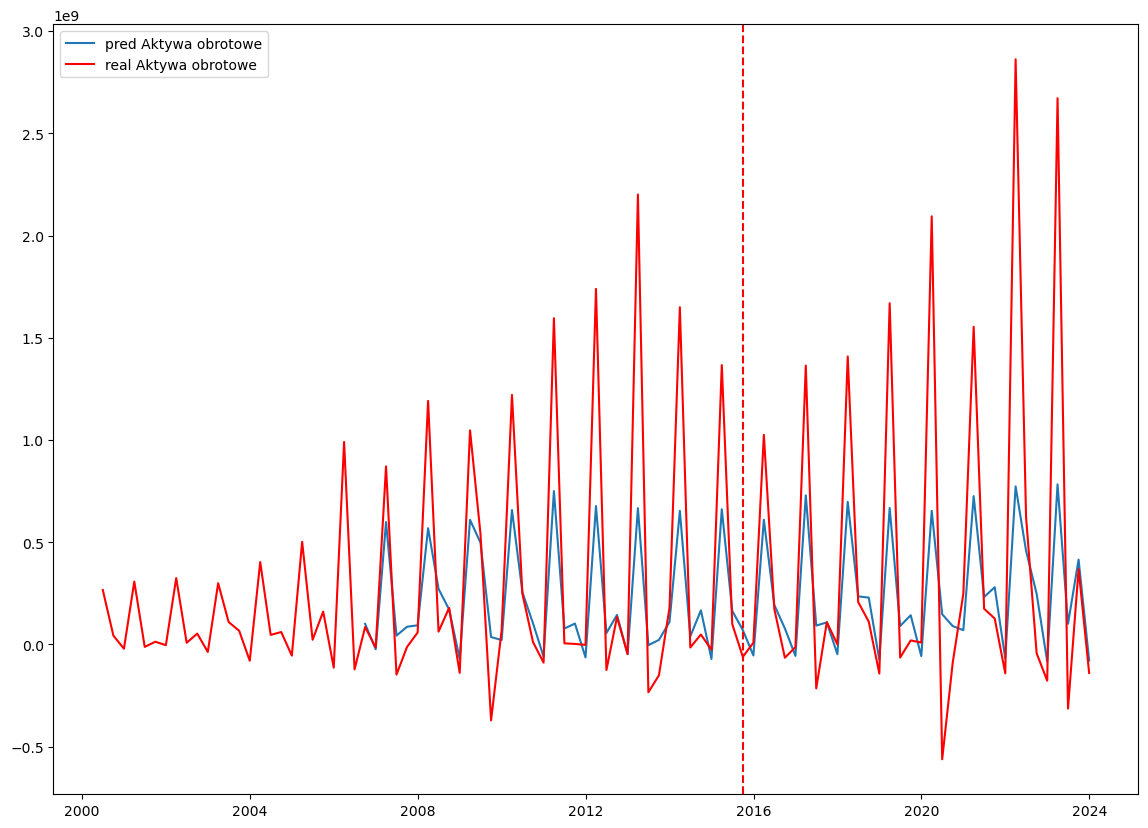

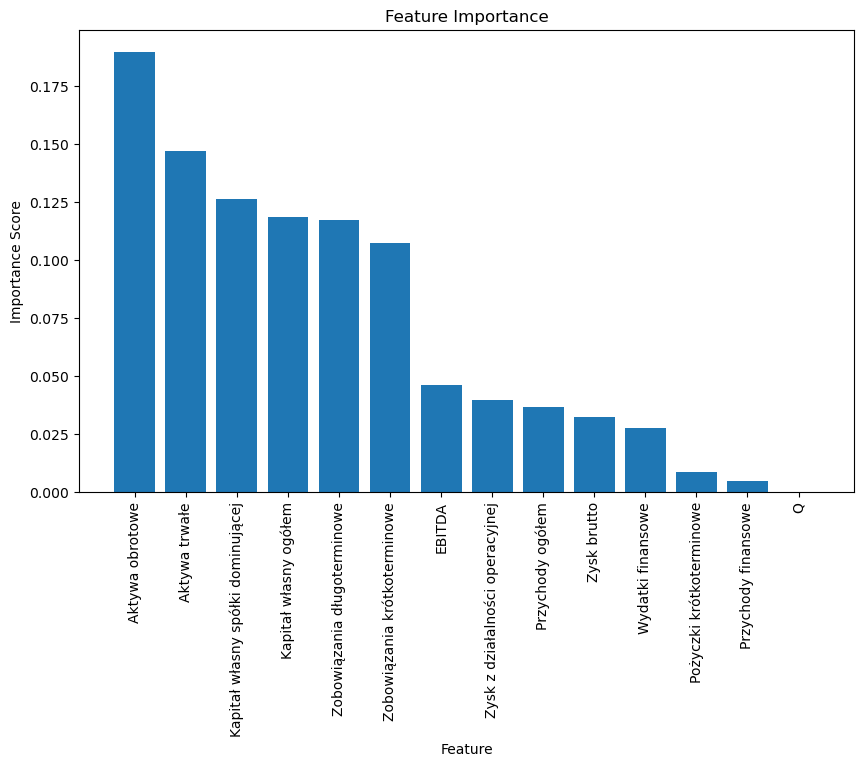

MAPE Kapitał własny ogółem:  216.51 %


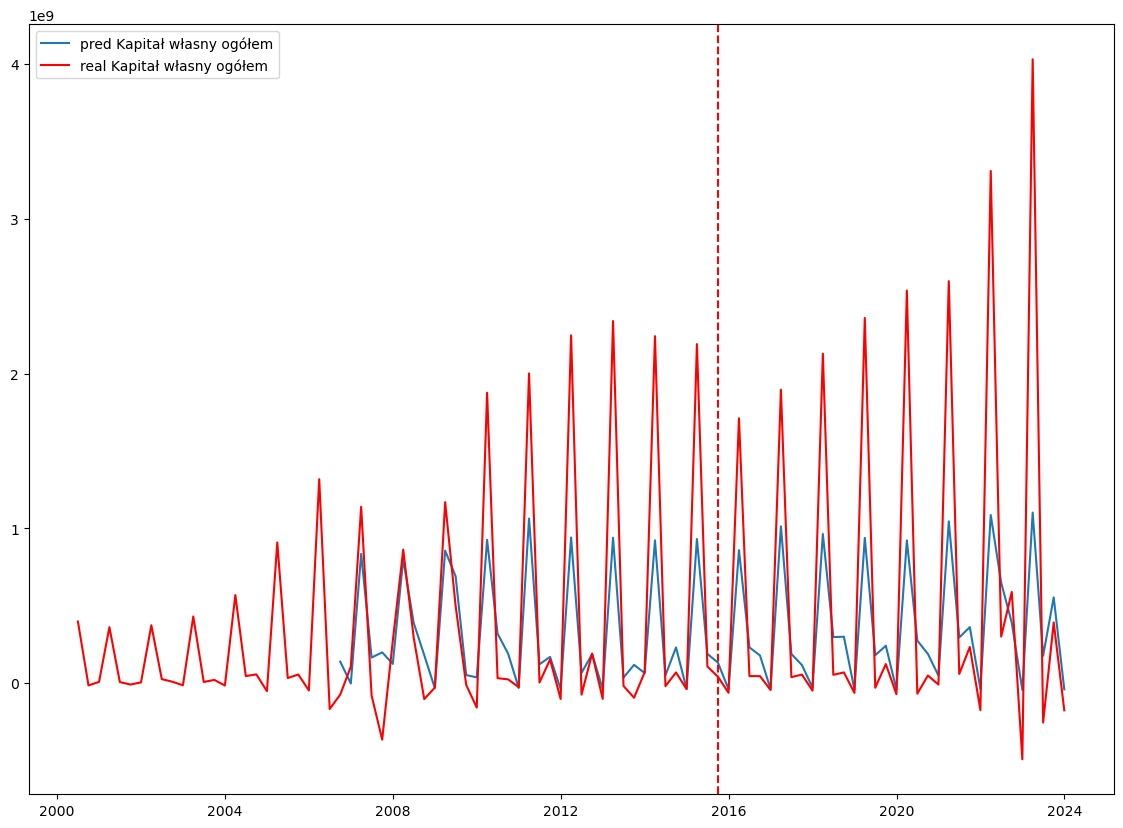

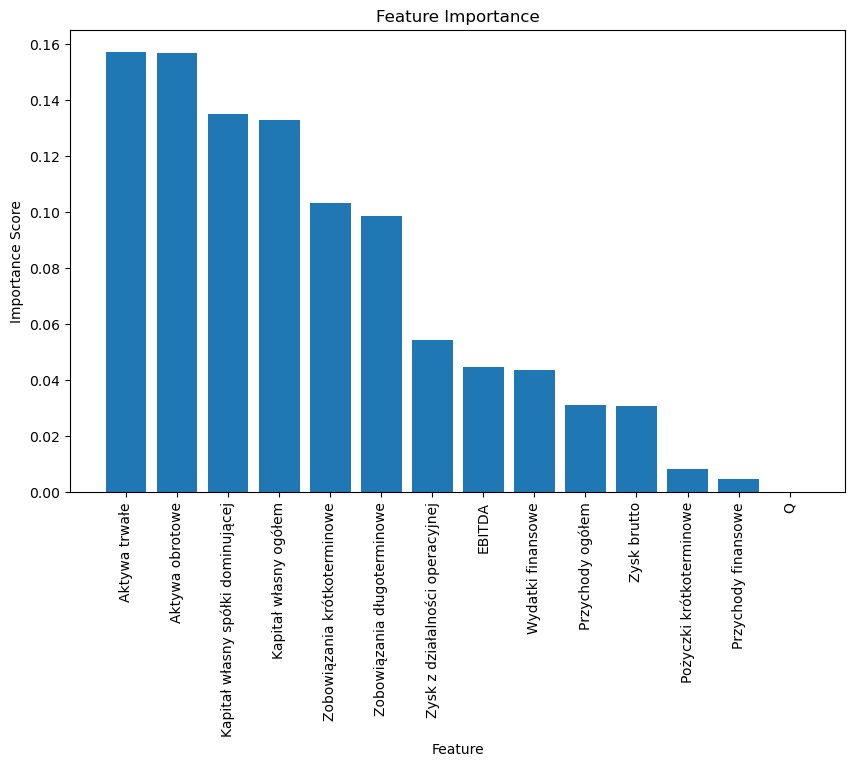

MAPE Kapitał własny spółki dominującej:  171.49 %


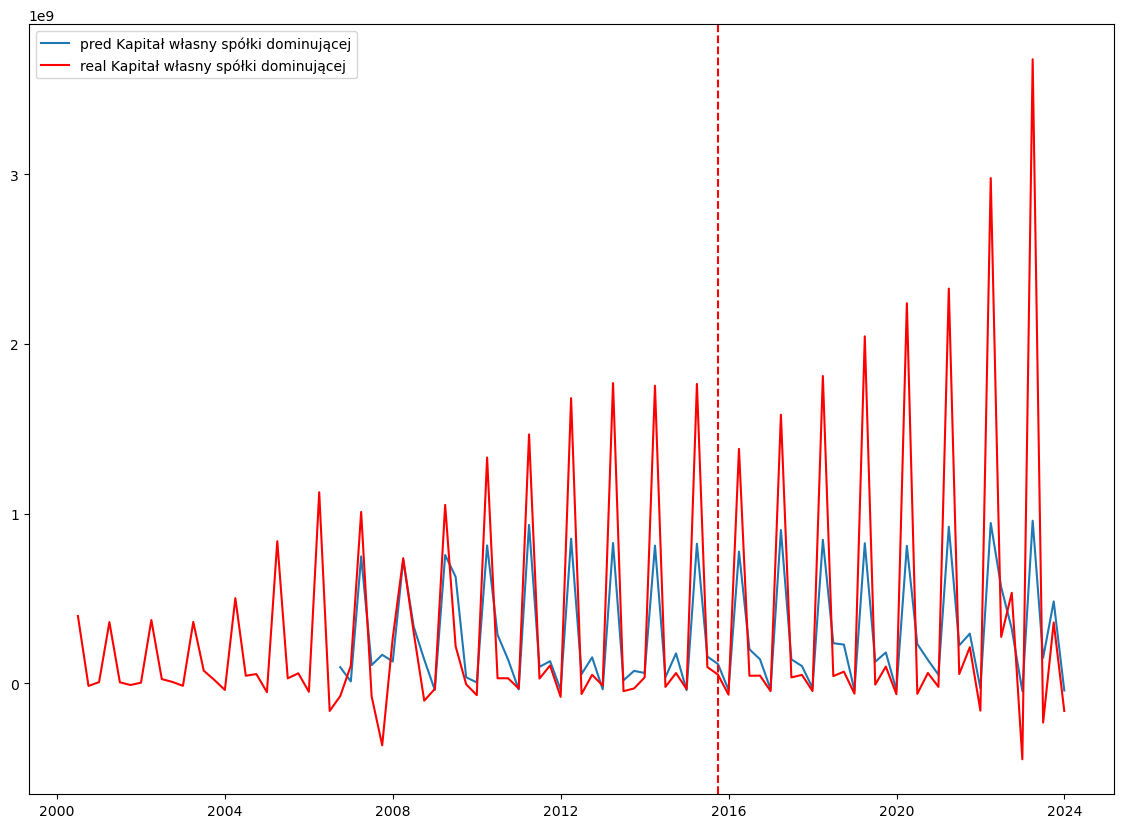

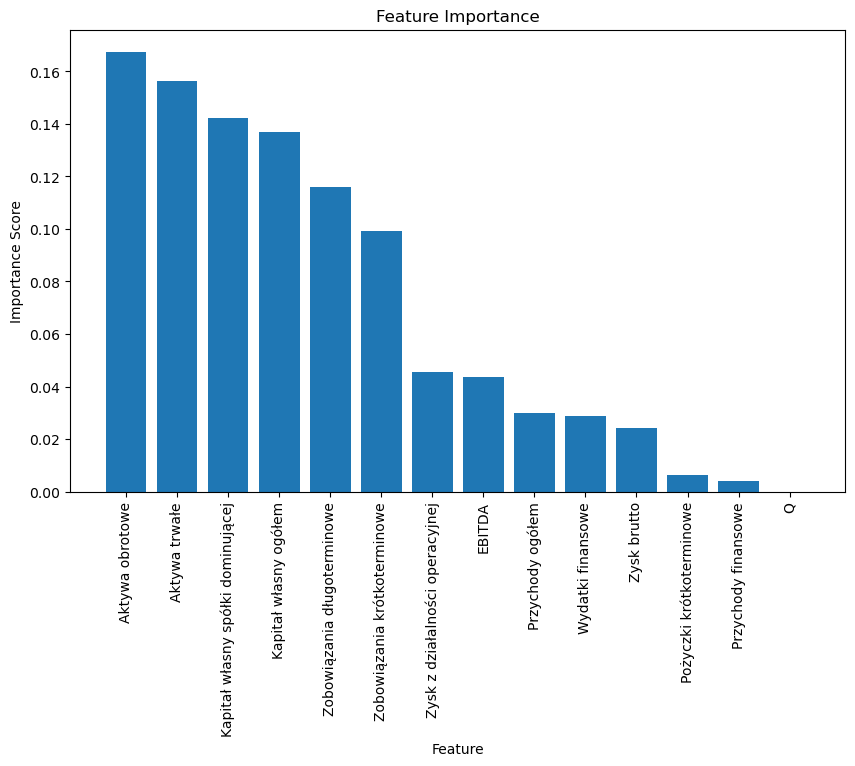

MAPE Zobowiązania długoterminowe:  87.59 %


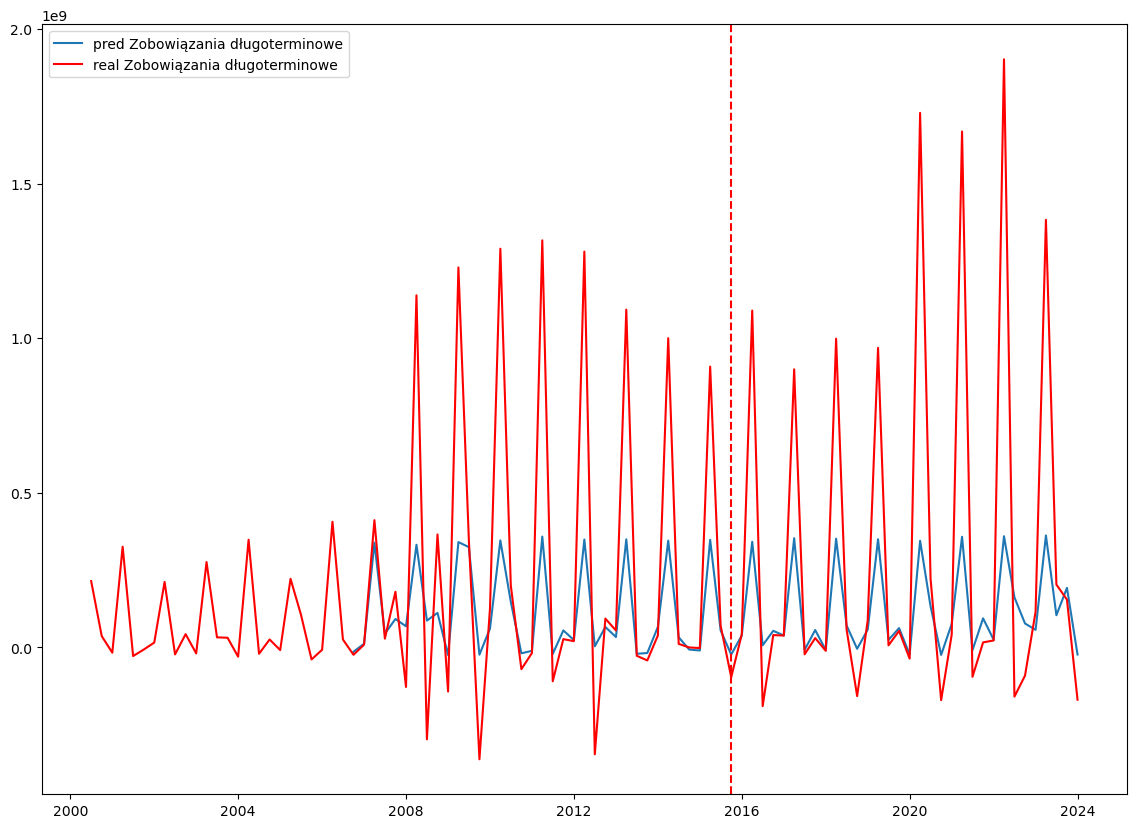

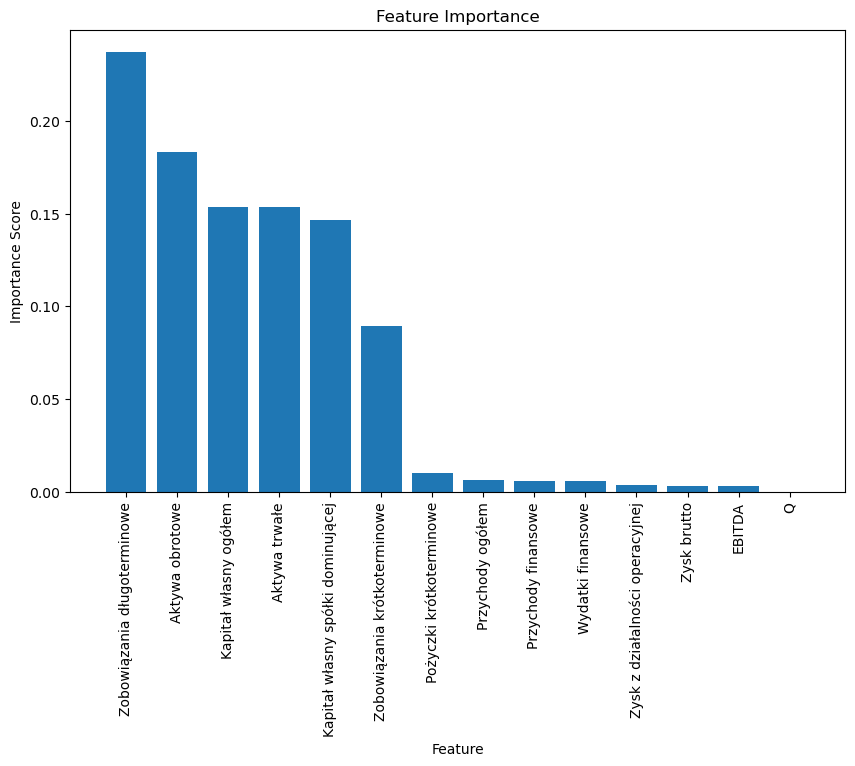

MAPE Zobowiązania krótkoterminowe:  99.45 %


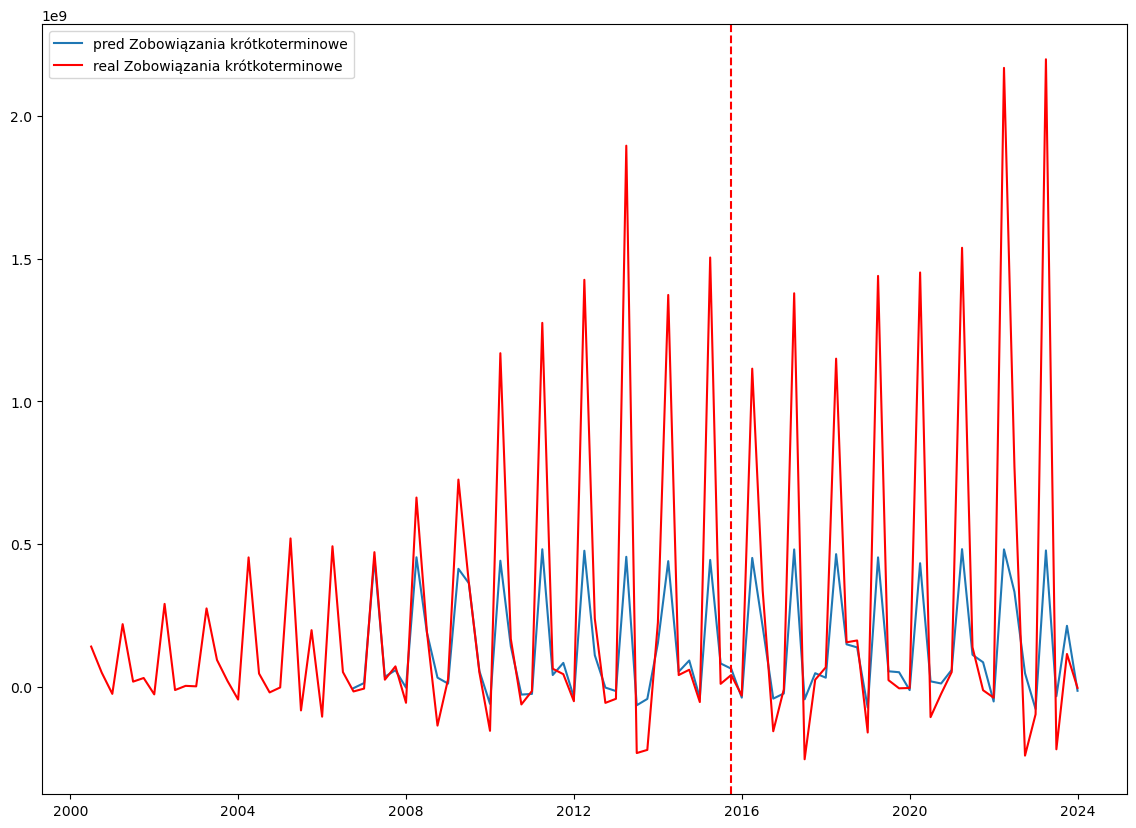

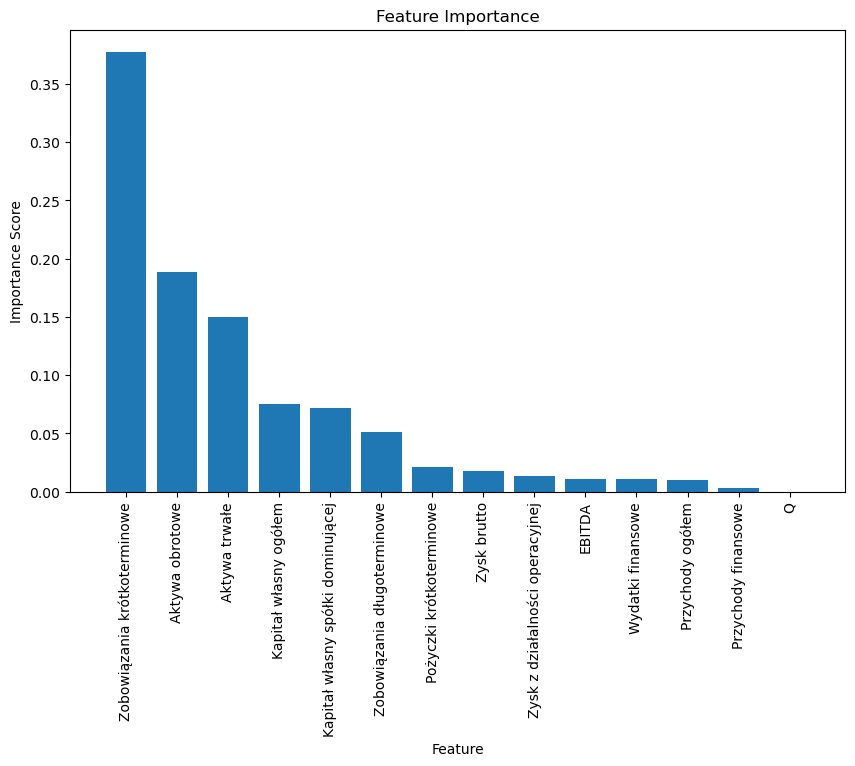

MAPE Pożyczki krótkoterminowe:  97.32 %


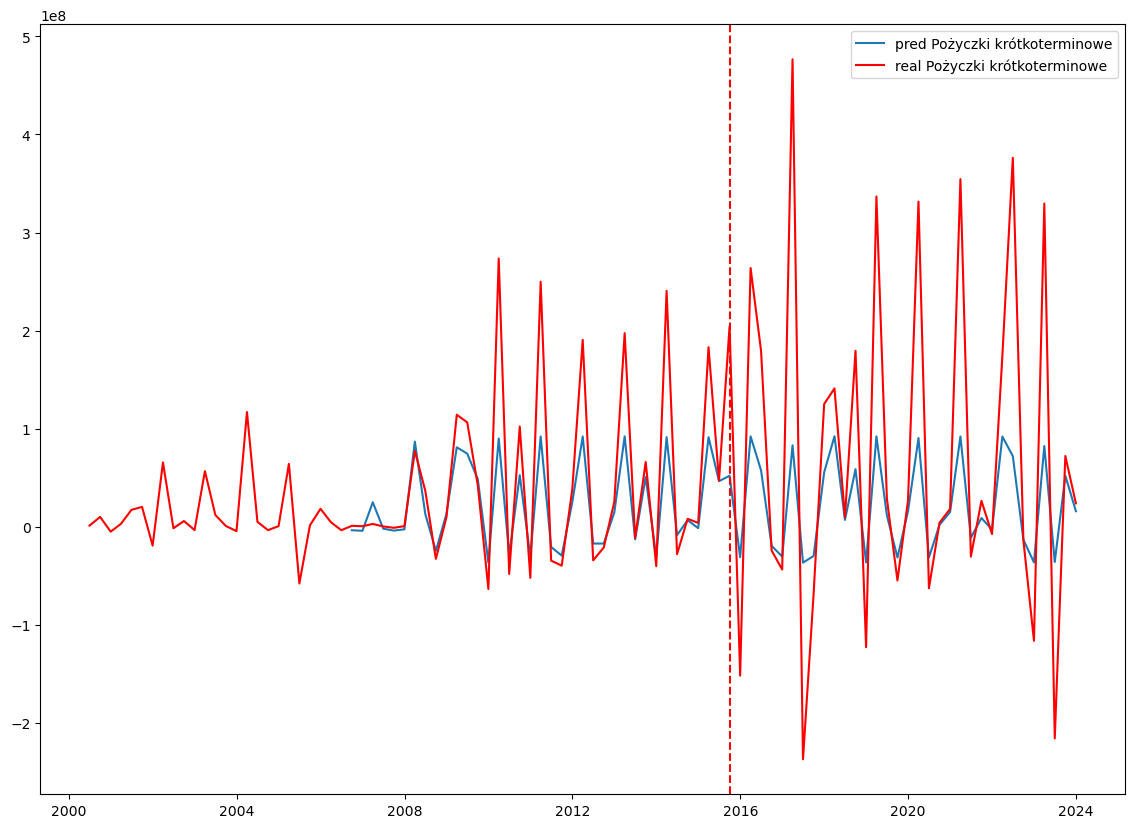

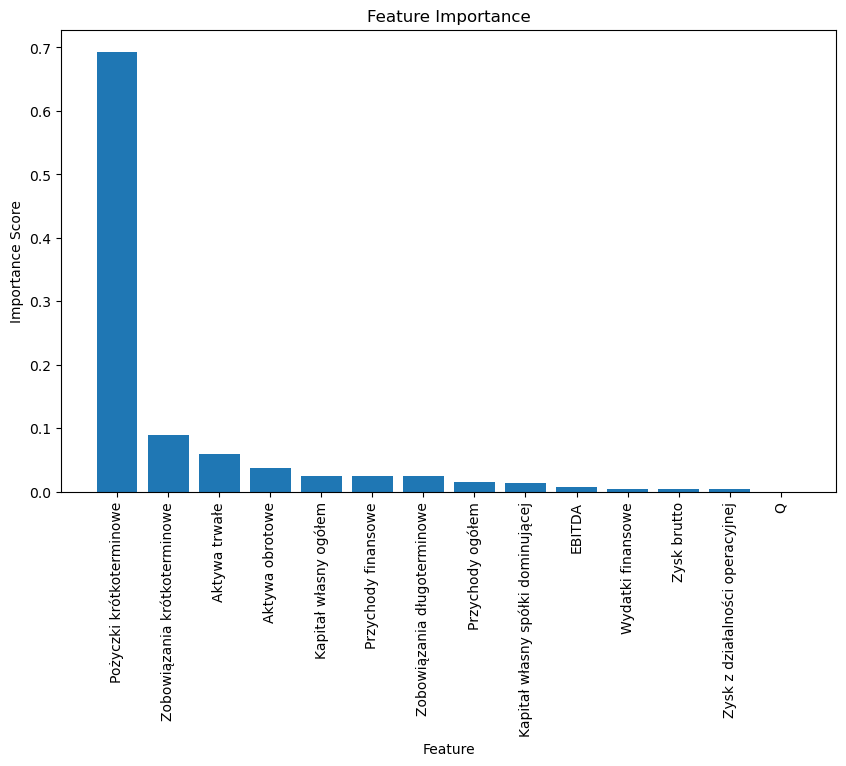

MAPE Q:  nan %


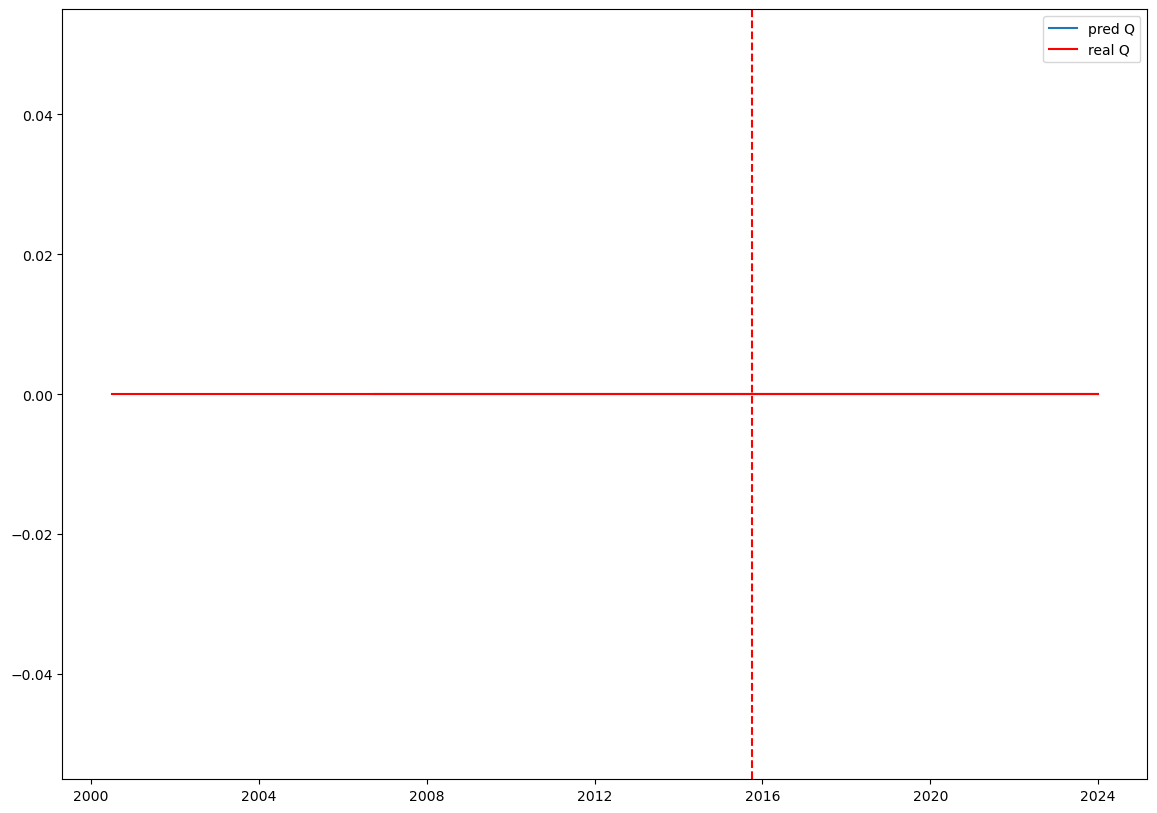

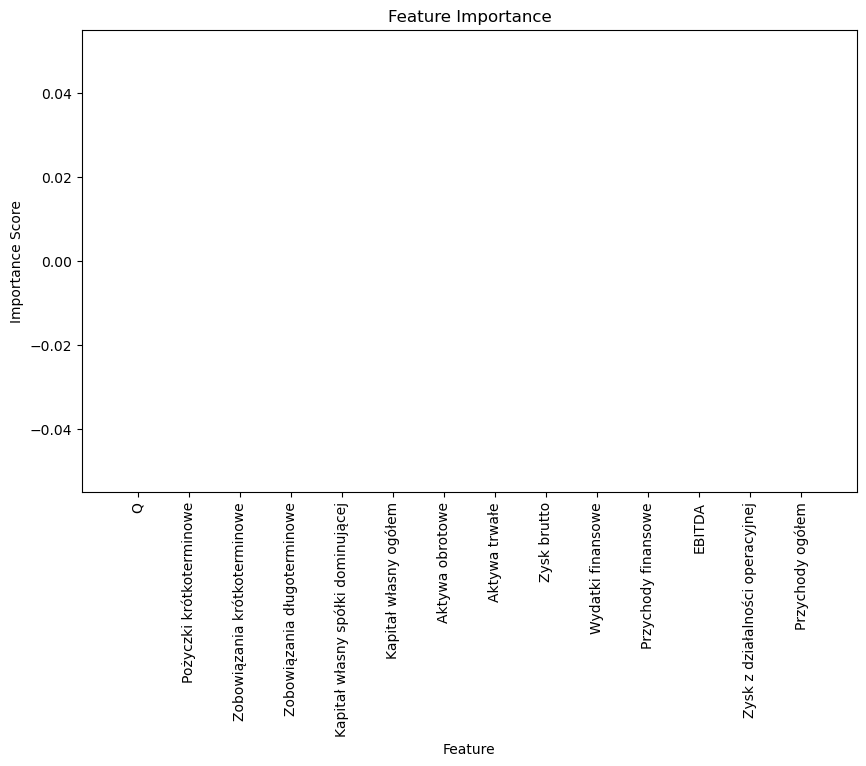

In [18]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime


#Po określeniu najlepszego lasu dopasowano go do danych oraz przedstawiono wyniki prognoz (błędy oraz wykresy porównawcze)

def mean_absolute_percentage_error(y_true, y_pred):
    """
    Oblicza średnią bezwzględną błędu procentowego (MAPE).

    Parametry:
    y_true : array-like
        Rzeczywiste wartości.
    y_pred : array-like
        Prognozowane wartości.

    Zwraca:
    mape : float
        Wartość MAPE.
    """

    df = pd.DataFrame(data={"y_true":y_true[0],"y_pred":y_pred[0]}, index=y_true.index)
    df_filtered = df[df['y_true'] != 0]
    y_true, y_pred = np.array(df_filtered['y_true']), np.array(df_filtered['y_pred'])
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

rf = RandomForestRegressor(n_estimators=1000, random_state=42)
best = list(random_forest_mol.columns)

for i in best:
    labels = np.array(random_forest_mol[f"{i}"])
        
    # Extracting features
    features = random_forest_mol
    features_np = np.array(features)
    
    
                                
    train_l = labels[:60]
    test_l = labels[61:]
        
    train_f = features_np[:60]
    test_f = features_np[61:]
    
    rf.fit(train_f, train_l)
    predictions = rf.predict(test_f)
    predictions = pd.DataFrame(predictions, index=features[60:].index)
    test_l = pd.DataFrame(test_l, random_forest_mol[f"{i}"][61:].index)
    f_list = list(features.columns)
    fig = plt.figure(figsize=(14,10))
    plt.plot(predictions, label=f"pred {i}")
    plt.plot(random_forest_mol[f"{i}"], c='r', label=f"real {i}")

    target_date = '2015-09-30'
    target_x = datetime.strptime(target_date, '%Y-%m-%d')


    plt.axvline(x=target_x, color='r', linestyle='--')
    plt.legend()
    
    mape = mean_absolute_percentage_error(test_l[:-1], predictions[:-1])

    print(f"MAPE {i}: ", round(mape,2),"%")

    feature_importances = rf.feature_importances_

    import matplotlib.pyplot as plt
    
    sorted_indices = np.argsort(feature_importances)[::-1]
    sorted_feature_importances = feature_importances[sorted_indices]
    sorted_feature_names = np.array(f_list)[sorted_indices]
    
    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
    plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance Score')
    plt.title('Feature Importance')
    plt.show()


#Patrząc na błędy oraz dopasowanie modelu można stwierdzić, że osiąga on wyniki podobne do modelu SARIMAX, a w niektórych przypadkach anwet lepsze.
#Może to być znak, że jest do dobry model do tworzenia prognoz dla tych danych

#Na wykresie istotności zmiennych można zaobserwować, które zmienne w modelu wniosły najwięcej informacji. 
#W większości przypadakch będzie to historyczna wartość prognozowanej zmiennej, ale pokazują się także inne.

In [54]:
columns_to_drop = list(random_forest_mol.columns)
for i in columns_to_drop:
    if i.endswith("_"):
        random_forest_mol = random_forest_mol.drop(columns=i)

Best Parameters Przychody ogółem: {'colsample_bytree': 0.8, 'eta': 0.2, 'lambda': 5, 'max_depth': 5, 'subsample': 0.5}
Best MSE Przychody ogółem: 138830688.51522583


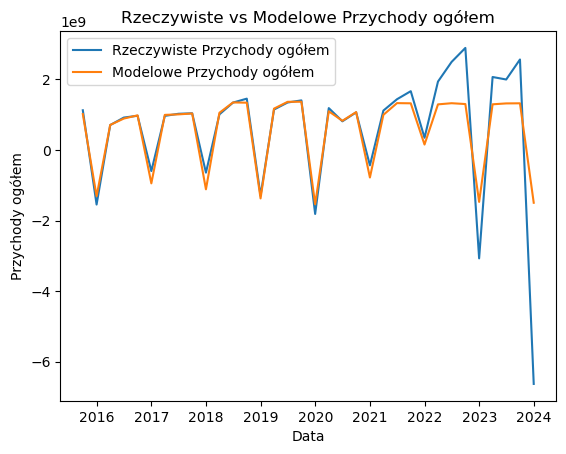

Best Parameters Zysk z działalności operacyjnej: {'colsample_bytree': 1.0, 'eta': 0.2, 'lambda': 0, 'max_depth': 3, 'subsample': 0.8}
Best MSE Zysk z działalności operacyjnej: 11538817.975926384


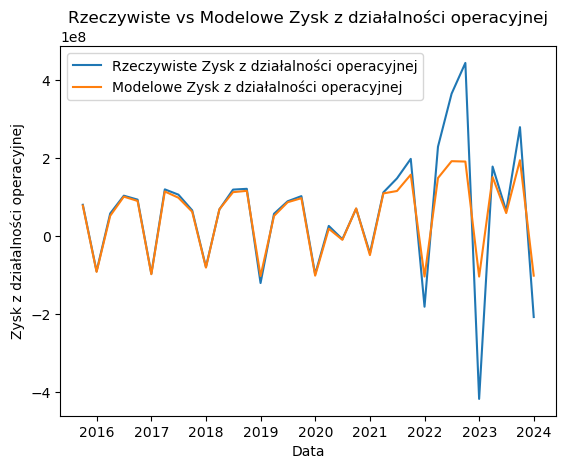

In [ ]:
#eXtreme Gradient Boost

#Wydzielono dane na zbiory testowe i treningowe, oraz na etykiety i cechy tak jak w modelu Lasów Losowych
#W nastepnym kroku zastosowano metode krzyzowej walidacji, aby ustalić dla jakich parametrów model ma najlepsze dopasowanie
#za parametr oceny wybrano ujemny pierwiastek ze średniego błędu kwadratowego


import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

random_forest_mol = random_forest_mol.drop(columns=["Rok", "Q"], axis=1)
for i in list(random_forest_mol.columns):
    labels = random_forest_mol[f"{i}"]
        
    features = random_forest_mol
    train_l = labels[:60]
    test_l = labels[61:]
        
    train_f = features[:60]
    test_f = features[61:]
        
    
    dtrain = xgb.DMatrix(train_f, label=train_l.to_numpy().reshape(-1,1))
    dtest = xgb.DMatrix(test_f, label=test_l.to_numpy().reshape(-1,1))
    
    param_grid = {
        'max_depth': [3,4,5,6,7,8,9,10],
        'eta': [0.01, 0.2],
        'subsample': [0.5,0.6,0.7,0.8,],
        'colsample_bytree': [0.8, 1.0],
        'lambda' : [0, 1, 3, 5]
    }
    
    xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')
    
    grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)
    grid_search.fit(train_f, train_l)
    
    best_params = grid_search.best_params_
    
    print(f"Best Parameters {i}:", grid_search.best_params_)
    print(f"Best MSE {i}:", -grid_search.best_score_)

    num_rounds = 100
    model = xgb.train(best_params, dtrain, num_rounds)


    predictions_train = model.predict(dtrain)
    forecast_train = pd.DataFrame(predictions_train, columns=[f"{i}"])
    forecast_train.index = features[:60].index
    
    predictions_test = model.predict(dtest)
    forecast_test = pd.DataFrame(predictions_test, columns=[f"{i}"])
    forecast_test.index = features[61:].index

    actual_values = labels[61:]

    plt.plot(actual_values, label=f'Rzeczywiste {i}')
    plt.plot(forecast_test, label=f'Modelowe {i}')
        
    plt.xlabel('Data')
    plt.ylabel(f'{i}')
    plt.title(f'Rzeczywiste vs Modelowe {i}')
    plt.legend()
        
    plt.show()

#Uzyskano onformacje o dopasowaniu modelu, jego błędach oraz modelu, który okazał się najlepszy.
#Podobnie jak w modelu Lasów Losowych doapsowania są dobre, a większośc zależności została wyjaśniona.
#Dobre dopasowanie tych dwóch modeli może świadczyć, że badane dane dobrze się modelują z wykorzystaniem modeli opartych na drzewach decyzyjnych.



Przychody ogółem
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 186737361189601280.0000 - mae: 376599648.0000 - val_loss: 2219765404971040768.0000 - val_mae: 1279076608.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 170342319969533952.0000 - mae: 361566976.0000 - val_loss: 2089144523102879744.0000 - val_mae: 1233212800.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 155034695749337088.0000 - mae: 346623968.0000 - val_loss: 1968354649576570880.0000 - val_mae: 1187442944.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 140780944834428928.0000 - mae: 331752480.0000 - val_loss: 1857269477993873408.0000 - val_mae: 1141815808.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 127613399738613760.0000 - mae: 316970976.0000 - val_loss: 1756069878017556480.0000 - val_mae: 1096529664.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 115570947095789568.0000 - mae: 302363424.0000 - val_loss: 1664654969455771648.0000 - val_mae

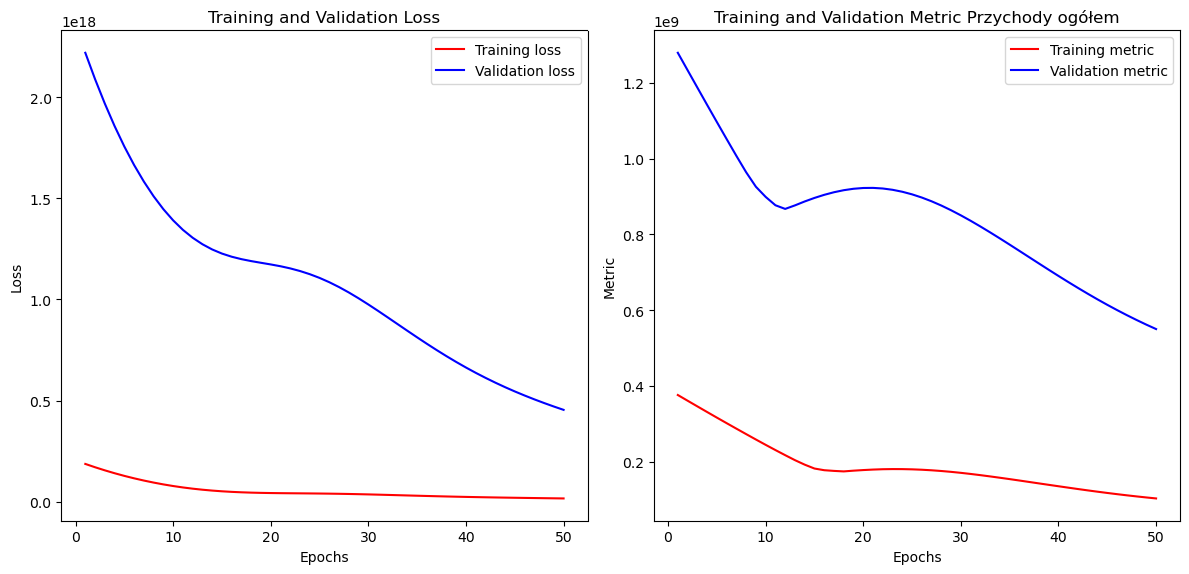

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 15487021782925312.0000 - mae: 101413192.0000
Test accuracy: 101413192.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


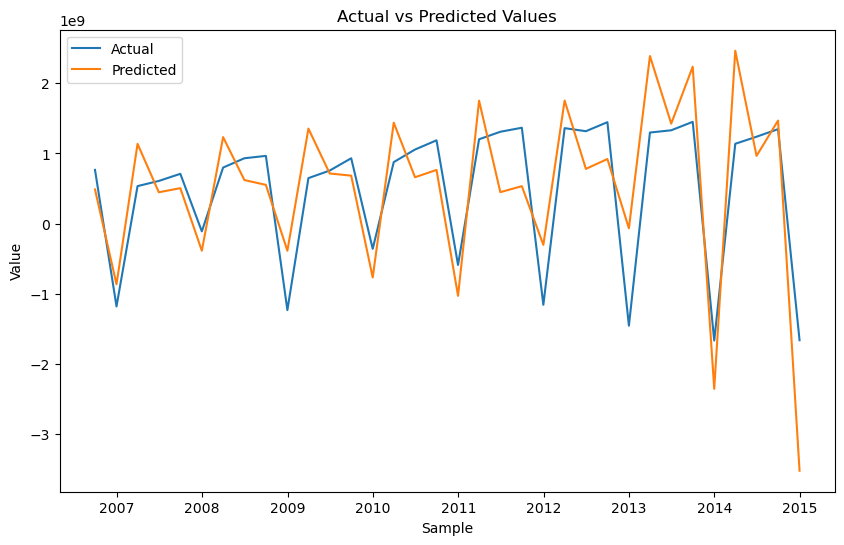

MAPE Przychody ogółem:  135.32 %
Zysk z działalności operacyjnej
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 8894357042102272.0000 - mae: 76790336.0000 - val_loss: 67313733940019200.0000 - val_mae: 211765696.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 5140611459973120.0000 - mae: 59003500.0000 - val_loss: 52171676414115840.0000 - val_mae: 179043856.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 3028814426800128.0000 - mae: 45117116.0000 - val_loss: 49731937421492224.0000 - val_mae: 182407024.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 2348861511172096.0000 - mae: 38791636.0000 - val_loss: 54942746363822080.0000 - val_mae: 198086800.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 2605195359944704.0000 - mae: 38338092.0000 - val_loss: 60552463278669824.0000 - val_mae: 205524080.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 3090571761549312.0000 - mae: 41559328.0000 - val_loss: 61757678346567680.00

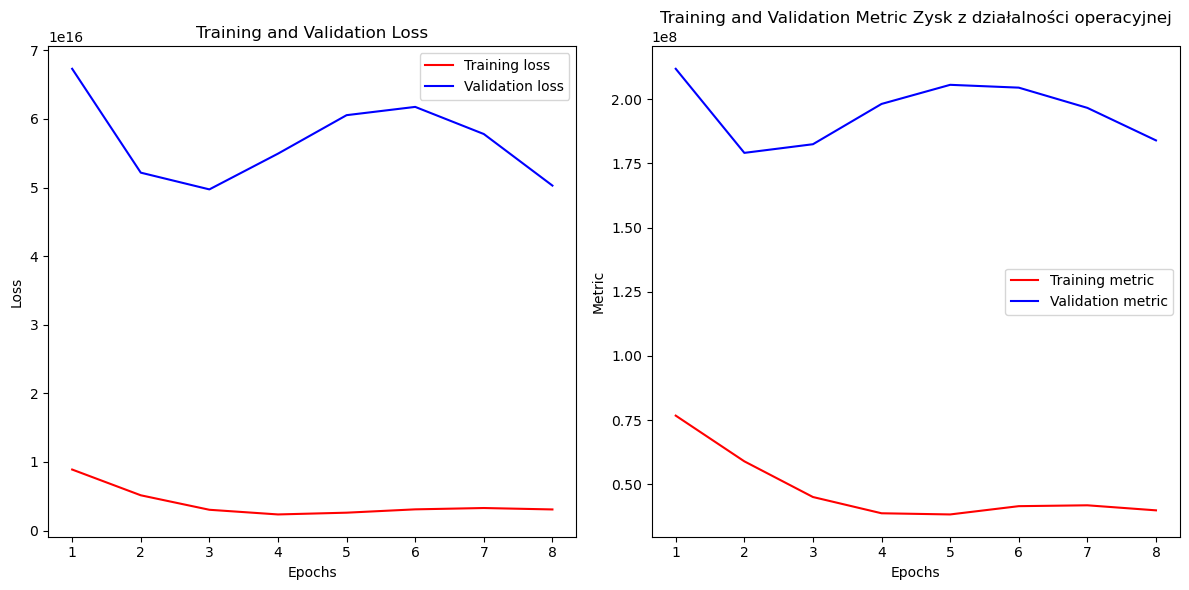

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2348861511172096.0000 - mae: 38791636.0000
Test accuracy: 38791636.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


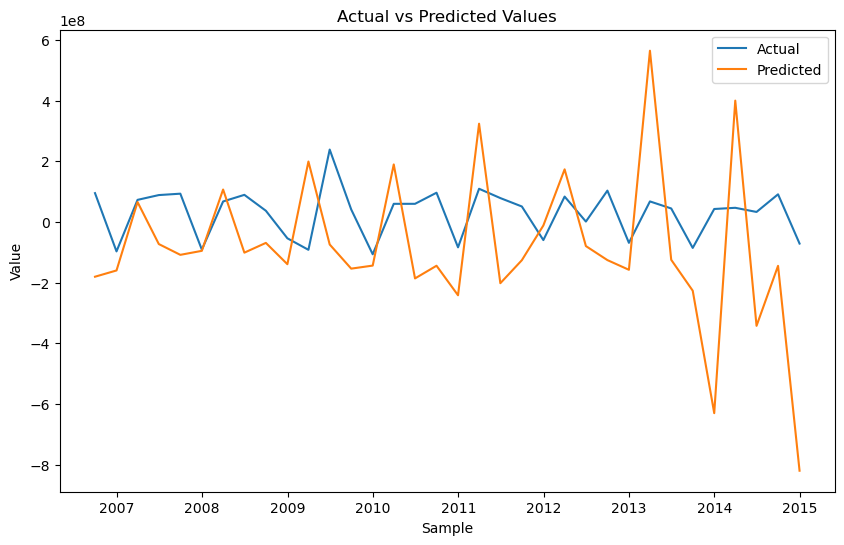

MAPE Zysk z działalności operacyjnej:  814.73 %
EBITDA
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1411597775929344.0000 - mae: 29977574.0000 - val_loss: 53042399429001216.0000 - val_mae: 165887360.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 1519859674382336.0000 - mae: 33796172.0000 - val_loss: 45341651916292096.0000 - val_mae: 144656592.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 1147846250201088.0000 - mae: 28347950.0000 - val_loss: 40282451024543744.0000 - val_mae: 133904600.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 1049956630659072.0000 - mae: 25813424.0000 - val_loss: 36692798962925568.0000 - val_mae: 129780472.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 1027334702366720.0000 - mae: 25002104.0000 - val_loss: 32625935232532480.0000 - val_mae: 122456456.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 869589076410368.0000 - mae: 23173520.0000 - val_loss: 28987056403251200.0000 - val_ma

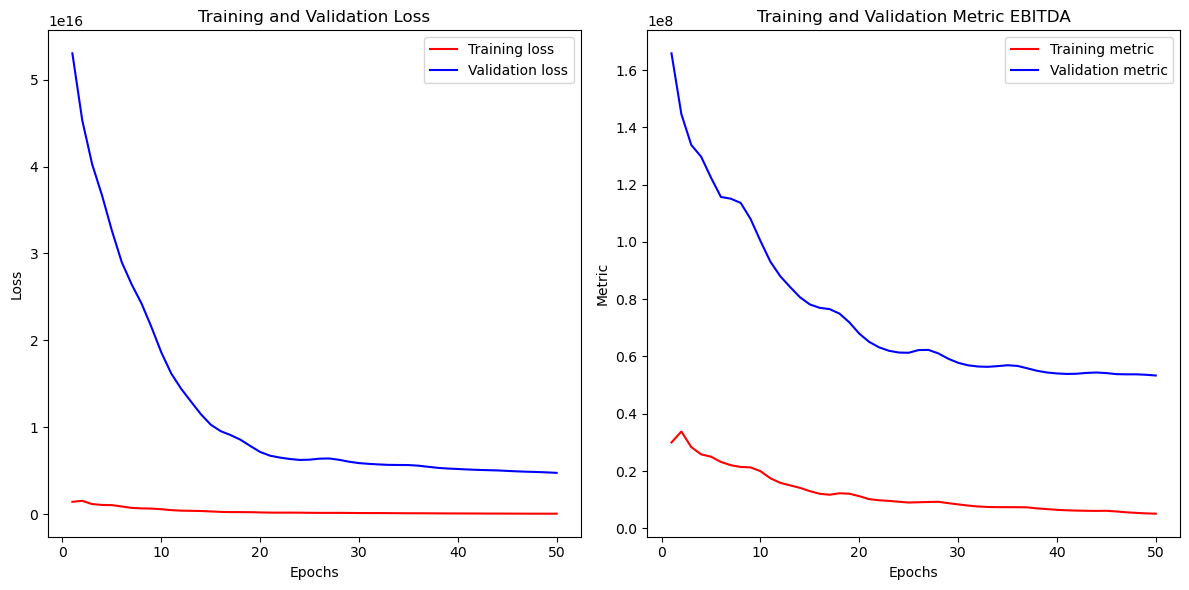

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 37307243560960.0000 - mae: 5008962.5000
Test accuracy: 5008962.5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


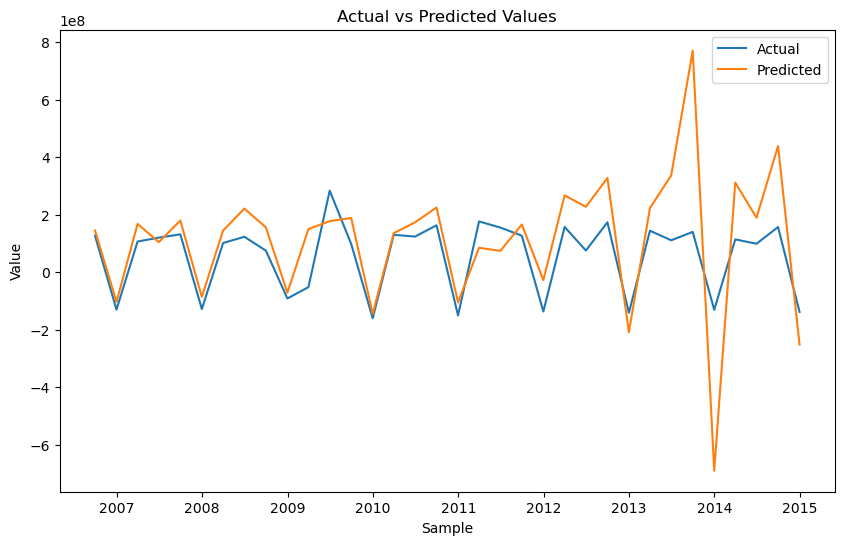

MAPE EBITDA:  162.37 %
Przychody finansowe
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1675590625132544.0000 - mae: 27767450.0000 - val_loss: 27338596415438848.0000 - val_mae: 95457424.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 711843182018560.0000 - mae: 20003230.0000 - val_loss: 27196276231634944.0000 - val_mae: 94080112.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 513637521293312.0000 - mae: 19568534.0000 - val_loss: 28715522128347136.0000 - val_mae: 105922008.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 647198018633728.0000 - mae: 21964354.0000 - val_loss: 28142137551880192.0000 - val_mae: 106195664.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 675015783612416.0000 - mae: 22331618.0000 - val_loss: 25145611883905024.0000 - val_mae: 97488696.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 523303378747392.0000 - mae: 19486390.0000 - val_loss: 21166167917854720.0000 - val_mae: 83426776.0000
Ep

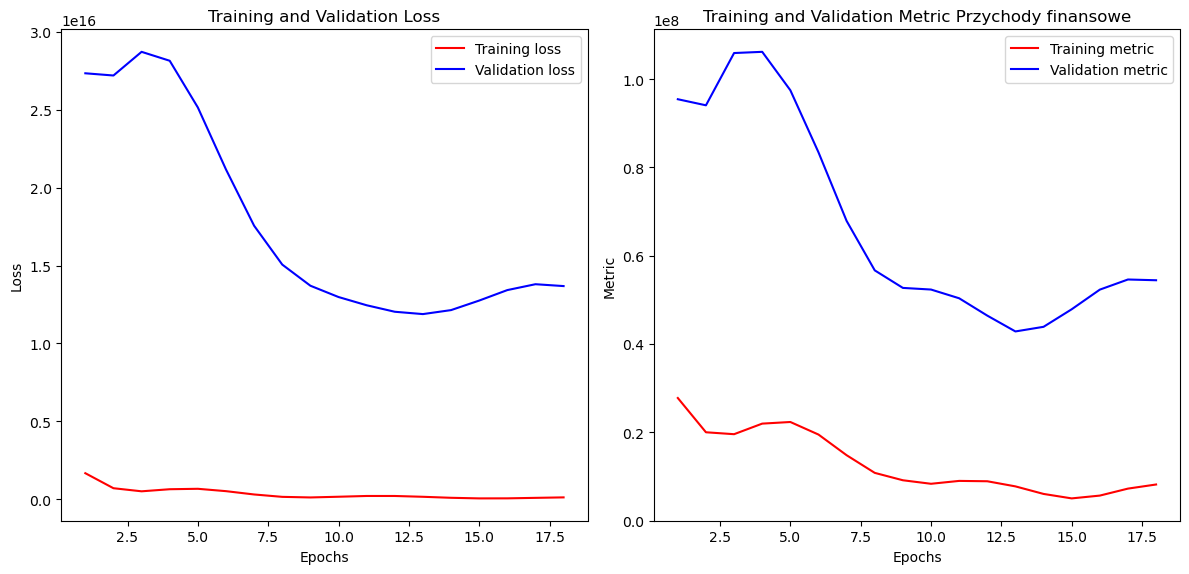

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 97498047709184.0000 - mae: 6035102.5000
Test accuracy: 6035102.5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


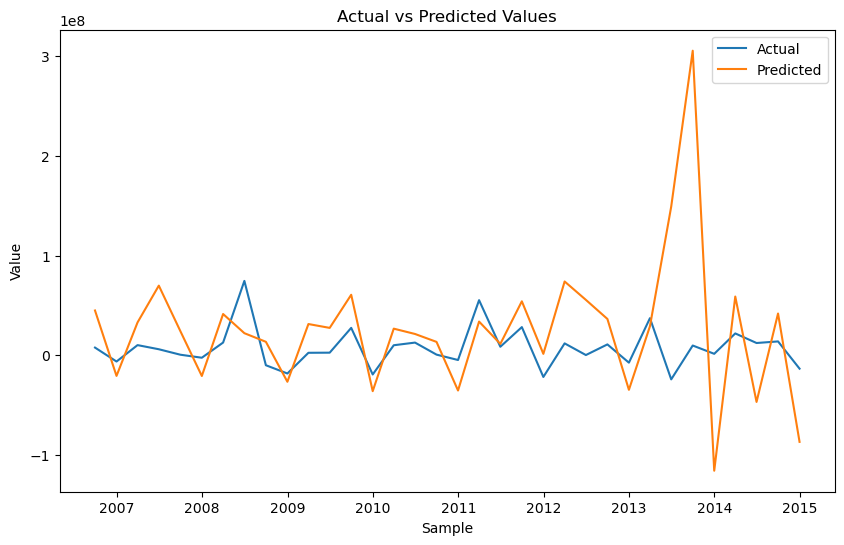

MAPE Przychody finansowe:  1599.76 %
Wydatki finansowe
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 6526617270616064.0000 - mae: 56257568.0000 - val_loss: 61537372294086656.0000 - val_mae: 168377168.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 3660853761015808.0000 - mae: 42256008.0000 - val_loss: 40029026479243264.0000 - val_mae: 129126184.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 1670098569920512.0000 - mae: 28545624.0000 - val_loss: 26382944717242368.0000 - val_mae: 98977504.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 528260307877888.0000 - mae: 16653925.0000 - val_loss: 19756860299018240.0000 - val_mae: 80874976.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 131250778013696.0000 - mae: 9242491.0000 - val_loss: 18407465326477312.0000 - val_mae: 88971448.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 303775554207744.0000 - mae: 13385883.0000 - val_loss: 19784869928239104.0000 - val_mae: 102

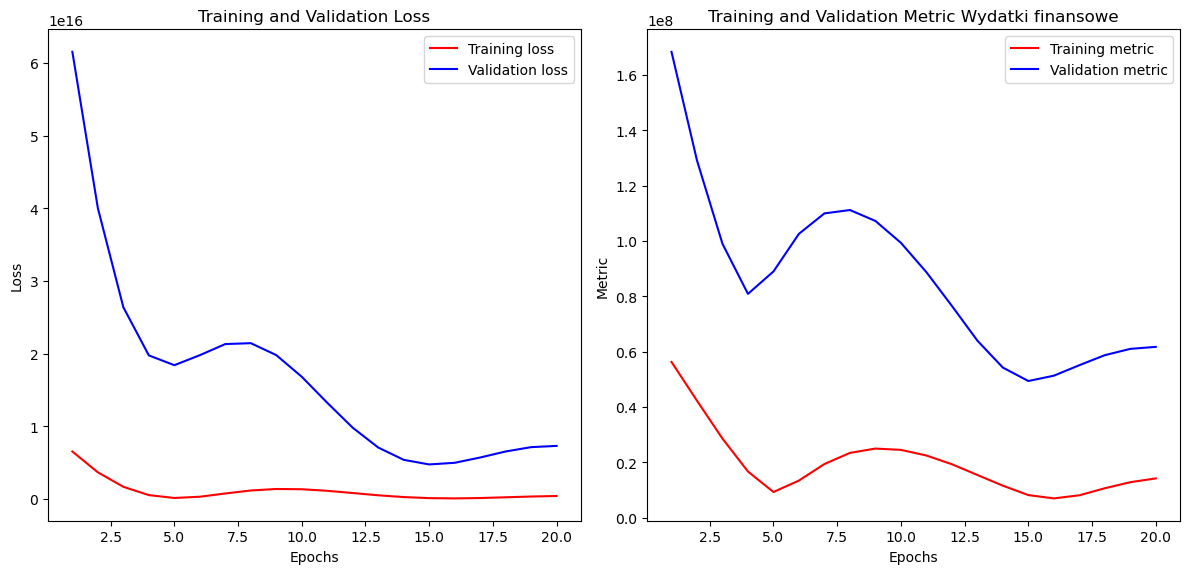

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 74407187841024.0000 - mae: 6935777.5000
Test accuracy: 6935777.5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


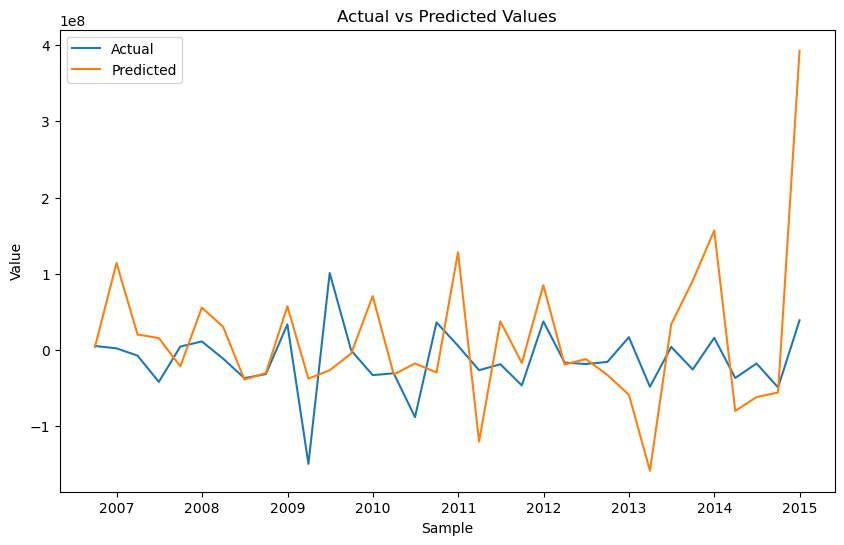

MAPE Wydatki finansowe:  631.78 %
Zysk brutto
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1219329269956608.0000 - mae: 28847882.0000 - val_loss: 33681273121669120.0000 - val_mae: 100501960.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 777030786351104.0000 - mae: 23178602.0000 - val_loss: 31321983161466880.0000 - val_mae: 94574768.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 722267268972544.0000 - mae: 22331738.0000 - val_loss: 29086854263341056.0000 - val_mae: 89591864.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 684467932889088.0000 - mae: 22035222.0000 - val_loss: 26146794530406400.0000 - val_mae: 81937928.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 559600650682368.0000 - mae: 19883490.0000 - val_loss: 23253193458712576.0000 - val_mae: 76024160.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 434971370061824.0000 - mae: 16959758.0000 - val_loss: 21092174221279232.0000 - val_mae: 73275096.0000


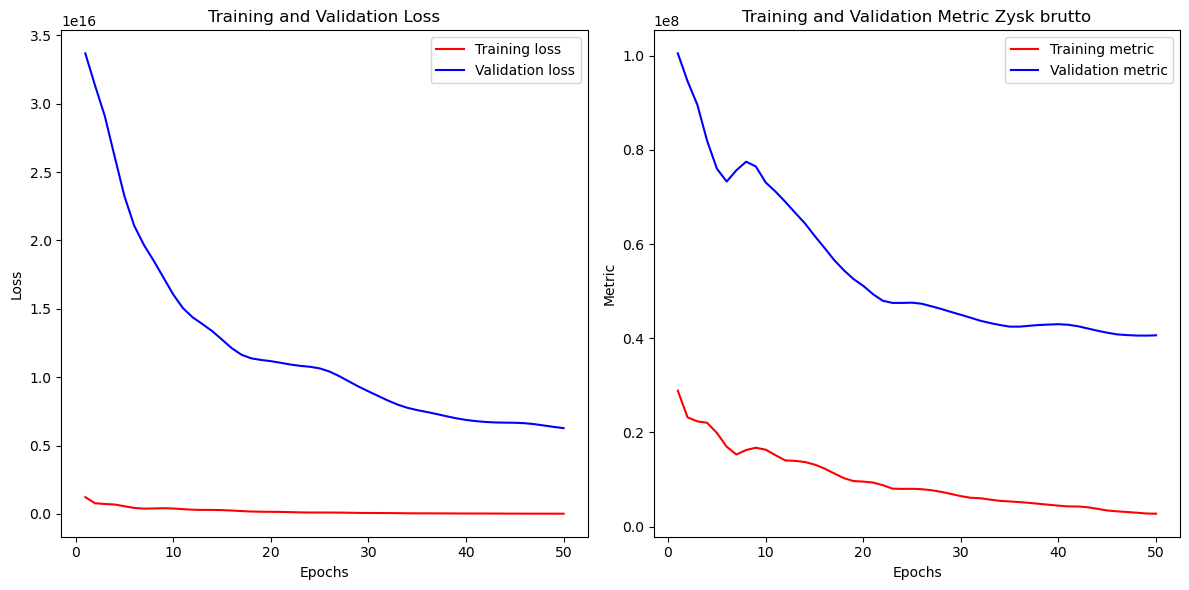

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 12169026469888.0000 - mae: 2739074.0000
Test accuracy: 2739074.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


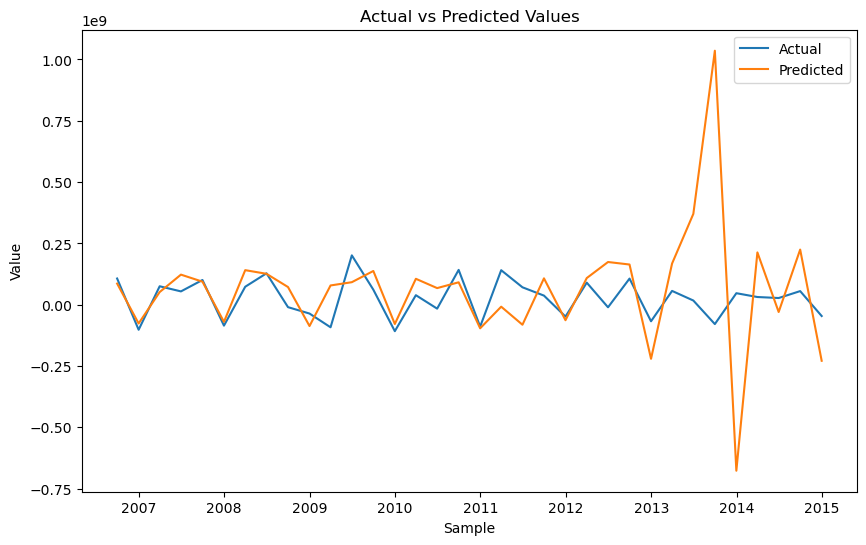

MAPE Zysk brutto:  374.19 %
Aktywa trwałe
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 397481596699017216.0000 - mae: 366271328.0000 - val_loss: 4134176364821479424.0000 - val_mae: 1127217408.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 373877693390782464.0000 - mae: 353759328.0000 - val_loss: 3911625865510780928.0000 - val_mae: 1088974336.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 351216208986505216.0000 - mae: 341324000.0000 - val_loss: 3696346161716658176.0000 - val_mae: 1050922432.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 329417257094479872.0000 - mae: 328961824.0000 - val_loss: 3488808119293706240.0000 - val_mae: 1013323584.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 308468468208893952.0000 - mae: 316732512.0000 - val_loss: 3289636260846501888.0000 - val_mae: 976614336.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 288438493087006720.0000 - mae: 304628864.0000 - val_loss: 30989138743

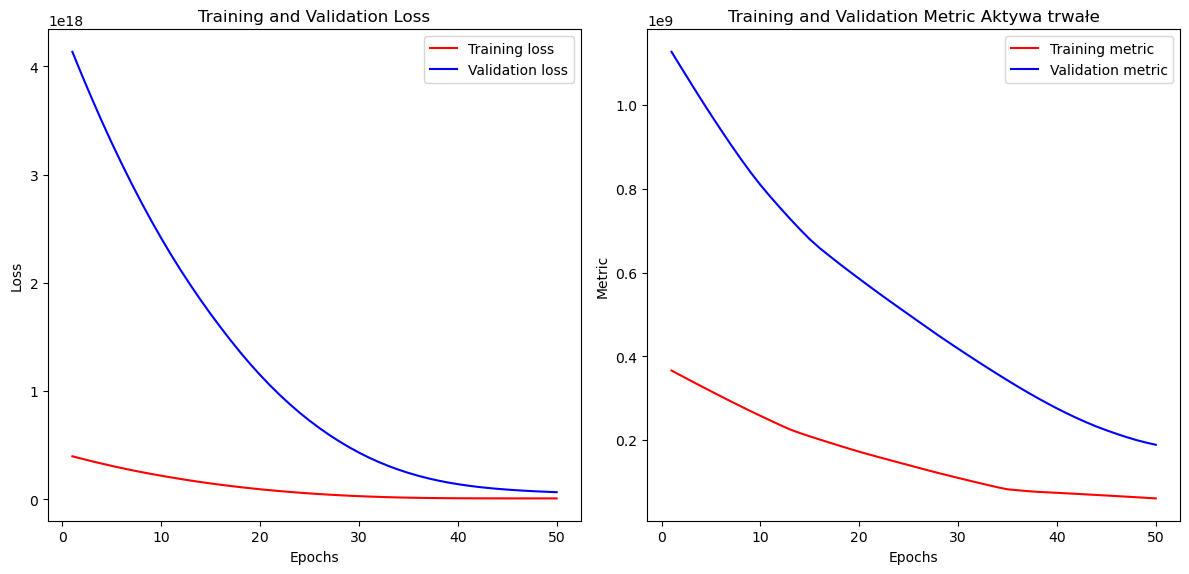

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8422125924777984.0000 - mae: 59536700.0000
Test accuracy: 59536700.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


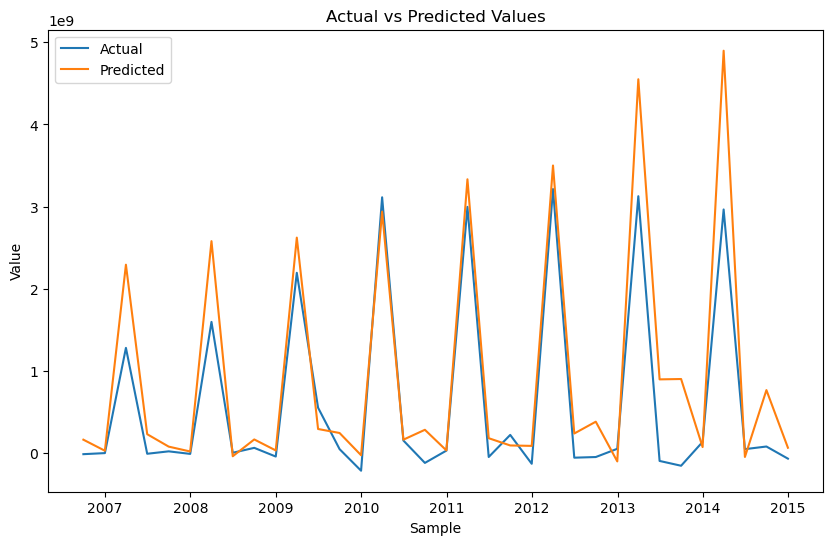

MAPE Aktywa trwałe:  5632.13 %
Aktywa obrotowe
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 51557934177452032.0000 - mae: 147440400.0000 - val_loss: 377606034241355776.0000 - val_mae: 380114464.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 42990823041662976.0000 - mae: 133816024.0000 - val_loss: 310492600396152832.0000 - val_mae: 345236480.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 35320632073781248.0000 - mae: 120318136.0000 - val_loss: 251816234666950656.0000 - val_mae: 314476960.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 28489400690147328.0000 - mae: 107023328.0000 - val_loss: 201141427369934848.0000 - val_mae: 286973952.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 22453431893491712.0000 - mae: 93971520.0000 - val_loss: 158429008403365888.0000 - val_mae: 261056512.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 17224404773634048.0000 - mae: 81275176.0000 - val_loss: 123441758133551104.0000

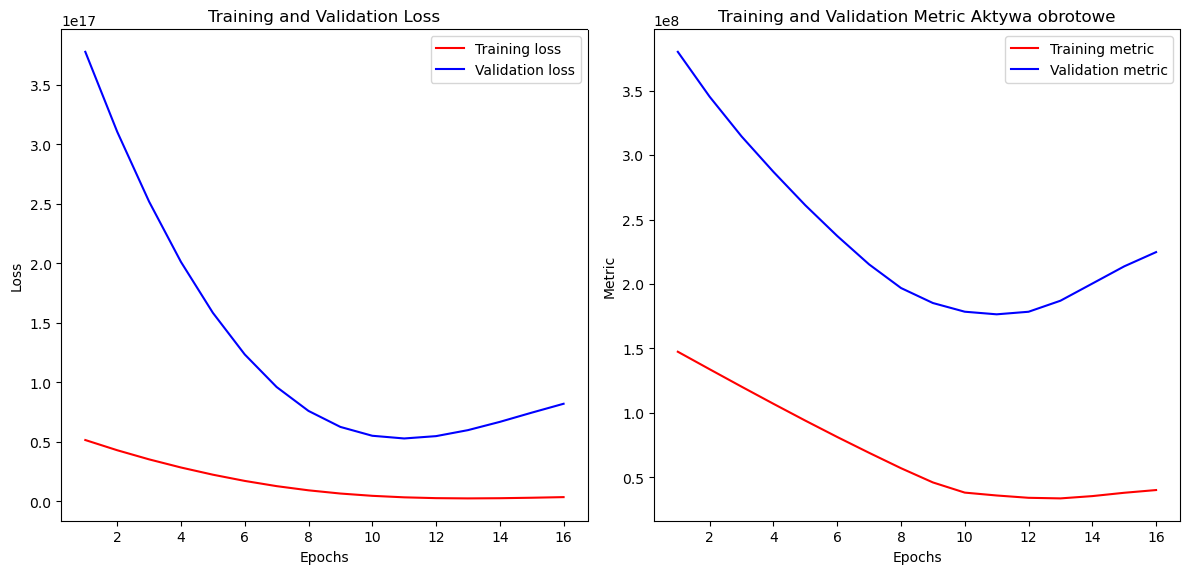

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2748384737755136.0000 - mae: 34101836.0000
Test accuracy: 34101836.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


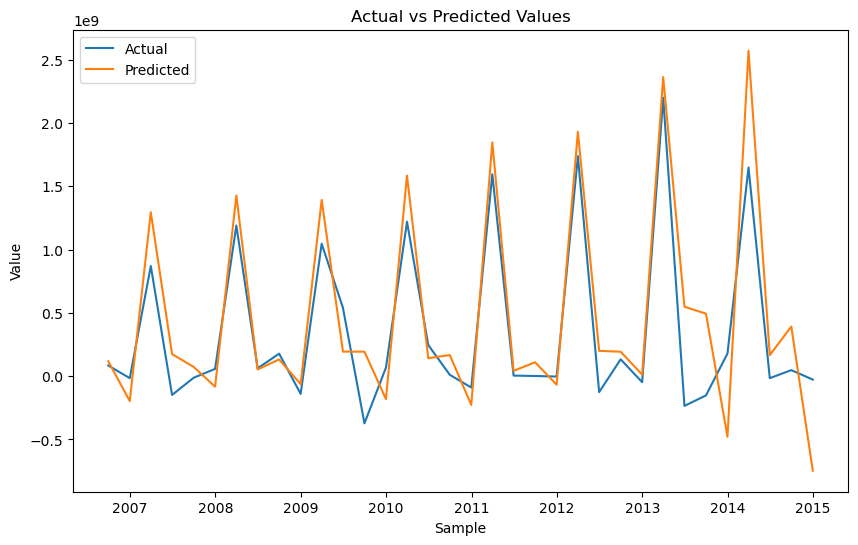

MAPE Aktywa obrotowe:  2772.46 %
Kapitał własny ogółem
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 97831649831550976.0000 - mae: 165614528.0000 - val_loss: 815467092391231488.0000 - val_mae: 502501376.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 85041735440269312.0000 - mae: 154530864.0000 - val_loss: 703861370772258816.0000 - val_mae: 470432352.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 73287603952025600.0000 - mae: 144252192.0000 - val_loss: 602051129525665792.0000 - val_mae: 439618208.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 62629938959745024.0000 - mae: 134976336.0000 - val_loss: 510145598259724288.0000 - val_mae: 411338080.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 53075663950708736.0000 - mae: 126185944.0000 - val_loss: 427706174914166784.0000 - val_mae: 384490368.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 44493215486705664.0000 - mae: 117461608.0000 - val_loss: 3547002864570

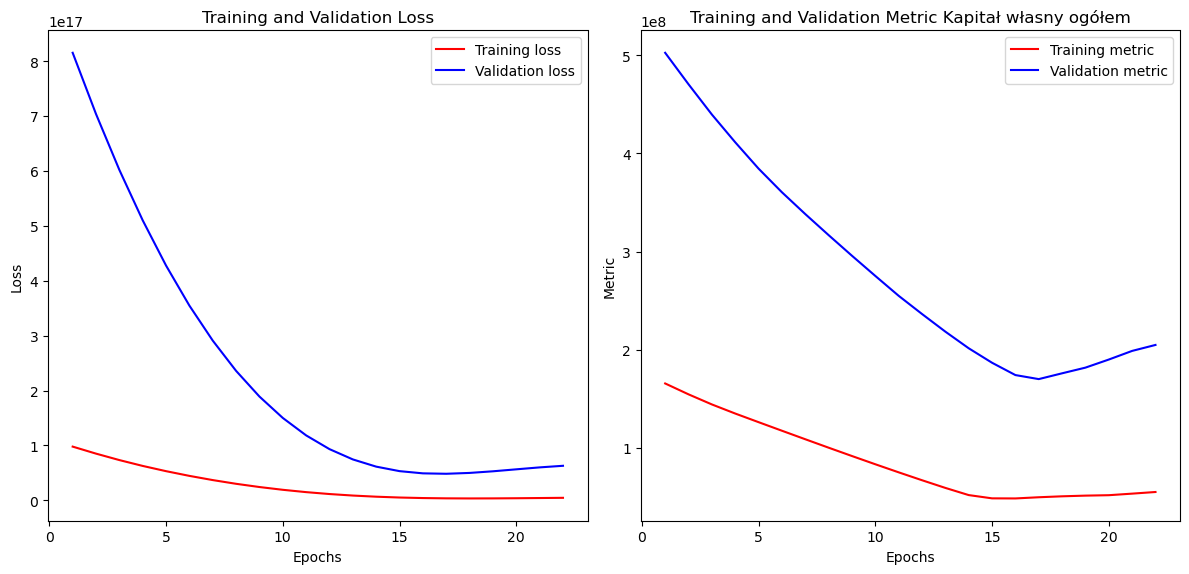

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 3386110608670720.0000 - mae: 50643956.0000
Test accuracy: 50643956.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


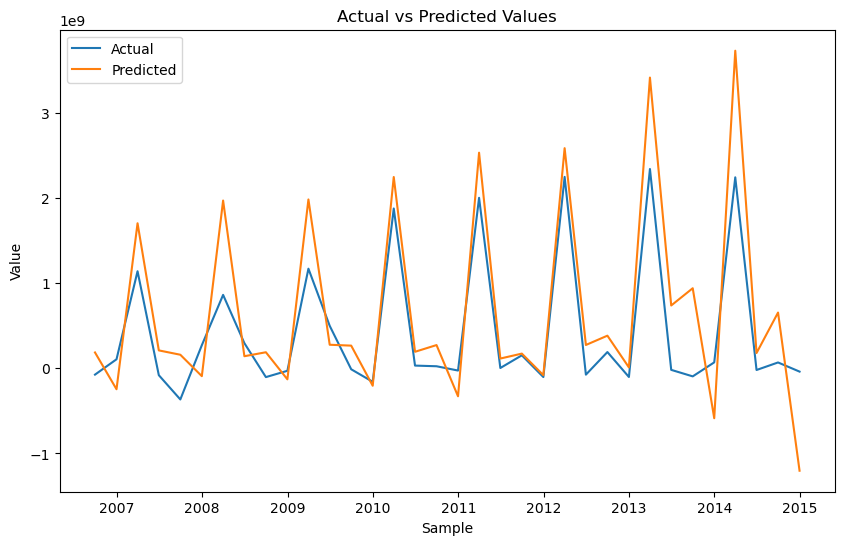

MAPE Kapitał własny ogółem:  1968.13 %
Kapitał własny spółki dominującej
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 168395892330594304.0000 - mae: 232728064.0000 - val_loss: 1056018315035541504.0000 - val_mae: 570865280.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 149973368848777216.0000 - mae: 217329088.0000 - val_loss: 917932092812165120.0000 - val_mae: 526441920.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 132737888428228608.0000 - mae: 202094336.0000 - val_loss: 790959390524964864.0000 - val_mae: 482843648.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 116661319033159680.0000 - mae: 187225040.0000 - val_loss: 674438027296112640.0000 - val_mae: 442042496.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 101773914413203456.0000 - mae: 172734544.0000 - val_loss: 568654975660457984.0000 - val_mae: 403898752.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 88039416454447104.0000 - mae: 158411088.0000 -

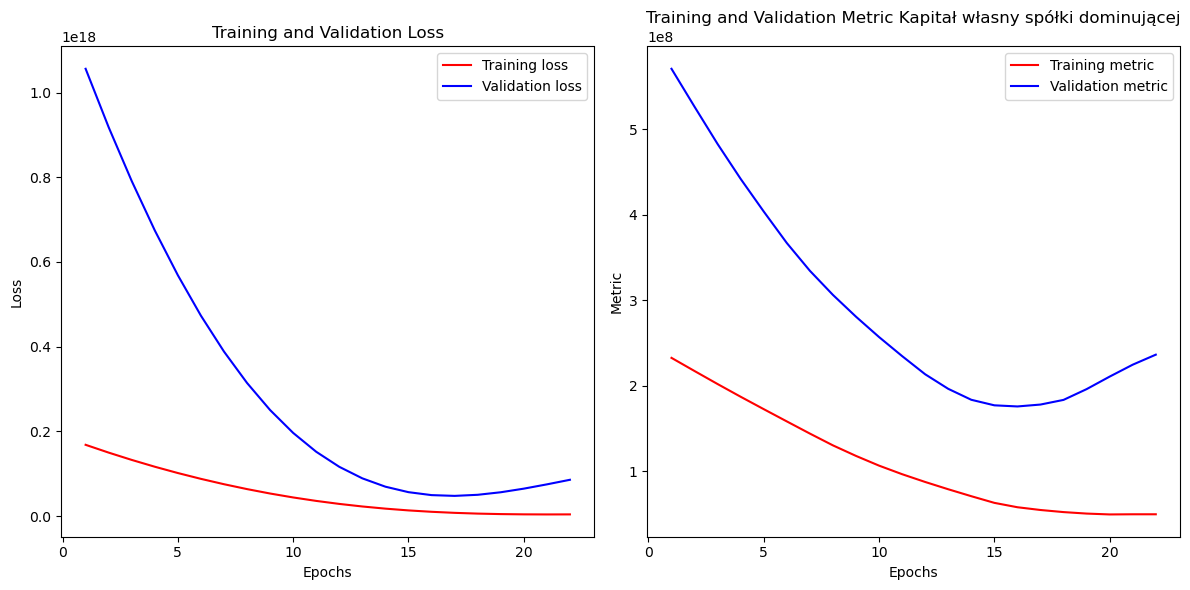

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 6020798972166144.0000 - mae: 52328292.0000
Test accuracy: 52328292.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


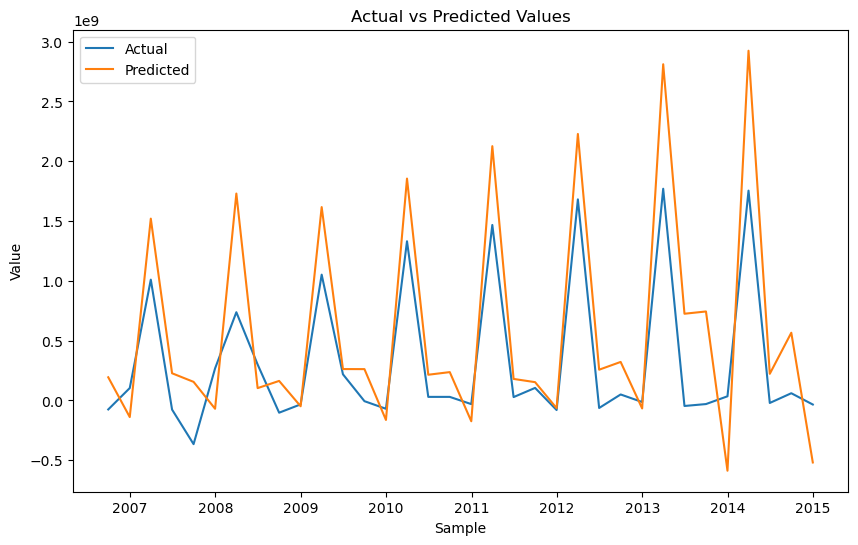

MAPE Kapitał własny spółki dominującej:  1519.24 %
Zobowiązania długoterminowe
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 25762201683886080.0000 - mae: 103529984.0000 - val_loss: 295679258192248832.0000 - val_mae: 340556672.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 20281799791869952.0000 - mae: 92857128.0000 - val_loss: 239582106223640576.0000 - val_mae: 308454496.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 15660409612664832.0000 - mae: 82784000.0000 - val_loss: 190981476072816640.0000 - val_mae: 276413312.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 11832131315564544.0000 - mae: 72893632.0000 - val_loss: 150132213919252480.0000 - val_mae: 245397152.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 8800210285232128.0000 - mae: 63428204.0000 - val_loss: 116877948593635328.0000 - val_mae: 217334848.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 6510179893903360.0000 - mae: 56651056.0000 - val_lo

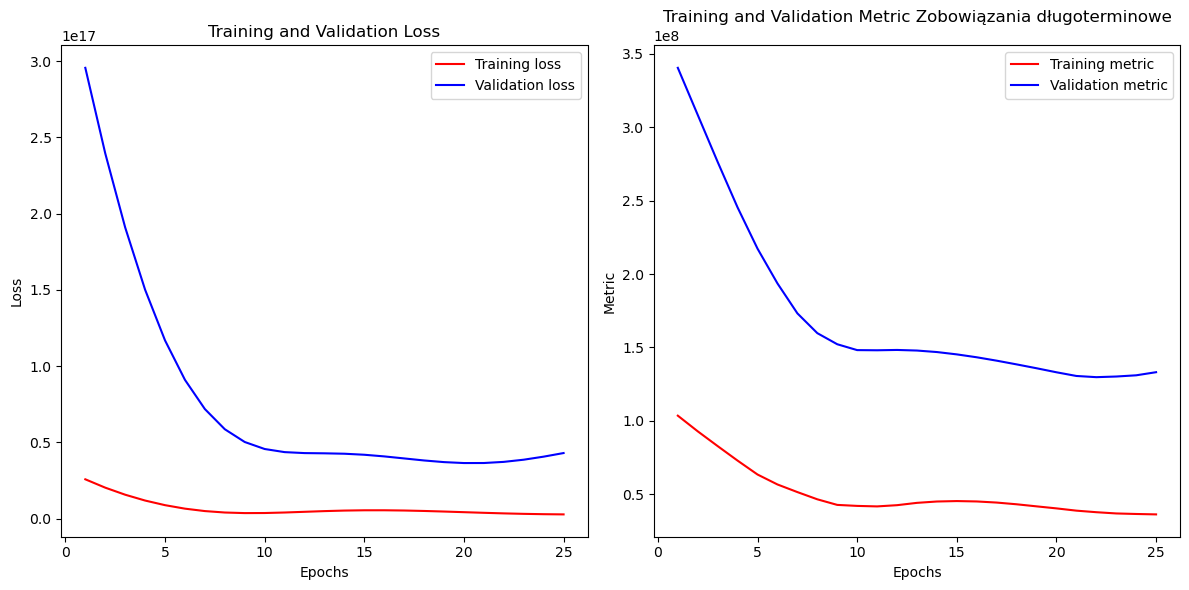

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3784712564768768.0000 - mae: 38808912.0000
Test accuracy: 38808912.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


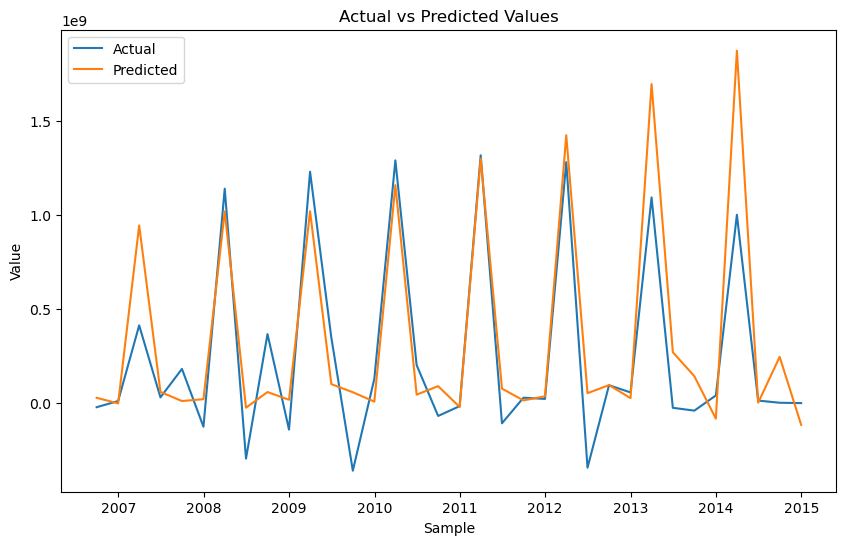

MAPE Zobowiązania długoterminowe:  1910.47 %
Zobowiązania krótkoterminowe
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5196454624755712.0000 - mae: 53249876.0000 - val_loss: 48088317861822464.0000 - val_mae: 146693408.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 3982508425216000.0000 - mae: 46091136.0000 - val_loss: 39637102123548672.0000 - val_mae: 128370320.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 3437910867050496.0000 - mae: 43003740.0000 - val_loss: 36945647982608384.0000 - val_mae: 123762584.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 3390913455849472.0000 - mae: 42137612.0000 - val_loss: 37314289320591360.0000 - val_mae: 126804920.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 3508168747384832.0000 - mae: 41341988.0000 - val_loss: 37973369232031744.0000 - val_mae: 129475792.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 3510150337921024.0000 - mae: 40727148.0000 - val_loss: 3788489290

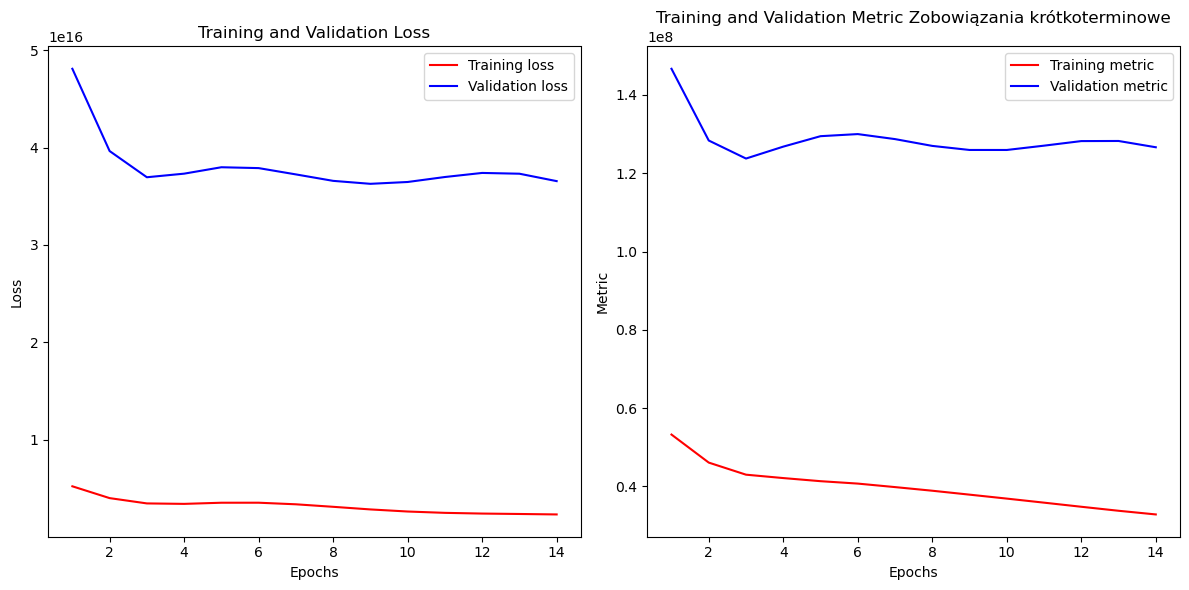

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 2605868596068352.0000 - mae: 36892756.0000
Test accuracy: 36892756.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


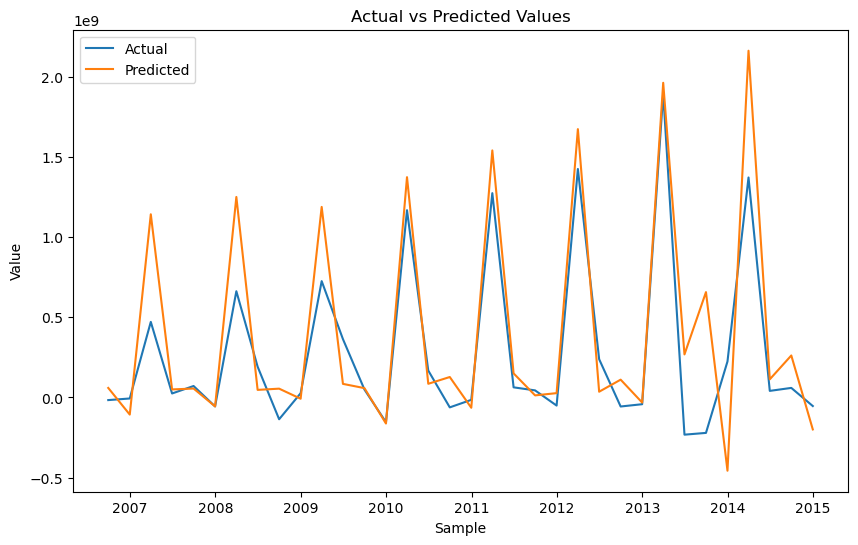

MAPE Zobowiązania krótkoterminowe:  914.72 %
Pożyczki krótkoterminowe
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 11667919683452928.0000 - mae: 69303920.0000 - val_loss: 112820329780346880.0000 - val_mae: 221311200.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 7937933323534336.0000 - mae: 57293708.0000 - val_loss: 80201049599639552.0000 - val_mae: 189043664.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 5055361727856640.0000 - mae: 45513612.0000 - val_loss: 54115844900257792.0000 - val_mae: 159091712.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 2975096197087232.0000 - mae: 35262072.0000 - val_loss: 35154444756713472.0000 - val_mae: 131595352.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 1674969599705088.0000 - mae: 26609014.0000 - val_loss: 22572091102461952.0000 - val_mae: 107489408.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 1051498926571520.0000 - mae: 21519930.0000 - val_loss: 1541321491742

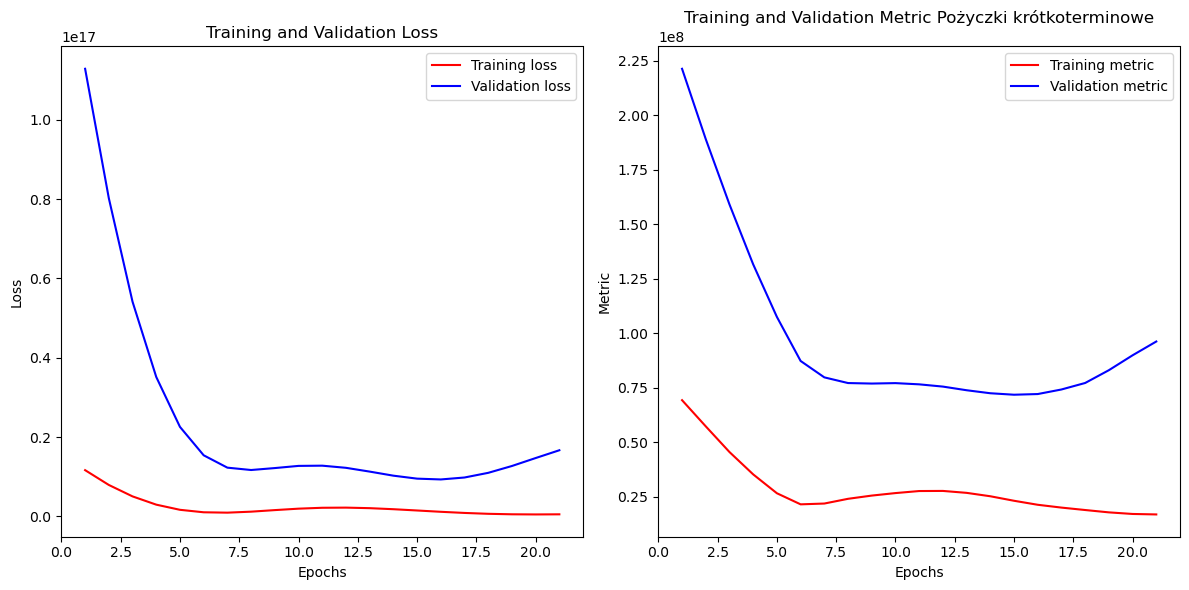

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 885986456240128.0000 - mae: 20026878.0000
Test accuracy: 20026878.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


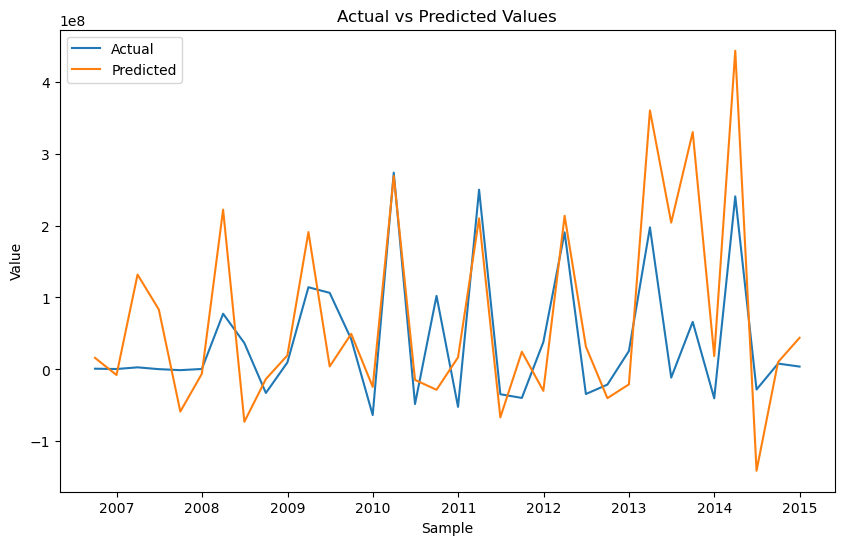

MAPE Pożyczki krótkoterminowe:  3007.95 %
Q
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 7500167708147712.0000 - mae: 67172336.0000 - val_loss: 53133122023194624.0000 - val_mae: 185143456.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 4655615162974208.0000 - mae: 54145148.0000 - val_loss: 32421189846564864.0000 - val_mae: 150177488.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 2554408713846784.0000 - mae: 41489344.0000 - val_loss: 18118534286540800.0000 - val_mae: 115747704.0000
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 1198230243115008.0000 - mae: 29379494.0000 - val_loss: 9695885449494528.0000 - val_mae: 83507896.0000
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 514898496847872.0000 - mae: 18396004.0000 - val_loss: 6298138969112576.0000 - val_mae: 64280576.0000
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 372527578742784.0000 - mae: 15176347.0000 - val_loss: 6409684101627904.0000 - val_mae: 62193964.0000


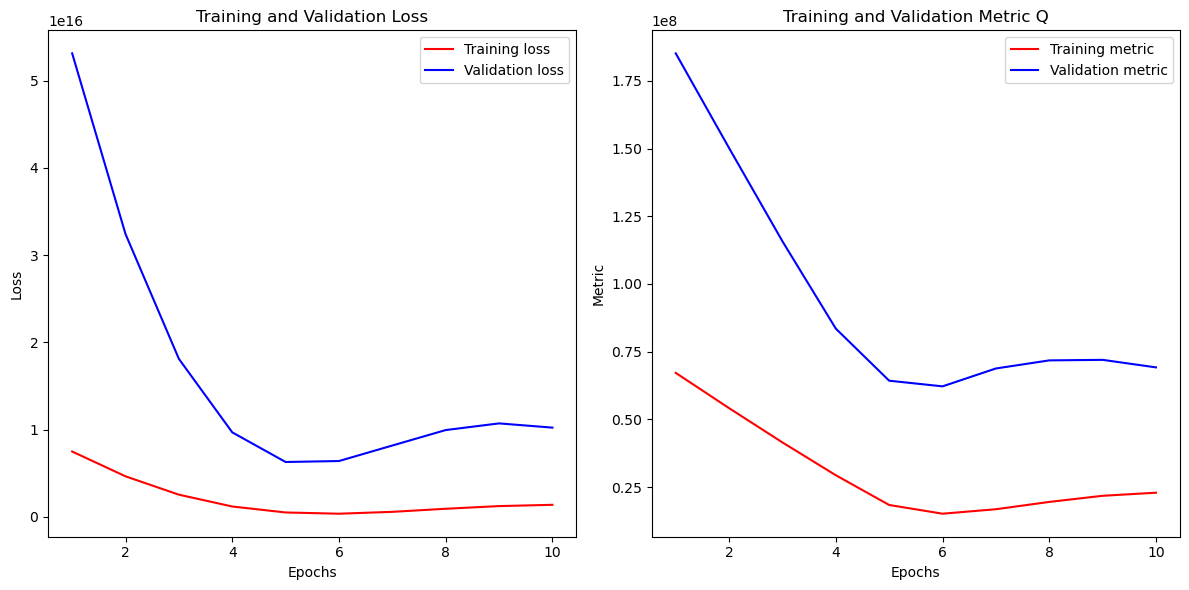

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 372527612297216.0000 - mae: 15176347.0000
Test accuracy: 15176347.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


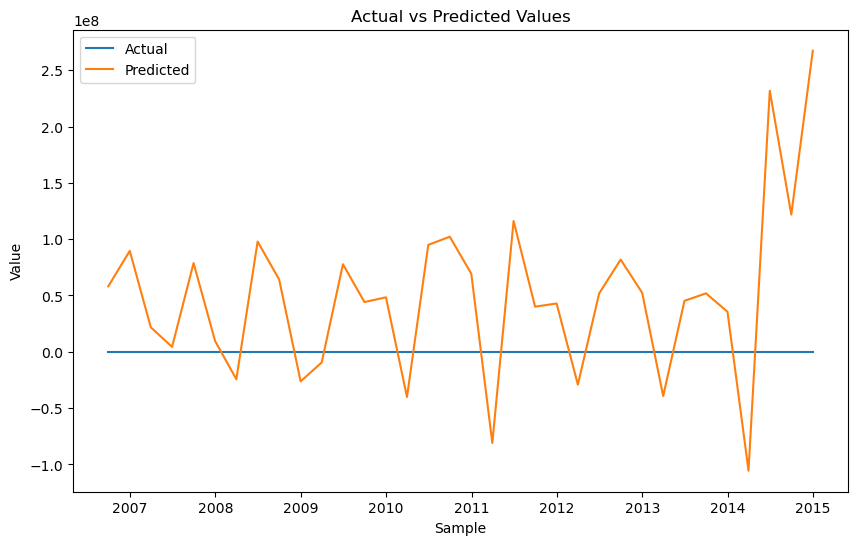

MAPE Q:  inf %


In [22]:

#Sieć neuronowa

#Ostatnim już badanym modelm są sieci neuronowe. W tej analizie zostały one zdefiniowane pobieżnie, tak naprawdę możnaby im było poświęćić całe badanie.
#Na samym poćżatku zdefiniowano wielkość oraz cechy sieci.
#Następnie iteracyjnie je wyuczono. I wybrano najlepszy model korzystając z meto Eraly Stopping, aby wybrać takie ustawienie, dla któego sieć nauczyła się najwięcej
#Wynikiem tej komórki jest tabela przedstawiająca wszystkie iteracje, wykres funkcji straty oraz funkcji walidacyjnej oraz prognozy
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping



for i in list(random_forest_mol.columns):
    print(f"{i}")
    labels = random_forest_mol[f"{i}"]
            
    features = random_forest_mol
    train_l = labels[:24]
    test_l = labels[25:]
            
    train_f = features[:24]
    test_f = features[25:]
    
    
    early_stopping = EarlyStopping(monitor='val_loss', # Metryka monitorowana (wartość funkcji straty na zbiorze walidacyjnym)
                                   patience=5, # Liczba epok bez poprawy, po których trenowanie zostanie zatrzymane
                                   verbose=1, # Poziom szczegółowości komunikatów
                                   restore_best_weights=True)
    
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(features.shape[1],)), # Warstwa ukryta z 128 neuronami
        keras.layers.Dense(1) ])
    
    
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['mae'])
    
    
    
    history = model.fit(train_f, train_l, epochs=50, callbacks=[early_stopping], validation_data=(test_f, test_l))
    
    def plot_learning_curves(history):
        # Pobranie wartości funkcji straty dla zbioru treningowego i walidacyjnego
        train_loss = history.history['loss']
        val_loss = history.history['val_loss']
        
        # Pobranie wartości metryki (np. dokładności) dla zbioru treningowego i walidacyjnego (jeśli dostępne)
        if 'accuracy' in history.history:
            train_metric = history.history['accuracy']
            val_metric = history.history['val_accuracy']
        elif 'mae' in history.history:
            train_metric = history.history['mae']
            val_metric = history.history['val_mae']
        else:
            print("Nie można znaleźć metryki. Sprawdź, czy model jest skonfigurowany do monitorowania odpowiednich metryk.")
            return
        
        # Wygenerowanie krzywych uczenia się
        epochs = range(1, len(train_loss) + 1)
        plt.figure(figsize=(12, 6))
        
        # Wykres funkcji straty
        plt.subplot(1, 2, 1)
        plt.plot(epochs, train_loss, 'r-', label='Training loss')
        plt.plot(epochs, val_loss, 'b-', label='Validation loss')
        plt.title('Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        
        # Wykres metryki
        plt.subplot(1, 2, 2)
        plt.plot(epochs, train_metric, 'r-', label='Training metric')
        plt.plot(epochs, val_metric, 'b-', label='Validation metric')
        plt.title(f'Training and Validation Metric {i}')
        plt.xlabel('Epochs')
        plt.ylabel('Metric')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
    plot_learning_curves(history)
    
    
    # Ocena modelu
    test_loss, test_acc = model.evaluate(train_f, train_l)
    print('Test accuracy:', test_acc)

    actual_values = test_l[:34]

    # Przewidywane wartości
    predictions = model.predict(test_f[-34:])
    predictions = pd.DataFrame(predictions, index=actual_values.index)
    
    # Rzeczywiste wartości
    
    
    # Wykres prognoz vs rzeczywistość
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.show()

    def mean_absolute_percentage_error(y_true, y_pred):
        """
        Oblicza średnią bezwzględną błędu procentowego (MAPE).
    
        Parametry:
        y_true : array-like
            Rzeczywiste wartości.
        y_pred : array-like
            Prognozowane wartości.
    
        Zwraca:
        mape : float
            Wartość MAPE.
        """
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    
    mape = mean_absolute_percentage_error(actual_values[:-1], predictions[:-1])
    print(f"MAPE {i}: ", round(mape,2),"%")


#W porównaniu do poprzednich modeli sieci neuronowe wypadają gorzej, błedy prognoz są większe, a dopasowanie nie zawsze jest wystarczające. 
#Należy jednak pamiętać, że w tym badaniu zbadano je pobieżnie, i aby w pełni sprawdzić ich zdolności powinno się im poświęcić znacznie więcej czasu. 
#Jest to obszar, któremu można poświęcić więcej uwagi w nowym badaniu, ponieważ wykazuje on duży potencjał

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/stepWARNING:tensorflow:5 out of the last 19 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001178ABE2020> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


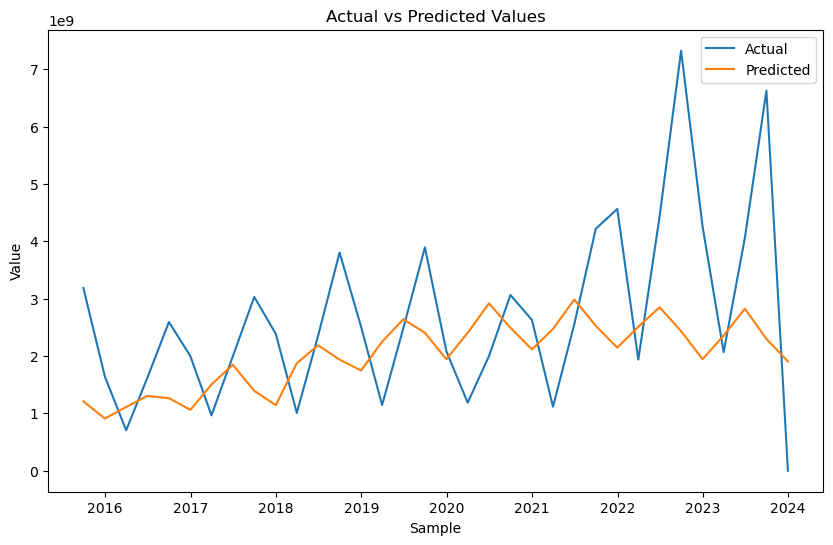

In [83]:
import matplotlib.pyplot as plt

# Przewidywane wartości
predictions = model.predict(train_f[-34:])
predictions = pd.DataFrame(predictions, index=actual_values.index)

# Rzeczywiste wartości
actual_values = test_l[:34]

# Wykres prognoz vs rzeczywistość
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [21]:
def mean_absolute_percentage_error(y_true, y_pred):
    """
    Oblicza średnią bezwzględną błędu procentowego (MAPE).

    Parametry:
    y_true : array-like
        Rzeczywiste wartości.
    y_pred : array-like
        Prognozowane wartości.

    Zwraca:
    mape : float
        Wartość MAPE.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


mape = mean_absolute_percentage_error(actual_values[:-1], predictions[:-1])
print(f"MAPE {i}: ", round(mape,2),"%")

MAPE Q:  inf %
